In [1]:
# https://twitter.com/solana_daily/status/1478713051545284610?s=20
# https://twitter.com/solana_daily/status/1478713050500845569?s=20
# https://twitter.com/solana_daily/status/1478713051545284610?s=20
# https://twitter.com/solana_daily/status/1478735642981015560?s=20
#
# https://pbs.twimg.com/media/FGk5pbfUUAA3kh1?format=jpg&name=4096x4096
# solaris lending borrowing
# zero interest lending borrowing
# staking pool Stafi # lijkt het niet te doen
# Saros farm # is er nog niet
# Delta protocol # kan niet vinden
# sentre dex
# mora dex
# hydraswap dex $ nog in devnet
# agg dex
# todo: raydium leveraged? or was it another protocol like tulip

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib.patches import FancyBboxPatch

import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib

C:\Users\m\AppData\Local\Temp\ipykernel_18668\2683290792.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
# import xlsxwriter
# import dataframe_image as dfi
import pandas as pd
import re
# from openpyxl import load_workbook
from bs4 import BeautifulSoup
import datetime
import calendar
import time
import selenium
from selenium.webdriver import ActionChains
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from webdriver_manager.firefox import GeckoDriverManager
driver = webdriver.Firefox(executable_path=GeckoDriverManager().install())
# from webdriver_manager.microsoft import EdgeChromiumDriverManager
# driver = webdriver.Edge(EdgeChromiumDriverManager().install())
driver.get('https://addons.mozilla.org/en-US/firefox/addon/phantom-app/')
driver.implicitly_wait(1)



====== WebDriver manager ======
Current firefox version is 100.0
Get LATEST geckodriver version for 100.0 firefox
Driver [C:\Users\m\.wdm\drivers\geckodriver\win64\v0.31.0\geckodriver.exe] found in cache
C:\Users\m\AppData\Local\Temp\ipykernel_18668\805933187.py:18: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=GeckoDriverManager().install())


In [4]:
xpath_add_to_firefox = '/html/body/div/div/div/div/div[2]/div[1]/section[1]/div/header/div[4]/div/div/a'
driver.find_element(By.XPATH, xpath_add_to_firefox).click()
driver.implicitly_wait(1)

In [5]:
#get current window handle
p = driver.current_window_handle

#get first child window
chwd = driver.window_handles

for w in chwd:
#switch focus to child window
    if(w!=p):
        driver.switch_to.window(w)

In [6]:
# click op use phrase
driver.find_elements(By.TAG_NAME, 'button')[1].click()

In [7]:
for count, phrase in enumerate('bachelor record junior later recipe clump bundle fluid bind sample bird train'.split(' ')):
    print(count, phrase)
    driver.find_element(By.ID, 'word_' + str(count)).send_keys(phrase)
# click on the import phrase button
driver.find_element(By.TAG_NAME,'button').click()

0 bachelor
1 record
2 junior
3 later
4 recipe
5 clump
6 bundle
7 fluid
8 bind
9 sample
10 bird
11 train


In [8]:
# click on the import phrase button
driver.find_element(By.TAG_NAME,'button').click()

In [9]:
# click on the Import Selected Accounts button
element = WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.TAG_NAME, 'button')))
driver.find_element(By.TAG_NAME, 'button').click()

In [10]:
word = 'hjkgjkhgkjhg31!'
# enter username and word
driver.find_elements(By.TAG_NAME,'input')[0].send_keys(word)
driver.find_elements(By.TAG_NAME,'input')[1].send_keys(word)

In [11]:
# press the I accept button
driver.find_elements(By.TAG_NAME,'input')[2].send_keys(Keys.SPACE)

In [12]:
# click op de save button
driver.find_element(By.TAG_NAME,'button').click()

## Zoek prijzen op

In [13]:
def lookup_prices(url):
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    value = float(soup.find('div', class_ = 'priceValue').text.replace("$",'').replace(",",''))
    return value

In [14]:
msol_price = lookup_prices('https://coinmarketcap.com/currencies/marinade/')
onesol_price = lookup_prices('https://coinmarketcap.com/currencies/1sol/')
sol_price = lookup_prices('https://coinmarketcap.com/currencies/solana/')
stsol_price = lookup_prices('https://coinmarketcap.com/currencies/lido-for-solana/')
scnsol_price =  lookup_prices('https://coinmarketcap.com/currencies/socean-staked-sol/')
mango_price = lookup_prices('https://coinmarketcap.com/currencies/mango-markets/')
btc_price = lookup_prices('https://coinmarketcap.com/currencies/bitcoin/')
eth_price = lookup_prices('https://coinmarketcap.com/currencies/ethereum/')
terra_price = lookup_prices('https://coinmarketcap.com/currencies/terra-luna/')
apt_price = lookup_prices('https://coinmarketcap.com/currencies/apricot/')
ftt_price = lookup_prices('https://coinmarketcap.com/currencies/ftx-token/')
cys_price = lookup_prices('https://coinmarketcap.com/currencies/cyclos/')
ray_price = lookup_prices('https://coinmarketcap.com/currencies/raydium/')
srm_price = lookup_prices('https://coinmarketcap.com/currencies/serum/')
aurory_price = lookup_prices('https://coinmarketcap.com/currencies/aurory/')
fida_price = lookup_prices('https://coinmarketcap.com/currencies/bonfida/')
stars_price = lookup_prices('https://coinmarketcap.com/currencies/starlaunch/')
ratio_price = lookup_prices('https://coinmarketcap.com/currencies/ratio-finance/')

## Mercurial Vaults

In [15]:
site = 'https://vaults.mercurial.finance/'
driver.get(site)

In [16]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'flex flex-col mt-12')

pairs = []
for i in table.find_all('div', class_ = 'text-xl font-semibold text-black')[1:]:
    pairs.append(i.text)

tvl = []
for i in table.find_all('div', class_ = 'text-sm text-black/75 font-semibold')[::3]:
    tvl.append(float(i.text.replace('$','').replace(',','')))
    
apy = []
for i in table.find_all('div', class_ = 'text-sm text-black/75 font-semibold')[2::3]:
    apy.append(float(i.text.replace('%','').replace(',',''))/100)

df_mercurial_vaults = pd.DataFrame(list(zip(pairs, 
                                  tvl,
                                  apy)),
                                  columns = ['Pair', 'TVL', 'APY'])

df_mercurial_vaults.insert(0,'Protocol', 'Mercurial')
df_mercurial_vaults['Return type'] = 'APY'
df_mercurial_vaults['APR'] = ((df_mercurial_vaults['APY']+1)**(1/365)-1)*365
df_mercurial_vaults['url'] = site
print(f'token_pairs = {len(pairs)} tvls = {len(tvl)} apy_list = {len(apy)}')
df_mercurial_vaults

token_pairs = 3 tvls = 3 apy_list = 3


,Protocol,Pair,TVL,APY,Return type,APR,url
0,Mercurial,SOL,111615.51,0.01593,APY,0.015805,https://vaults.mercurial.finance/
1,Mercurial,USDT,60411.97,0.02206,APY,0.021821,https://vaults.mercurial.finance/
2,Mercurial,USDC,570787.86,0.02309,APY,0.022828,https://vaults.mercurial.finance/


## Solend concentrated

In [17]:
solend_pools = ['nft',
                'coin98',
                'step',
                'stepn',
                'dog',
                'invictus',
                'bonfida',
                'stable',
                'atlas',
                'turbo-sol',
                'uxd',
                'shadow']

pool_names = ['Solend NFT Pool',
              'Solend Coin98 Pool',
              'Solend Step Pool',
              'Solend STEPN Pool',
              'Solend Dog Pool',
              'Solend Invictus Pool',
              'Solend Bonfida Pool',
              'Solend Stable Pool',
              'Solend Star Atlas Pool',
              'Solend Turbo SOL Pool',
              'Solend UXD Pool',
              'Solend Shadow Pool']

In [18]:
df_solend_concentrated_combined = pd.DataFrame()

for poolcount, pool in enumerate(solend_pools):
    site = 'https://solend.fi/dashboard?pool=' + pool
    driver.get(site)
    time.sleep(10)
    
    soup = BeautifulSoup(driver.page_source, "html.parser")

    tussentabel = []
    for i in soup.find_all('span', class_ = 'Typography_primary__ljjY8 Typography_body__iCB0t'):
        if '%' in i.text:
            tussentabel.append(float(i.text.replace('%',''))/100)

    ltvs = tussentabel

    supply_apy = []
    for i in soup.find_all('span', class_ = 'Typography_primary__ljjY8 Typography_body__iCB0t Market_percent__T85bk')[::2]:
        supply_apy.append(float(i.text.replace('%','').replace(',','').replace('<',''))/100)

    borrow_apy = []
    for i in soup.find_all('span', class_ = 'Typography_primary__ljjY8 Typography_body__iCB0t Market_percent__T85bk')[1::2]:
        borrow_apy.append(float(i.text.replace('%','').replace(',',''))/100)

    incentives_list = []
    for i in soup.find_all('span', class_ = 'Typography_secondary__MsHYD Typography_caption__u6-2v'):
        if i.text not in ['Solend', 'Develop', 'Twitter', 'Blog', 'Discord','Solend','Develop','Careers','Twitter','Discord','Blog']:
            value = i.text.replace('(','').replace(')','').replace(' ','').replace('%','')
            if len(value) > 0 and '+' in value:
                try:
                    incentives_list.append((float(value.split('+')[0]) + float(value.split('+')[1]))/100)
                except:
                    incentives_list.append((float(value.split('+')[1]))/100)
            elif len(value) >0 and '+' not in value:
                incentives_list.append(float(value)/100)
            else:
                incentives_list.append(0)
    supply_incentives = incentives_list[::2]
    borrow_incentives = incentives_list[1::2]

    tvls = []
    for i in soup.find_all('label', class_ = 'Typography_secondary__MsHYD Typography_label__s9+Fl')[1::3]:
        tvls.append(float(i.text.replace('$','').replace(',','')))


    pair_part_one = '/html/body/div[1]/section/main/div/div/div[1]/div[2]/div[2]/div/div/div/div/div/div/table/tbody/tr['
    pair_part_two = ']/td[1]/div/span'
    url = []
    pairs = []
    protocol = []
    for i in range(1, len(tvls) +1):
        pairs.append(driver.find_element(By.XPATH, pair_part_one + str(i) + pair_part_two).text)
        protocol.append(pool_names[poolcount])
        url.append(site)

    df_solend_concentrated = pd.DataFrame(list(zip(pairs, 
                                                   tvls,
                                                   supply_apy,
                                                   borrow_apy,
                                                   supply_incentives,
                                                   borrow_incentives,
                                                   ltvs,
                                                   protocol,
                                                   url)),
                            columns = ['Pair', 'TVL', 'APY', 'Borrow APY','Supply incentives','Borrow incentives','LTV','Protocol','url'])
    
    df_solend_concentrated_combined = pd.concat([df_solend_concentrated_combined,df_solend_concentrated])

df_solend_concentrated_combined

,Pair,TVL,APY,Borrow APY,Supply incentives,Borrow incentives,LTV,Protocol,url
0,SMBD,30996.0,0.0325,0.1519,0.0000,0.0000,0.20,Solend NFT Pool,https://solend.fi/dashboard?pool=nft
1,SOL,40068.0,0.0059,0.0301,0.0000,0.0000,0.50,Solend NFT Pool,https://solend.fi/dashboard?pool=nft
2,USDC,48420.0,0.0238,0.0612,0.0000,0.0000,0.50,Solend NFT Pool,https://solend.fi/dashboard?pool=nft
0,C98,290164.0,0.0038,0.0242,0.0000,0.0000,0.65,Solend Coin98 Pool,https://solend.fi/dashboard?pool=coin98
1,UXD,1014570.0,0.0242,0.0618,0.0000,0.0000,0.75,Solend Coin98 Pool,https://solend.fi/dashboard?pool=coin98
2,USDH,570132.0,0.0812,0.1143,0.0000,0.0000,0.75,Solend Coin98 Pool,https://solend.fi/dashboard?pool=coin98
3,PAI,1300322.0,0.0757,0.0683,0.0461,0.0000,0.75,Solend Coin98 Pool,https://solend.fi/dashboard?pool=coin98
4,UST,2483.0,11.1823,11.1825,0.0000,0.0000,0.00,Solend Coin98 Pool,https://solend.fi/dashboard?pool=coin98
0,xSTEP,383188.0,0.0000,0.0000,0.0000,0.0000,0.50,Solend Step Pool,https://solend.fi/dashboard?pool=step
1,STEP,1427345.0,0.0019,0.0268,0.0000,0.0000,0.50,Solend Step Pool,https://solend.fi/dashboard?pool=step


In [19]:
df_solend_concentrated_combined['Investment type'] = 'Single sided lending'
df_solend_concentrated_combined['Return type'] = 'APY'
df_solend_concentrated_combined['APR'] = ((df_solend_concentrated_combined['APY']+1)**(1/365)-1)*365
df_solend_concentrated_combined['Borrow APR'] = ((df_solend_concentrated_combined['Borrow APY']+1)**(1/365)-1)*365
df_solend_concentrated_combined

,Pair,TVL,APY,Borrow APY,Supply incentives,Borrow incentives,LTV,Protocol,url,Investment type,Return type,APR,Borrow APR
0,SMBD,30996.0,0.0325,0.1519,0.0000,0.0000,0.20,Solend NFT Pool,https://solend.fi/dashboard?pool=nft,Single sided lending,APY,0.031984,0.141440
1,SOL,40068.0,0.0059,0.0301,0.0000,0.0000,0.50,Solend NFT Pool,https://solend.fi/dashboard?pool=nft,Single sided lending,APY,0.005883,0.029657
2,USDC,48420.0,0.0238,0.0612,0.0000,0.0000,0.50,Solend NFT Pool,https://solend.fi/dashboard?pool=nft,Single sided lending,APY,0.023522,0.059405
0,C98,290164.0,0.0038,0.0242,0.0000,0.0000,0.65,Solend Coin98 Pool,https://solend.fi/dashboard?pool=coin98,Single sided lending,APY,0.003793,0.023913
1,UXD,1014570.0,0.0242,0.0618,0.0000,0.0000,0.75,Solend Coin98 Pool,https://solend.fi/dashboard?pool=coin98,Single sided lending,APY,0.023913,0.059971
2,USDH,570132.0,0.0812,0.1143,0.0000,0.0000,0.75,Solend Coin98 Pool,https://solend.fi/dashboard?pool=coin98,Single sided lending,APY,0.078080,0.108242
3,PAI,1300322.0,0.0757,0.0683,0.0461,0.0000,0.75,Solend Coin98 Pool,https://solend.fi/dashboard?pool=coin98,Single sided lending,APY,0.072979,0.066075
4,UST,2483.0,11.1823,11.1825,0.0000,0.0000,0.00,Solend Coin98 Pool,https://solend.fi/dashboard?pool=coin98,Single sided lending,APY,2.508565,2.508582
0,xSTEP,383188.0,0.0000,0.0000,0.0000,0.0000,0.50,Solend Step Pool,https://solend.fi/dashboard?pool=step,Single sided lending,APY,0.000000,0.000000
1,STEP,1427345.0,0.0019,0.0268,0.0000,0.0000,0.50,Solend Step Pool,https://solend.fi/dashboard?pool=step,Single sided lending,APY,0.001898,0.026448


In [20]:
# base table
df_solend_concentrated_combined_nerfed = df_solend_concentrated_combined.copy()
df_solend_concentrated_combined_nerfed['Unincentivized APY'] = df_solend_concentrated_combined_nerfed['APY'] - df_solend_concentrated_combined_nerfed['Supply incentives']
df_solend_concentrated_combined_nerfed['Unincentivized Borrow APY'] = df_solend_concentrated_combined_nerfed['Borrow APY'] + df_solend_concentrated_combined_nerfed['Borrow incentives']
df_solend_concentrated_combined_nerfed['APR'] = df_solend_concentrated_combined_nerfed['Unincentivized APY']
df_solend_concentrated_combined_nerfed['Borrow APR'] = df_solend_concentrated_combined_nerfed['Unincentivized Borrow APY']
df_solend_concentrated_combined_nerfed

#borrowlend
df_solend_concentrated_combined_nerfed_borrowlend = df_solend_concentrated_combined_nerfed.rename(columns = {'APR':'Supply APR',
                                                                                                             'Pair':'Token'})\
                                                  [['Protocol', 'Token', 'Supply APR', 'Borrow APR', 'LTV']]
df_solend_concentrated_combined_nerfed_borrowlend

,Protocol,Token,Supply APR,Borrow APR,LTV
0,Solend NFT Pool,SMBD,0.0325,0.1519,0.20
1,Solend NFT Pool,SOL,0.0059,0.0301,0.50
2,Solend NFT Pool,USDC,0.0238,0.0612,0.50
0,Solend Coin98 Pool,C98,0.0038,0.0242,0.65
1,Solend Coin98 Pool,UXD,0.0242,0.0618,0.75
2,Solend Coin98 Pool,USDH,0.0812,0.1143,0.75
3,Solend Coin98 Pool,PAI,0.0296,0.0683,0.75
4,Solend Coin98 Pool,UST,11.1823,11.1825,0.00
0,Solend Step Pool,xSTEP,0.0000,0.0000,0.50
1,Solend Step Pool,STEP,0.0019,0.0268,0.50


In [21]:
#nu een custom farm met penalized supply en borrow aprs
dagen_in_huidige_maand = calendar.monthrange(datetime.datetime.now().year,
                                             datetime.datetime.now().month)[1]

if datetime.datetime.now().month != 12:
    target_month = datetime.datetime.now().month + 1
    target_year = datetime.datetime.now().year
else:
    target_month = 1
    target_year = datetime.datetime.now().year + 1
    
gedeelte_maand_over = (datetime.datetime(target_year, target_month, 3) - datetime.datetime.now()).days / dagen_in_huidige_maand

maandelijkse_nerf_factor = 1 - 0.8 * gedeelte_maand_over

# base table
df_solend_concentrated_combined_partially_nerfed = df_solend_concentrated_combined.copy()
df_solend_concentrated_combined_partially_nerfed['Unincentivized APY'] = df_solend_concentrated_combined_partially_nerfed['APY'] - df_solend_concentrated_combined_partially_nerfed['Supply incentives']
df_solend_concentrated_combined_partially_nerfed['Unincentivized Borrow APY'] = df_solend_concentrated_combined_partially_nerfed['Borrow APY'] + df_solend_concentrated_combined_partially_nerfed['Borrow incentives']

df_solend_concentrated_combined_partially_nerfed['Target Supply APY'] = df_solend_concentrated_combined_partially_nerfed['Unincentivized APY'] +\
                                                                        df_solend_concentrated_combined_partially_nerfed['Supply incentives'] * maandelijkse_nerf_factor
df_solend_concentrated_combined_partially_nerfed['Target Borrow APY'] = df_solend_concentrated_combined_partially_nerfed['Unincentivized Borrow APY'] -\
                                                                        df_solend_concentrated_combined_partially_nerfed['Borrow incentives'] * maandelijkse_nerf_factor
df_solend_concentrated_combined_partially_nerfed['APY'] = df_solend_concentrated_combined_partially_nerfed['Target Supply APY']
df_solend_concentrated_combined_partially_nerfed['Borrow APY'] = df_solend_concentrated_combined_partially_nerfed['Target Borrow APY']

df_solend_concentrated_combined_partially_nerfed['APR'] = df_solend_concentrated_combined_partially_nerfed['Target Supply APY']
df_solend_concentrated_combined_partially_nerfed['Borrow APR'] = df_solend_concentrated_combined_partially_nerfed['Target Borrow APY']

# borrowlend
df_solend_concentrated_combined_partially_nerfed_borrowlend = df_solend_concentrated_combined_partially_nerfed.rename(columns = {'APR':'Supply APR',
                                                                                                                      'Pair':'Token'})\
                                                                                                           [['Protocol', 'Token', 'Supply APR', 'Borrow APR', 'LTV']]
df_solend_concentrated_combined_partially_nerfed_borrowlend

,Protocol,Token,Supply APR,Borrow APR,LTV
0,Solend NFT Pool,SMBD,0.032500,0.151900,0.20
1,Solend NFT Pool,SOL,0.005900,0.030100,0.50
2,Solend NFT Pool,USDC,0.023800,0.061200,0.50
0,Solend Coin98 Pool,C98,0.003800,0.024200,0.65
1,Solend Coin98 Pool,UXD,0.024200,0.061800,0.75
2,Solend Coin98 Pool,USDH,0.081200,0.114300,0.75
3,Solend Coin98 Pool,PAI,0.067372,0.068300,0.75
4,Solend Coin98 Pool,UST,11.182300,11.182500,0.00
0,Solend Step Pool,xSTEP,0.000000,0.000000,0.50
1,Solend Step Pool,STEP,0.001900,0.026800,0.50


## Solend main pool

In [22]:
driver.get('https://docs.solend.fi/protocol/parameters/parameters')
driver.implicitly_wait(1)

In [23]:
soup = BeautifulSoup(driver.page_source, "html.parser")
pairs = []
for i in soup.find_all('div', class_ = 'css-901oao r-1nf4jbm r-1loqt21 r-fdjqy7 r-1xnzce8'):
    if i.text != '\u200b':
        pairs.append(i.text.splitlines()[0].strip().replace(' (New Wormhole FTT)','')\
                                                   .replace(' (Deprecated for FTT)',''))
data_list = []

for i in soup.find_all('span'):
    if 'data-offset-key' in str(i):
        if '%' in i.text:
            data_list.append(i.text)
    
data_list = data_list[2::2]
ltv = data_list[1::10]

df_solend_ltvs = pd.DataFrame(zip(pairs, ltv), columns = ['Token', 'LTV'])
df_solend_ltvs['LTV'] = df_solend_ltvs['LTV'].str.replace('%','', regex = True)\
                                             .astype(float) / 100
df_solend_ltvs['Token'] = df_solend_ltvs['Token'].str.replace('Saber ','')
df_solend_ltvs['Token'] = df_solend_ltvs['Token'].str.split(' ', expand = True)[0]
df_solend_ltvs = df_solend_ltvs.drop_duplicates()
df_solend_ltvs

,Token,LTV
0,SOL,0.75
1,USDC,0.75
2,soETH,0.75
3,BTC,0.75
4,SRM,0.65
5,USDT,0.75
6,FTT,0.65
7,soFTT,0.75
8,RAY,0.75
9,SBR,0.00


In [24]:
site = 'https://solend.fi/dashboard'
driver.get(site)

In [25]:
soup = BeautifulSoup(driver.page_source, "html.parser")
farm_table = soup.find('div', class_ = 'ant-col Dashboard_market__npovW ant-col-xs-24')

pairs = []
for i in farm_table.find_all('div', class_ = 'Market_tokenCol__XePs1'):
    pairs.append(i.text.split('$')[0].replace('<',''))

TVLs = []
for i in farm_table.find_all('td', class_ = 'ant-table-cell')[2::6]:
    TVLs.append(float(i.text.split('$')[-1:][0].replace(',','')))

lend_apys = []
for i in farm_table.find_all('span', class_ = 'Typography_primary__ljjY8 Typography_body__iCB0t Market_percent__T85bk')[::2]:
    lend_apys.append(float(i.text.replace('%','').replace('< ','')) / 100)

borrow_apys = []
for i in farm_table.find_all('span', class_ = 'Typography_primary__ljjY8 Typography_body__iCB0t Market_percent__T85bk')[1::2]:
    borrow_apys.append(float(i.text.replace('%','').replace(',','')) / 100)
    
incentives_list = []
for i in soup.find_all('span', class_ = 'Typography_secondary__MsHYD Typography_caption__u6-2v'):
    if i.text not in ['Solend', 'Develop', 'Twitter', 'Blog', 'Discord','Solend','Develop','Careers','Twitter','Discord','Blog']:
        value = i.text.replace('(','').replace(')','').replace(' ','').replace('%','')
        if '+' in value:
            incentives_list.append(float(value.split('+')[0])/100 + float(value.split('+')[1])/100)
        elif len(value) > 0:
            incentives_list.append(float(value)/100)
        else:
            incentives_list.append(0)

supply_incentives = incentives_list[::2]
borrow_incentives = incentives_list[1::2]

solend = pd.DataFrame(list(zip(pairs, TVLs, lend_apys, borrow_apys, supply_incentives, borrow_incentives)),
                        columns = ['Pair', 'TVL', 'APY', 'Borrow APY', 'Supply incentives','Borrow incentives'])

solend.insert(0, 'Protocol', 'Solend')
solend['Investment type'] = 'Single sided lending'
solend['Return type'] = 'APY'
solend['Compounding frequency'] = 'daily'
solend['APR'] = ((solend['APY']+1)**(1/365)-1)*365
solend['url'] = site
print(f'pairs = {len(pairs)} TVLs = {len(TVLs)} apys = {len(lend_apys)} lend_apys = {len(lend_apys)}')
# solend is not penalized, df_solend_combined is penalized
solend

pairs = 20 TVLs = 20 apys = 20 lend_apys = 20


,Protocol,Pair,TVL,APY,Borrow APY,Supply incentives,Borrow incentives,Investment type,Return type,Compounding frequency,APR,url
0,Solend,SLND,3692739.0,0.2387,1.8135,0.2340,0.0000,Single sided lending,APY,daily,0.214125,https://solend.fi/dashboard
1,Solend,SOL,270267763.0,0.0156,0.0158,0.0000,0.0244,Single sided lending,APY,daily,0.015480,https://solend.fi/dashboard
2,Solend,USDC,252072144.0,0.0281,0.0247,0.0000,0.0293,Single sided lending,APY,daily,0.027713,https://solend.fi/dashboard
3,Solend,USDT,76197175.0,0.0293,0.0129,0.0000,0.0422,Single sided lending,APY,daily,0.028880,https://solend.fi/dashboard
4,Solend,ETH,13439423.0,0.0116,-0.0598,0.0000,0.0945,Single sided lending,APY,daily,0.011533,https://solend.fi/dashboard
5,Solend,BTC,68519134.0,0.0000,0.0021,0.0000,0.0000,Single sided lending,APY,daily,0.000000,https://solend.fi/dashboard
6,Solend,mSOL,59886399.0,0.0184,0.0024,0.0183,0.0000,Single sided lending,APY,daily,0.018233,https://solend.fi/dashboard
7,Solend,stSOL,37427994.0,0.0292,0.0005,0.0291,0.0000,Single sided lending,APY,daily,0.028783,https://solend.fi/dashboard
8,Solend,scnSOL,4792097.0,0.0000,0.0009,0.0000,0.0000,Single sided lending,APY,daily,0.000000,https://solend.fi/dashboard
9,Solend,USDT-USDC,372108.0,0.0000,0.0000,0.0000,0.0000,Single sided lending,APY,daily,0.000000,https://solend.fi/dashboard


In [26]:
# nu een custom farm met 100% penalized supply en borrow aprs

solend_partially_nerfed = solend.copy()
solend_partially_nerfed['Unincentivized APY'] = solend_partially_nerfed['APY'] - solend_partially_nerfed['Supply incentives']
solend_partially_nerfed['Unincentivized Borrow APY'] = solend_partially_nerfed['Borrow APY'] + solend_partially_nerfed['Borrow incentives']

solend_partially_nerfed['Target Supply APY'] = solend_partially_nerfed['Unincentivized APY'] +\
                                               solend_partially_nerfed['Supply incentives'] * maandelijkse_nerf_factor
solend_partially_nerfed['Target Borrow APY'] = solend_partially_nerfed['Unincentivized Borrow APY'] -\
                                               solend_partially_nerfed['Borrow incentives'] * maandelijkse_nerf_factor

solend_partially_nerfed['APY'] = solend_partially_nerfed['Target Supply APY']
solend_partially_nerfed['Borrow APY'] = solend_partially_nerfed['Target Borrow APY']

solend_partially_nerfed['APR'] = solend_partially_nerfed['Target Supply APY']
solend_partially_nerfed['Borrow APR'] = solend_partially_nerfed['Target Borrow APY']
solend_partially_nerfed

# nu een custom farm met penalized supply en borrow aprs
df_solend_partially_borrowlend_nerfed = solend_partially_nerfed.merge(df_solend_ltvs,
                                                  left_on = 'Pair',
                                                  right_on = 'Token',
                                                  how = 'left',
                                                  validate = 'many_to_one')

# ik ga er vanuit dat apr = apy, anders krijg je negatieve supply aprs
df_solend_partially_borrowlend_nerfed = df_solend_partially_borrowlend_nerfed[['Token', 'APR', 'Borrow APR', 'LTV']]
df_solend_partially_borrowlend_nerfed = df_solend_partially_borrowlend_nerfed.rename(columns = {'APR':'Supply APR'})
df_solend_partially_borrowlend_nerfed.insert(0,'Protocol', 'Solend')
df_solend_partially_borrowlend_nerfed

,Protocol,Token,Supply APR,Borrow APR,LTV
0,Solend,SLND,0.196429,1.813500,0.35
1,Solend,SOL,0.015600,0.020208,0.75
2,Solend,USDC,0.028100,0.029993,0.75
3,Solend,USDT,0.029300,0.020523,0.75
4,Solend,ETH,0.011600,-0.042729,0.75
5,Solend,BTC,0.000000,0.002100,0.75
6,Solend,mSOL,0.015094,0.002400,0.75
7,Solend,stSOL,0.023943,0.000500,0.75
8,Solend,scnSOL,0.000000,0.000900,0.75
9,Solend,USDT-USDC,0.000000,0.000000,0.65


In [27]:
# nu een custom farm met partially penalized supply en borrow aprs

solend_nerfed = solend.copy()
# solend_nerfed['APY'] = solend_nerfed['APY'] - solend_nerfed['Supply incentives'] * maandelijkse_nerf_factor
# solend_nerfed['Borrow APY'] = solend_nerfed['Borrow APY'] + solend_nerfed['Supply incentives'] * maandelijkse_nerf_factor

solend_nerfed['APY'] = solend_nerfed['APY'] - solend_nerfed['Supply incentives']
solend_nerfed['Borrow APY'] = solend_nerfed['Borrow APY'] + solend_nerfed['Borrow incentives']

solend_nerfed['APR'] = solend_nerfed['APY']
solend_nerfed['Borrow APR'] = solend_nerfed['Borrow APY']
solend_nerfed

# nu een custom farm met penalized supply en borrow aprs
df_solend_borrowlend_nerfed = solend_nerfed.merge(df_solend_ltvs,
                                                  left_on = 'Pair',
                                                  right_on = 'Token',
                                                  how = 'left',
                                                  validate = 'many_to_one')

# ik ga er vanuit dat apr = apy, anders krijg je negatieve supply aprs
df_solend_borrowlend_nerfed = df_solend_borrowlend_nerfed[['Token', 'APR', 'Borrow APR', 'LTV']]
df_solend_borrowlend_nerfed = df_solend_borrowlend_nerfed.rename(columns = {'APR':'Supply APR'})
df_solend_borrowlend_nerfed.insert(0,'Protocol', 'Solend')
df_solend_borrowlend_nerfed

,Protocol,Token,Supply APR,Borrow APR,LTV
0,Solend,SLND,0.0047,1.8135,0.35
1,Solend,SOL,0.0156,0.0402,0.75
2,Solend,USDC,0.0281,0.0540,0.75
3,Solend,USDT,0.0293,0.0551,0.75
4,Solend,ETH,0.0116,0.0347,0.75
5,Solend,BTC,0.0000,0.0021,0.75
6,Solend,mSOL,0.0001,0.0024,0.75
7,Solend,stSOL,0.0001,0.0005,0.75
8,Solend,scnSOL,0.0000,0.0009,0.75
9,Solend,USDT-USDC,0.0000,0.0000,0.65


## Hubble protocol

In [28]:
site = 'https://app.hubbleprotocol.io/stability'
driver.get(site)

In [29]:
# click op Confirm
xpath = '/html/body/div[2]/div/div[2]/div/div[2]/div[1]/div[2]/button/div'
driver.find_element(By.XPATH, xpath).click()
print(word)

NoSuchElementException: Message: Unable to locate element: /html/body/div[2]/div/div[2]/div/div[2]/div[1]/div[2]/button/div
Stacktrace:
WebDriverError@chrome://remote/content/shared/webdriver/Errors.jsm:183:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.jsm:395:5
element.find/</<@chrome://remote/content/marionette/element.js:300:16


In [30]:
# xpath_tvl = '/html/body/div[1]/section/main/div[3]/div/div[4]/div[1]/div/div/span[2]'
xpath_tvl = '/html/body/div[1]/section/main/div/div/div[4]/div[1]/div/div/span[2]'
tvl = [float(driver.find_element(By.XPATH, xpath_tvl).text.replace('$','').replace(',',''))]

# xpath_apy = '/html/body/div[1]/section/main/div[3]/div/div[5]/div[2]/div[1]/div[1]/div[6]/span'
xpath_apy = '/html/body/div[1]/section/main/div/div/div[5]/div[2]/div[1]/div[1]/div[6]/span'
apy = [float(driver.find_element(By.XPATH, xpath_apy).text.replace('%','')) / 100]

df_hubble = pd.DataFrame(list(zip(['Hubble'], 
                                   tvl,
                                   apy)),
                        columns = ['Pair', 'TVL', 'APY'])

df_hubble.insert(0, 'Protocol', 'Hubble Protocol')
df_hubble['Investment type'] = 'Single sided lending'
df_hubble['Return type'] = 'APR'
df_hubble['APR'] = df_hubble['APY']
df_hubble['APY'] = (1+(df_hubble['APY'] / 365)) ** 365 - 1
df_hubble['url'] = site
print(f'pairs = {1} tvl = {len(tvl)} apy = {len(apy)}')
df_hubble

pairs = 1 tvl = 1 apy = 1


,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Hubble Protocol,Hubble,4834671.24,0.12062,Single sided lending,APR,0.1139,https://app.hubbleprotocol.io/stability


## Delta One

In [31]:
site = 'https://www.deltaone.xyz/#/vaults'
driver.get(site)

In [32]:
soup = BeautifulSoup(driver.page_source, "html.parser")

investment_type = []
for i in soup.find_all('span', class_ = 'css-fift28 enpta0624'):
    investment_type.append(i.text)

investment_type_two = []
pairs = []
for i in soup.find_all('span', class_ = 'w-100 my-2 text-white css-lax37q enpta0628'):
    pairs.append(i.text.split(' ')[1])
    investment_type_two.append(i.text.split(' ')[0])
investment_type_two

apy = []
for i in soup.find_all('div', class_ = 'css-17somjw e16ag3ba3'):
    apy.append(float(i.text.replace('%','').replace('---','0'))/100)
    
tvl = []
for i in soup.find_all('div', class_ = 'css-bldpia e16ag3ba3')[::3]:
    value = i.text.split(' ')[0]
    if 'm' in value:
        value = float(value.replace('m','')) * 1_000_000
    elif 'k' in value:
        value = float(value.replace('k','')) * 1_000
    else:
        value = float(value)
    tvl.append(value)

df_deltaone = pd.DataFrame(list(zip(pairs, 
                                tvl,
                                apy,
                                investment_type,
                                investment_type_two)),
                           columns = ['Pair', 'TVL', 'APY', 'Investment type 1', 'Investment type 2'])

df_deltaone.insert(0, 'Protocol', 'Delta One Protocol')
df_deltaone['Investment type'] = 'Single sided lending'

df_deltaone['Return type'] = 'APR'
df_deltaone['APR'] = df_deltaone['APY']
df_deltaone['APY'] = (1+(df_deltaone['APY'] / 365)) ** 365 - 1
df_deltaone['url'] = site
print(f'pairs = {len(pairs)} tvl = {len(tvl)} apy = {len(apy)}')
df_deltaone['Mapping'] = df_deltaone['Pair'].map({'RAY':ray_price,
                                                  'SOL':sol_price,
                                                  'STARS':stars_price,
                                                  'RATIO':ratio_price,
                                                  'RAY-USDC':1,
                                                  'SOL-USDC':1,
                                                  'RATIO-USDC':1,
                                                  'STARS-USDC':1})

df_deltaone['Investment type 2'] = df_deltaone['Investment type 2'] + ' ' + df_deltaone['Investment type 1']
df_deltaone['Investment type 2'] = df_deltaone['Investment type 2'].str.replace('Lend No Impermanent Loss', 'Single sided lending')
df_deltaone['Investment type 2'] = df_deltaone['Investment type 2'].str.replace('Farm Pseudo-Delta Neutral',
                                                                                'Stake LP into pseudo-delta neutral farm')
df_deltaone['Investment type'] = df_deltaone['Investment type 2']
df_deltaone = df_deltaone.drop(columns = ['Investment type 1', 'Investment type 2'])

df_deltaone['TVL'] = df_deltaone['TVL'] * df_deltaone['Mapping']
df_deltaone = df_deltaone.drop(columns = ['Mapping'])

df_deltaone

pairs = 8 tvl = 8 apy = 8


,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Delta One Protocol,RAY-USDC,6.098872e+05,0.521442,Stake LP into pseudo-delta neutral farm,APR,0.4199,https://www.deltaone.xyz/#/vaults
1,Delta One Protocol,SOL-USDC,1.263520e+06,0.863337,Stake LP into pseudo-delta neutral farm,APR,0.6229,https://www.deltaone.xyz/#/vaults
2,Delta One Protocol,STARS-USDC,4.182900e+02,0.111138,Stake LP into pseudo-delta neutral farm,APR,0.1054,https://www.deltaone.xyz/#/vaults
3,Delta One Protocol,RATIO-USDC,7.977570e+04,1.369738,Stake LP into pseudo-delta neutral farm,APR,0.8638,https://www.deltaone.xyz/#/vaults
4,Delta One Protocol,RAY,6.447846e+05,0.392568,Single sided lending,APR,0.3313,https://www.deltaone.xyz/#/vaults
5,Delta One Protocol,SOL,1.345024e+06,0.120956,Single sided lending,APR,0.1142,https://www.deltaone.xyz/#/vaults
6,Delta One Protocol,STARS,4.221712e+02,3.174103,Single sided lending,APR,1.4317,https://www.deltaone.xyz/#/vaults
7,Delta One Protocol,RATIO,8.304676e+04,1.136161,Single sided lending,APR,0.7598,https://www.deltaone.xyz/#/vaults


## Soluna

In [33]:
site = 'https://soluna.money/#/stake'
driver.get(site)

In [34]:
soup = BeautifulSoup(driver.page_source, "html.parser")
tvl = [float(soup.find('div', class_ = 'css-1vrojo1').text.replace('Total Staked$','').split('APY')[0].replace(',',''))]
tvl

apr = 0
for i in soup.find('div', class_ = 'css-1vrojo1').text.replace('%','').split('APY')[-1:][0].split(' + '):
    apr += float(i)/100

df_soluna = pd.DataFrame(list(zip(['solUST'], 
                              tvl,
                              [apr])),
                         columns = ['Pair', 'TVL', 'APY'])

df_soluna.insert(0, 'Protocol', 'Soluna')
df_soluna['Investment type'] = 'Stake token'
df_soluna['Return type'] = 'APY'
df_soluna['APR'] = ((df_soluna['APY']+1)**(1/365)-1)*365
df_soluna['url'] = site
df_soluna

,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Soluna,solUST,961936.0,0.248,Stake token,APY,0.22161,https://soluna.money/#/stake


## Cykura staking

In [35]:
site = 'https://app.cykura.io/#/staking'
driver.get(site)

In [36]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'MuiPaper-root jss14 MuiPaper-elevation1 MuiPaper-rounded')

apy = [float(soup.find('div', class_ = 'sc-18nh1jk-0 dWedsL css-1xy256v').text.replace('\xa0%',''))/100]

tvl = [float(soup.find('div', class_ = 'sc-18nh1jk-0 dWedsL css-q2n05e').text.replace('\xa0CYS','')\
                                                                           .replace(',','')) * cys_price]


cyclos_staking = pd.DataFrame(list(zip(['CYS'], 
                                    tvl,
                                    apy)),
                        columns = ['Pair', 'TVL', 'APY'])

cyclos_staking.insert(0, 'Protocol', 'Cykura')
cyclos_staking['Investment type'] = 'Stake token'
cyclos_staking['Return type'] = 'APR'
cyclos_staking['APR'] = cyclos_staking['APY']
cyclos_staking['APY'] = (1+(cyclos_staking['APY'] / 365)) ** 365 - 1
cyclos_staking['url'] = site
cyclos_staking

,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Cykura,CYS,54683.388265,0.444719,Stake token,APR,0.3681,https://app.cykura.io/#/staking


## Cykura fees

In [37]:
site = 'https://analytics.cykura.io/#/'
driver.get(site)

In [38]:
pair = []
fee = []
tvl = []

aantal_paginas = int(driver.find_element(By.XPATH,
                                         '/html/body/div/div/div[2]/div[3]/div[2]/div[4]/div/div[13]/div[2]')\
                           .text.split(' ')[-1:][0])

xpath_volgende_pagina = '/html/body/div/div/div[2]/div[3]/div[2]/div[4]/div/div[13]/div[3]/div'

for i in range(aantal_paginas):
    soup = BeautifulSoup(driver.page_source, "html.parser")
    table = soup.find_all('div', class_ = 'sc-cSHVUG hArncz')[0]

    for i in table.find_all('div', class_ = 'sc-jAaTju khvhQC css-1j9mh98'):
        pair.append(i.text)

    for i in table.find_all('div', class_ = 'sc-bdVaJa sc-hqyNC sc-hEsumM iofkyL'):
        fee.append(float(i.text.replace('%',''))/100)

    for i in table.find_all('div', class_ = 'sc-jAaTju khvhQC sc-btzYZH eaUloe css-63v6lo'):
        value = i.text.replace('$','').replace('<','')
        if 'm' in value:
            tvl.append(float(value.replace('m','')) * 1_000_000)
        elif 'k' in value:
            tvl.append(float(value.replace('k','')) * 1_000)
        else:
            tvl.append(float(value))
    time.sleep(0.5)
    try:
        driver.find_element(By.XPATH, xpath_volgende_pagina).click()
    except:
        pass
    
volume = tvl[1::2]
tvl = tvl[::2]

cykura_pools = pd.DataFrame(list(zip(pair, 
                                    tvl,
                                     volume,
                                    fee)),
                        columns = ['Pair', 'TVL', 'Volume', 'Fee'])

cykura_pools.insert(0, 'Protocol', 'Cykura')
cykura_pools['Investment type'] = 'Just LP'
cykura_pools['Return type'] = 'APR'
cykura_pools['APR'] = (cykura_pools['Volume'] * cykura_pools['Fee'] * 365 / cykura_pools['TVL']).fillna(0)
cykura_pools = cykura_pools.drop(columns = ['Fee', 'Volume'])
cykura_pools['APY'] = (1+(cykura_pools['APR'] / 365)) ** 365 - 1
cykura_pools['url'] = site
cykura_pools.head()

,Protocol,Pair,TVL,Investment type,Return type,APR,APY,url
0,Cykura,USDC/USDT,550890.0,Just LP,APR,0.000017,0.000017,https://analytics.cykura.io/#/
1,Cykura,SOL/USDC,516660.0,Just LP,APR,0.000000,0.000000,https://analytics.cykura.io/#/
2,Cykura,USDC/FCON,48820.0,Just LP,APR,0.000000,0.000000,https://analytics.cykura.io/#/
3,Cykura,SVT/USDC,41420.0,Just LP,APR,0.021511,0.021744,https://analytics.cykura.io/#/
4,Cykura,SLIM/USDC,37690.0,Just LP,APR,0.000000,0.000000,https://analytics.cykura.io/#/


## 1sol staking

In [39]:
site = 'https://app.1sol.io/staking'
driver.get(site)

In [40]:
soup = BeautifulSoup(driver.page_source, "html.parser")

tvl = []
apy = []

for i in soup.find_all('div', class_ = 'bd'):
#     print(i.text)
    if '%' in i.text and len(i.text) < 8:
        apy.append(float(i.text.replace('%','')) / 100)
    elif '/' in i.text and 8 < len(i.text) < 20:
        tvl.append(float(i.text.replace(',','').split('/')[0]) * onesol_price)
df_onesol = pd.DataFrame(list(zip(['1SOL'], 
                                    tvl,
                                    apy)),
                        columns = ['Pair', 'TVL', 'APY'])

df_onesol.insert(0, 'Protocol', '1SOL')
df_onesol['Investment type'] = 'Stake token'
df_onesol['Return type'] = 'APY'
df_onesol['Compounding frequency'] = 'daily'
df_onesol['APR'] = ((df_onesol['APY']+1)**(1/365)-1)*365
df_onesol['url'] = site
df_onesol

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,1SOL,1SOL,10430.0,0.78,Stake token,APY,daily,0.577069,https://app.1sol.io/staking


## JPool

In [41]:
site = 'https://jpool.one/'
driver.get(site)

In [42]:
# click op accept
xpath_accept = '/html/body/div[3]/div/div[2]/div/div[2]/button/span[2]/span'
driver.find_element(By.XPATH, xpath_accept).click()

In [44]:
soup = BeautifulSoup(driver.page_source, "html.parser")
apy = []

apy.append(float(soup.find_all('div', class_ = 'apy__value')[1]\
               .text.replace('≈','').replace('%','')) / 100)

tvl = []
value = soup.find('div', class_ = 'total-stacked__usd').text\
            .replace(' ','').replace('≈\xa0$','')
if 'M' in value:
    tvl.append(float(value.replace('M','')) * 1_000_000)
if 'K' in value:
    tvl.append(float(value.replace('M','')) * 1_000)
if 'B' in value:
    tvl.append(float(value.replace('M','')) * 1_000_000_000)

df_jpool = pd.DataFrame(list(zip(['SOL'], 
                                    tvl,
                                    apy)),
                        columns = ['Pair', 'TVL', 'APY'])

df_jpool.insert(0, 'Protocol', 'JPool')
df_jpool['Investment type'] = 'Stake token'
df_jpool['Return type'] = 'APY'
df_jpool['Compounding frequency'] = 'daily'
df_jpool['APR'] = ((df_jpool['APY']+1)**(1/365)-1)*365
df_jpool['url'] = site
df_jpool

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,JPool,SOL,46400000.0,0.1693,Stake token,APY,daily,0.156439,https://jpool.one/


## Friktion

In [45]:
site = 'https://app.friktion.fi/income'
driver.get(site)

In [46]:
soup = BeautifulSoup(driver.page_source, "html.parser")

apy = []
for i in soup.find_all('div', class_ = 'css-1scv6al e1t1x8uk24'):
    apy.append(float(i.text.replace('%','')\
                           .replace(',','')\
                           .replace('APY: ','')\
                           .replace('New Strategy','0')\
                           .replace('TVL: $','')\
                           .split(' (')[0]) / 100)
    
pairs = []
for i in range(1, len(apy) + 1):
    pairs.append(driver.find_element(By.XPATH, '/html/body/div[1]/div[1]/div[2]/div/div[2]/div[' +str(i)+ ']/div/div[1]/div[5]/div[2]').text)

tvls = []
for i in soup.find_all('div', class_ = 'css-1bmnxg7'):
    tvls.append(float(i.text.split(' ')[0].replace('$','')\
                                         .replace(',','')))

investment_type = []
for i in range(len(apy)):
    investment_type.append('Deposit token, earn covered call income')

friktion_income = pd.DataFrame(list(zip(pairs, 
                                        tvls,
                                        apy,
                                        investment_type)),
                               columns = ['Pair', 'TVL', 'APY', 'Investment type'])

friktion_income.insert(0, 'Protocol', 'Friktion')
friktion_income['Return type'] = 'APY'
friktion_income['Compounding frequency'] = 'weekly'
friktion_income['APR'] = ((friktion_income['APY']+1)**(1/52)-1)*52
friktion_income['url'] = site
friktion_income

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Friktion,SOL,8397266.0,0.292,"Deposit token, earn covered call income",APY,weekly,0.256824,https://app.friktion.fi/income
1,Friktion,BTC,19527352.0,0.167,"Deposit token, earn covered call income",APY,weekly,0.154666,https://app.friktion.fi/income
2,Friktion,ETH,2066669.0,0.176,"Deposit token, earn covered call income",APY,weekly,0.162372,https://app.friktion.fi/income
3,Friktion,mSOL,3643094.0,0.226,"Deposit token, earn covered call income",APY,weekly,0.204157,https://app.friktion.fi/income
4,Friktion,AVAX,704481.0,0.316,"Deposit token, earn covered call income",APY,weekly,0.275323,https://app.friktion.fi/income
5,Friktion,scnSOL,792646.0,0.218,"Deposit token, earn covered call income",APY,weekly,0.197585,https://app.friktion.fi/income
6,Friktion,FTT,4937364.0,0.245,"Deposit token, earn covered call income",APY,weekly,0.219598,https://app.friktion.fi/income
7,Friktion,SRM,4128135.0,0.232,"Deposit token, earn covered call income",APY,weekly,0.209058,https://app.friktion.fi/income
8,Friktion,STEP,500413.0,0.258,"Deposit token, earn covered call income",APY,weekly,0.230030,https://app.friktion.fi/income
9,Friktion,SAMO,81478.0,0.744,"Deposit token, earn covered call income",APY,weekly,0.559166,https://app.friktion.fi/income


In [47]:
site = 'https://app.friktion.fi/stables'
driver.get(site)

In [50]:
soup = BeautifulSoup(driver.page_source, "html.parser")

pairs = []
for i in soup.find_all('img', class_ = 'withSecondary css-8z111i e1rudlsu1'):
    pairs.append(i['src'].split('/')[-1:][0].replace('.png','').replace('.svg',''))

tvls = []
for i in soup.find_all('div', class_ = 'css-1bmnxg7'):
    tvls.append(float(i.text.split(' ')[0].replace('$','')\
                                    .replace(',','')))

apy = []
for i in soup.find_all('div', class_ = 'css-1scv6al e1t1x8uk24'):
    apy.append(float(i.text.replace('%','')\
                           .replace(',','')\
                           .replace('APY: ','')\
                           .replace('New Strategy','0')\
                           .replace('TVL: $','')\
                           .split(' (')[0]) / 100)

investment_type = []
for i in range(len(apy)):
    investment_type.append('Deposit token, earn put selling income')

friktion_put = pd.DataFrame(list(zip(pairs, 
                                        tvls,
                                        apy,
                                      investment_type)),
                        columns = ['Pair', 'TVL', 'APY', 'Investment type'])

friktion_put.insert(0, 'Protocol', 'Friktion')
friktion_put['Return type'] = 'APY'
friktion_put['Compounding frequency'] = 'weekly'
friktion_put['APR'] = ((friktion_put['APY']+1)**(1/52)-1)*52
friktion_put['APY'] = (1+(friktion_put['APR'] / 365)) ** 365 - 1
friktion_put['url'] = site
friktion_put

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Friktion,USDC,2415887.0,0.279639,"Deposit token, earn put selling income",APY,weekly,0.246662,https://app.friktion.fi/stables
1,Friktion,USDC,1865793.0,0.226420,"Deposit token, earn put selling income",APY,weekly,0.204157,https://app.friktion.fi/stables
2,Friktion,USDC,212747.0,0.240474,"Deposit token, earn put selling income",APY,weekly,0.215557,https://app.friktion.fi/stables
3,Friktion,PAI,1303686.0,0.078050,"Deposit token, earn put selling income",APY,weekly,0.075162,https://app.friktion.fi/stables
4,Friktion,tsUSDC,136960.0,0.205346,"Deposit token, earn put selling income",APY,weekly,0.186814,https://app.friktion.fi/stables
5,Friktion,USDC,155446.0,0.368104,"Deposit token, earn put selling income",APY,weekly,0.313560,https://app.friktion.fi/stables
6,Friktion,UXD,133783.0,0.256539,"Deposit token, earn put selling income",APY,weekly,0.228432,https://app.friktion.fi/stables


In [51]:
site = 'https://app.friktion.fi/crab'
driver.get(site)

In [52]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'css-ozyxgi')
table.find_all('img', class_ = 'withSecondary css-8z111i e1rudlsu1')

tvls = []
apy = []

pairs = []
for i in table.find_all('img', class_ = 'withSecondary css-8z111i e1rudlsu1'):
    pairs.append(i['src'].split('/')[-1:][0].replace('.png',''))
pairs

for i in soup.find_all('div', class_ = 'css-1bmnxg7'):
    tvls.append(float(i.text.split(' ')[0].replace('$','')\
                                    .replace(',','')))

for i in soup.find_all('div', class_ = 'css-1scv6al e1t1x8uk24'):
    apy.append(float(i.text.replace('%','')\
                           .replace(',','')\
                           .replace('APY: ','')\
                           .replace('New Strategy','0')\
                           .replace('TVL: $','')\
                           .split(' (')[0]) / 100)

investment_type = []
for i in range(len(apy)):
    investment_type.append('Deposit token, earn vol harvesting income')

friktion_crab = pd.DataFrame(list(zip(pairs, 
                                        tvls,
                                        apy,
                                      investment_type)),
                        columns = ['Pair', 'TVL', 'APY', 'Investment type'])

friktion_crab.insert(0, 'Protocol', 'Friktion')
friktion_crab['Return type'] = 'APY'
friktion_crab['Compounding frequency'] = 'weekly'
friktion_crab['APR'] = ((friktion_crab['APY']+1)**(1/52)-1)*52
friktion_crab['APY'] = (1+(friktion_crab['APR'] / 365)) ** 365 - 1
friktion_crab['url'] = site
friktion_crab

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Friktion,USDC,995660.0,0.37414,"Deposit token, earn vol harvesting income",APY,weekly,0.317966,https://app.friktion.fi/crab


In [53]:
site = 'https://app.friktion.fi/basis'
driver.get(site)

In [54]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'css-ozyxgi')
table.find_all('img', class_ = 'withSecondary css-8z111i e1rudlsu1')

tvls = []
apy = []

pairs = []
for i in table.find_all('img', class_ = 'withSecondary css-8z111i e1rudlsu1'):
    pairs.append(i['src'].split('/')[-1:][0].replace('.png',''))
pairs

for i in soup.find_all('div', class_ = 'css-1bmnxg7'):
    tvls.append(float(i.text.split(' ')[0].replace('$','')\
                                    .replace(',','')))

for i in soup.find_all('div', class_ = 'css-1scv6al e1t1x8uk24'):
    apy.append(float(i.text.replace('%','')\
                           .replace(',','')\
                           .replace('APY: ','')\
                           .replace('New Strategy','0')\
                           .replace('TVL: $','')\
                           .split(' (')[0]) / 100)

investment_type = []
for i in range(len(apy)):
    investment_type.append('Deposit token, earn basis yield income')

friktion_basis = pd.DataFrame(list(zip(pairs, 
                                        tvls,
                                        apy,
                                      investment_type)),
                        columns = ['Pair', 'TVL', 'APY', 'Investment type'])

friktion_basis.insert(0, 'Protocol', 'Friktion')
friktion_basis['Return type'] = 'APY'
friktion_basis['Compounding frequency'] = 'weekly'
friktion_basis['APR'] = ((friktion_basis['APY']+1)**(1/52)-1)*52
friktion_basis['APY'] = (1+(friktion_basis['APR'] / 365)) ** 365 - 1
friktion_basis['url'] = site
friktion_basis

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Friktion,USDC,6314310.0,0.074045,"Deposit token, earn basis yield income",APY,weekly,0.071439,https://app.friktion.fi/basis


In [55]:
friktion_dao_income = pd.concat([friktion_income, friktion_put, friktion_crab,friktion_basis])
print(f'pairs = {len(pairs)}')

friktion_dao_income

pairs = 1


,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Friktion,SOL,8397266.0,0.292000,"Deposit token, earn covered call income",APY,weekly,0.256824,https://app.friktion.fi/income
1,Friktion,BTC,19527352.0,0.167000,"Deposit token, earn covered call income",APY,weekly,0.154666,https://app.friktion.fi/income
2,Friktion,ETH,2066669.0,0.176000,"Deposit token, earn covered call income",APY,weekly,0.162372,https://app.friktion.fi/income
3,Friktion,mSOL,3643094.0,0.226000,"Deposit token, earn covered call income",APY,weekly,0.204157,https://app.friktion.fi/income
4,Friktion,AVAX,704481.0,0.316000,"Deposit token, earn covered call income",APY,weekly,0.275323,https://app.friktion.fi/income
5,Friktion,scnSOL,792646.0,0.218000,"Deposit token, earn covered call income",APY,weekly,0.197585,https://app.friktion.fi/income
6,Friktion,FTT,4937364.0,0.245000,"Deposit token, earn covered call income",APY,weekly,0.219598,https://app.friktion.fi/income
7,Friktion,SRM,4128135.0,0.232000,"Deposit token, earn covered call income",APY,weekly,0.209058,https://app.friktion.fi/income
8,Friktion,STEP,500413.0,0.258000,"Deposit token, earn covered call income",APY,weekly,0.230030,https://app.friktion.fi/income
9,Friktion,SAMO,81478.0,0.744000,"Deposit token, earn covered call income",APY,weekly,0.559166,https://app.friktion.fi/income


## Katana

In [56]:
site = 'https://app.katana.so/vaults'
driver.get(site)

In [61]:
soup = BeautifulSoup(driver.page_source, "html.parser")

tvls = []
apy = []

pairs = []
for i in soup.find_all('span', class_ = 'Vault--card__header__title'):
    pairs.append(i.text)
    
for i in soup.find_all('span', class_ = 'Vault--stat__amount'):
    tvls.append(float(i.text.split(' ')[0].replace('$','')\
                                          .replace(',','')\
                                          .replace('...','0')))
    

for i in soup.find_all('div', class_ = 'Vault--stat__center'):
    apy.append(float(i.text.replace('%','')\
                           .replace(',','')\
                           .replace('APY: ','')\
                           .replace('New Strategy','0')\
                           .replace('TVL: $','')\
                           .split(' (')[0]) / 100)
    
investment_type = []
for i in soup.find_all('div', class_ = 'Vault--tag__container'):
    try:
        if i.text.split()[1].lower() == 'call':
            investment_type.append('Deposit token, earn covered call income')
        elif i.text.split()[1].lower() == 'selling':
            investment_type.append('Deposit token, earn put selling income')
        else: 
            investment_type.append('Expired')
    except:
        pass
        
investment_type

katana_income = pd.DataFrame(list(zip(pairs, 
                                        tvls,
                                        apy,
                                      investment_type)),
                        columns = ['Pair', 'TVL', 'APY', 'Investment type'])

katana_income.insert(0, 'Protocol', 'Katana')
katana_income['Return type'] = 'APY'
katana_income['Compounding frequency'] = 'weekly'
katana_income['APR'] = ((katana_income['APY']+1)**(1/52)-1)*52
katana_income['APY'] = (1+(katana_income['APR'] / 365)) ** 365 - 1
katana_income['url'] = site
katana_income

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Katana,SOL,4523040.0,0.311894,"Deposit token, earn covered call income",APY,weekly,0.271573,https://app.katana.so/vaults
1,Katana,CSOL,530.0,0.219395,"Deposit token, earn covered call income",APY,weekly,0.198408,https://app.katana.so/vaults
2,Katana,MSOL,779230.0,0.194711,"Deposit token, earn covered call income",APY,weekly,0.177948,https://app.katana.so/vaults
3,Katana,ETH,670685.0,0.201232,"Deposit token, earn covered call income",APY,weekly,0.183394,https://app.katana.so/vaults
4,Katana,BTC,2652050.0,0.211266,"Deposit token, earn covered call income",APY,weekly,0.191716,https://app.katana.so/vaults
5,Katana,MNGO,30983.0,0.313503,"Deposit token, earn covered call income",APY,weekly,0.272799,https://app.katana.so/vaults
6,Katana,FTT,169492.0,0.282050,"Deposit token, earn covered call income",APY,weekly,0.248545,https://app.katana.so/vaults
7,Katana,SRM,11925.0,0.238968,"Deposit token, earn covered call income",APY,weekly,0.214342,https://app.katana.so/vaults
8,Katana,RAY,853.0,0.221603,"Deposit token, earn covered call income",APY,weekly,0.200218,https://app.katana.so/vaults
9,Katana,STSOL,21776.0,0.144572,"Deposit token, earn covered call income",APY,weekly,0.135056,https://app.katana.so/vaults


## Psy Finance

In [62]:
site = 'https://app.psyfi.io/'
driver.get(site)

In [63]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('ul', class_ = 'vault-card-flex-container')

investment_methods = []
for i in table.find_all('div', class_ = 'card-description')[::]:
    investment_methods.append(i.text.lower().replace('generates yield by running an automated ','Deposit token, earn ')\
                 .replace('strategy.','income'))

apys = []
for i in table.find_all('div', class_ = 'current-apy'):
    apys.append(float(i.text.replace('%','').replace('+','')\
                                            .replace('N/A','0')\
                            .replace('---','0')) / 100)

tvl_number = []
pairs = []
tvl = []
for i in table.find_all('div', class_ = 'title-section'):
    pairs.append(i.text.split('-')[0])
    
for i in table.find_all('div', class_ = 'card-row')[2::4]:
    tvl_number.append(i.text.replace('---','0 ').split(':')[1].split(' ')[0])

for i in tvl_number:
    if 'm' in i.lower():
        tvl.append(float(i.lower().replace('m','')) * 1_000_000)
    else:
        tvl.append(float(i.lower().replace('m','').replace(',','')))
tvl

tap_finance = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apys,
                                        investment_methods)),
                        columns = ['Pair', 'TVL', 'APY','Investment type'])

tap_finance['Token price'] = tap_finance['Pair'].map({'USDC':1,
                                                      'FIDA':fida_price,
                                                       'PAI':1,
                                                      'USDT':1,
                                                      'scnSOL':scnsol_price,
                                                      'ETH':eth_price,
                                                      'SRM':srm_price,
                                                       'stSOL':stsol_price,
                                                       'SOL':sol_price,
                                                       'BTC':btc_price})
tap_finance['TVL'] = tap_finance['TVL'] * tap_finance['Token price']
tap_finance = tap_finance.drop(columns = ['Token price'])

tap_finance.insert(0, 'Protocol', 'Psy Finance')
tap_finance['Return type'] = 'APY'
tap_finance['Compounding frequency'] = 'weekly'
tap_finance['APR'] = ((tap_finance['APY']+1)**(1/52)-1)*52
tap_finance['APY'] = (1+(tap_finance['APR'] / 365)) ** 365 - 1
tap_finance['url'] = site
print(f'pairs = {len(pairs)} investment_methods = {len(investment_methods)}')

tap_finance

pairs = 7 investment_methods = 7


,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Psy Finance,SRM,1070000.0,0.296318,"Deposit token, earn srm covered call selling i...",APY,weekly,0.259620,https://app.psyfi.io/
1,Psy Finance,scnSOL,939400.0,0.219395,generates yield by running a scnsol-collateriz...,APY,weekly,0.198408,https://app.psyfi.io/
2,Psy Finance,USDC,2500000.0,0.177258,"Deposit token, earn btc put selling income",APY,weekly,0.163224,https://app.psyfi.io/
3,Psy Finance,SOL,339600.0,0.198222,"Deposit token, earn sol covered call selling i...",APY,weekly,0.180884,https://app.psyfi.io/
4,Psy Finance,stSOL,469800.0,0.213775,"Deposit token, earn stsol covered call selling...",APY,weekly,0.193787,https://app.psyfi.io/
5,Psy Finance,BTC,295716.2,0.100183,"Deposit token, earn btc covered call selling i...",APY,weekly,0.095489,https://app.psyfi.io/
6,Psy Finance,ETH,372846.0,0.108497,"Deposit token, earn eth covered call selling i...",APY,weekly,0.103019,https://app.psyfi.io/


## AURY staking

In [64]:
site = 'https://app.aurory.io/staking'
driver.get(site)

In [65]:
soup = BeautifulSoup(driver.page_source, "html.parser")

apy_list = []
tvl_qty = 0
# get apy
tussenlijst = []
for i in soup.find_all('div'):
    if '%' in i.text and len(i.text) < 6:
        tussenlijst.append(i.text)
apy_list.append(float(tussenlijst[0].replace('%','')) / 100)


tussenlijst = []
for i in soup.find_all('div'):
    if 'Total AURY Staked' in i.text and len(i.text) < 30:
        tussenlijst.append(i.text)

tvl_list = [float(driver.find_element(By.XPATH, '/html/body/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[2]/div[2]/div[1]/div[2]').text.replace(',',''))* aurory_price]

aurory_staking = pd.DataFrame(list(zip(['AURY'], 
                                    tvl_list,
                                    apy_list)),
                        columns = ['Pair', 'TVL', 'APY'])

aurory_staking.insert(0, 'Protocol', 'Aurory')
aurory_staking['Investment type'] = 'Stake token'
aurory_staking['Return type'] = 'APR'
aurory_staking['APR'] = aurory_staking['APY']
aurory_staking['APY'] = (1+(aurory_staking['APY'] / 365)) ** 365 - 1
aurory_staking['url'] = site
aurory_staking

,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Aurory,AURY,6206708.7,0.404725,Stake token,APR,0.34,https://app.aurory.io/staking


## Waggle Staking

In [66]:
site = 'https://app.waggle.network/staking'
driver.get(site)

In [67]:
soup = BeautifulSoup(driver.page_source, "html.parser")

apy_list = []

# get apy
class_waggle = 'font-weight-medium text-h6 d-flex align-center'
apy_list.append(float(soup.find('div',
                                class_ = class_waggle)\
        .text.replace(' ','')\
             .replace(',','')\
             .replace('%','')) / 100)

class_waggle_tvl = 'font-weight-medium text-h6'
tvl_list = []

for i in soup.find_all('div',
                                class_ = class_waggle_tvl):
    if ',' in i.text:
        tvl_list.append(float(i.text.replace('$','').replace(',','')))

waggle_staking = pd.DataFrame(list(zip(['WAG'], 
                                    tvl_list,
                                    apy_list)),
                        columns = ['Pair', 'TVL', 'APY'])

waggle_staking.insert(0, 'Protocol', 'Waggle')
waggle_staking['Investment type'] = 'Stake token at minimum (1 month) lock'
waggle_staking['Return type'] = 'APY'
waggle_staking['Compounding frequency'] = 'daily'
waggle_staking['APR'] = ((waggle_staking['APY']+1)**(1/365)-1)*365
waggle_staking['url'] = site
waggle_staking

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Waggle,WAG,5607126.0,0.0562,Stake token at minimum (1 month) lock,APY,daily,0.054682,https://app.waggle.network/staking


## Waggle farming

In [68]:
site = 'https://app.waggle.network/farm-service'
driver.get(site)

In [69]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'pa-4 pl-0 d-flex flex-column')

tvl = float(table.find_all('div', class_ = 'font-weight-bold')[4].text.replace('$','').replace(',',''))
apy = float(table.find_all('div', class_ = 'font-weight-bold')[6].text.replace('%','').replace(',',''))/100

waggle_farms = pd.DataFrame(list(zip(['DKM'], 
                                       [tvl],
                                       [apy])),
                              columns = ['Pair', 'TVL', 'APY'])

waggle_farms.insert(0, 'Protocol', 'Waggle')
waggle_farms['Investment type'] = 'Stake token'
waggle_farms['Return type'] = 'APY'
waggle_farms['Compounding frequency'] = 'daily'
waggle_farms['APR'] = ((waggle_farms['APY']+1)**(1/365)-1)*365
waggle_farms['url'] = site
waggle_farms

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Waggle,DKM,0.0,0.6357,Stake token,APY,daily,0.492403,https://app.waggle.network/farm-service


## Synthetify Staking

In [70]:
site = 'https://app.synthetify.io/staking'
driver.get(site)

In [71]:
# click op Connect button top right
xpath_connect_button = '/html/body/div/div[3]/div[1]/div[3]/button[2]/span[1]/p'
driver.find_element(By.XPATH, xpath_connect_button).click()

In [72]:
# click on Phantom wallet button top right
xpath_phantom_wallet = '/html/body/div[2]/div[3]/div/div[1]/p'
driver.find_element(By.XPATH, xpath_phantom_wallet).click()
print(word)

hjkgjkhgkjhg31!


In [73]:
xpath_warning = '/html/body/div/div[2]/div/button/span[1]'
driver.find_element(By.XPATH, xpath_warning).click()

In [74]:
# click on the Rewards tab
xpath_rewards_tab = '/html/body/div/div[3]/div[2]/div/div[2]/div/div/div/div/div[1]/div/div[2]/div/button[5]/span'
driver.find_element(By.XPATH, xpath_rewards_tab).click()

In [75]:
soup = BeautifulSoup(driver.page_source, "html.parser")

apy_list = []

for i in soup.find_all('p'):
    if '%' in i.text:
        value = float(re.search('(\d+\.\d+)',i.text).group()) / 100
        apy_list.append(value)
apy_list

apy_list = apy_list[0] + apy_list[1]
apy_list = [apy_list]

In [76]:
# click on the Stats tab
xpath_stats_tab = '/html/body/div/div[3]/div[1]/div[2]/a[6]/button/span[1]'
driver.find_element(By.XPATH, xpath_stats_tab).click()

In [77]:
tvl = [float(driver.find_element(By.XPATH, '/html/body/div/div[3]/div[2]/div/div[2]/div/div/div[1]/div/div/p[1]/span').text.replace(' ','')) / 100]
tvl

synthetify = pd.DataFrame(list(zip(['SNY'], 
                                    tvl,
                                    apy_list)),
                        columns = ['Pair', 'TVL', 'APY'])

synthetify.insert(0, 'Protocol', 'Synthetify')
synthetify['Investment type'] = 'Stake token'
synthetify['Return type'] = 'APY'
synthetify['Compounding frequency'] = 'daily'
synthetify['APR'] = ((synthetify['APY']+1)**(1/365)-1)*365
synthetify['url'] = site
synthetify

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Synthetify,SNY,78701.14,0.0904,Stake token,APY,daily,0.086555,https://app.synthetify.io/staking


## Aldrin Staking

In [78]:
site = 'https://dex.aldrin.com/staking'
driver.get(site)

In [79]:
soup = BeautifulSoup(driver.page_source, "html.parser")

apy_list = [float(soup.find_all('div', class_ = 'styles__Container-sc-le4d04-0 kzirwB')[0].text.replace('%APR',''))/100]
        
tussenlijst = []

for i in soup.find_all('span'):
    if '$' in i.text:
        tussenlijst.append(i.text)

value = tussenlijst[0]

tvl_list = []
tvl_list.append(float(value.replace('$','')\
                           .replace('m','')) * 1_000_000)

aldrin_staking = pd.DataFrame(list(zip(['RIN'], 
                                      tvl_list,
                                      apy_list)),
                        columns = ['Pair', 'TVL', 'APY'])

aldrin_staking.insert(0, 'Protocol', 'Aldrin')
aldrin_staking['Investment type'] = 'Stake token'
aldrin_staking['Return type'] = 'APR'
aldrin_staking['APR'] = aldrin_staking['APY']
aldrin_staking['APY'] = (1+(aldrin_staking['APY'] / 365)) ** 365 - 1
aldrin_staking['url'] = site
aldrin_staking

,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Aldrin,RIN,2270000.0,1.262987,Stake token,APR,0.8176,https://dex.aldrin.com/staking


## Aldrin

In [80]:
site = 'https://dex.aldrin.com/pools'
driver.get(site)

In [81]:
class_pair = 'Typography__InlineText-sc-xlkh2n-1 indexstyles__PoolName-sc-1tl1qw4-9 bMSsfn eFXWRJ'
soup = BeautifulSoup(driver.page_source, "html.parser")

pair_list = []
tvl_list = []
apy_list = []


for i in range(1,4):
    soup = BeautifulSoup(driver.page_source, "html.parser")
    for i in soup.find_all('span', class_ = class_pair):
        pair_list.append(i.text)
        
    for i in soup.find_all('p', class_ = 'Typography__Text-sc-xlkh2n-0 gfzpaO')[::4]:
        value = i.text.replace('$','').replace('< 1','')
        if 'm' in value:
            value = float(value.replace('m','')) * 1_000_000
        elif 'k' in value:
            value = float(value.replace('k','')) * 1_000

        tvl_list.append(value)
        
    apy_class = 'Typography__Text-sc-xlkh2n-0 bqZxjB'
    for i in soup.find_all('p', class_ = apy_class):
        apy_list.append(float(i.text.replace('%','')\
                                    .replace(',','')\
                                    .replace('<','')\
                                    .replace('-','0'))/100)

aldrin_farm = pd.DataFrame(list(zip(pair_list, 
                                      tvl_list,
                                      apy_list)),
                        columns = ['Pair', 'TVL', 'APY'])

aldrin_farm.insert(0, 'Protocol', 'Aldrin')
aldrin_farm['Investment type'] = 'Stake LP into farm'
aldrin_farm['Return type'] = 'APR'
aldrin_farm['APR'] = aldrin_farm['APY']
aldrin_farm['APY'] = (1+(aldrin_farm['APY'] / 365)) ** 365 - 1
aldrin_farm['url'] = site
print(len(pair_list) == len(tvl_list) == len(apy_list))
aldrin_farm = aldrin_farm.drop_duplicates()
aldrin_farm

True


,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Aldrin,mSOL / USDC,9910000.0,0.166919,Stake LP into farm,APR,0.1544,https://dex.aldrin.com/pools
1,Aldrin,mSOL / USDT,6920000.0,0.195251,Stake LP into farm,APR,0.1784,https://dex.aldrin.com/pools
2,Aldrin,SOL / USDC,2500000.0,0.243879,Stake LP into farm,APR,0.2183,https://dex.aldrin.com/pools
3,Aldrin,stSOL / SOL,1700000.0,0.123200,Stake LP into farm,APR,0.1162,https://dex.aldrin.com/pools
4,Aldrin,USDC / USDT,1340000.0,0.107478,Stake LP into farm,APR,0.1021,https://dex.aldrin.com/pools
...,...,...,...,...,...,...,...,...
145,Aldrin,USDC / CHIPS,-,0.010050,Stake LP into farm,APR,0.0100,https://dex.aldrin.com/pools
146,Aldrin,USDT / pHONEY,-,0.010050,Stake LP into farm,APR,0.0100,https://dex.aldrin.com/pools
147,Aldrin,TRTLS / SOL,-,0.010050,Stake LP into farm,APR,0.0100,https://dex.aldrin.com/pools
148,Aldrin,SOL / ACA,-,0.010050,Stake LP into farm,APR,0.0100,https://dex.aldrin.com/pools


## Socean

In [82]:
site = 'https://www.socean.fi/app'
driver.get(site)

In [83]:
# # click on popup
xpath_popup = '//*[@id="rcc-confirm-button"]'
driver.find_element(By.XPATH, xpath_popup).click()

In [84]:
soup = BeautifulSoup(driver.page_source, "html.parser")
xpath_class = 'MuiTypography-root jss93 MuiTypography-body1'
xpath_class = 'MuiTypography-root jss21 MuiTypography-body1'
apy_list = [float(soup.find_all('p', class_ = xpath_class)[2]\
          .text.replace('%','')) / 100]


tvl_list = [float(soup.find_all('p', class_ = xpath_class)[0]\
          .text.replace('$','').replace('M USD','')) * 1_000_000]
tvl_list

socean = pd.DataFrame(list(zip(['SOL'], 
                                      tvl_list,
                                      apy_list)),
                        columns = ['Pair', 'TVL', 'APY'])

socean.insert(0, 'Protocol', 'Socean')
socean['Investment type'] = 'Stake token'
socean['Return type'] = 'APY'
socean['Compounding frequency'] = 'daily'
socean['APR'] = ((socean['APY']+1)**(1/365)-1)*365
socean['url'] = site
socean

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Socean,SOL,16560000.0,0.064,Stake token,APY,daily,0.062041,https://www.socean.fi/app


## Lido

In [85]:
site = 'https://solana.lido.fi/'
driver.get(site)

In [86]:
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'Card__CardStyled-sc-1g98loo-0 ApMdr')

apy_list = []

apy_list.append(float(soup.find('div',
                          class_ = 'DataTable__Data-sc-o27kac-3 hwWhOJ').text.replace('%',''))/100)

apy_list

tvl_list = []

class_mcap = 'DataTable__Data-sc-o27kac-3 ixhMme'
tvl_list.append(float(soup.find_all('div',
                          class_ = class_mcap)[-1:][0].text.replace('$','')\
                                                   .replace(',','')))
tvl_list

df_lido = pd.DataFrame(list(zip(['SOL'], 
                                      tvl_list,
                                      apy_list)),
                        columns = ['Pair', 'TVL', 'APY'])

df_lido.insert(0, 'Protocol', 'Lido Finance')
df_lido['Investment type'] = 'Stake token'
df_lido['Return type'] = 'APR'
df_lido['APR'] = df_lido['APY']
df_lido['APY'] = (1+(df_lido['APY'] / 365)) ** 365 - 1
df_lido['url'] = site
df_lido

,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Lido Finance,SOL,106103676.0,0.059498,Stake token,APR,0.0578,https://solana.lido.fi/


In [87]:
site = 'https://solana.lido.fi/defi'
driver.get(site)

In [88]:
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
soup = BeautifulSoup(driver.page_source, "html.parser")

apy = []
for i in soup.find_all('div', class_ = 'DeFiBlock__ApyWrapper-sc-g1y3a3-8 jIvBKe'):
    apy.append(float(i.text.split(' ')[0].replace('%','').replace(',','').replace('-','0').replace('Displayed','0'))/100)
    
    
pair = []
for i in range(1, len(apy) + 1):
    try:
        pair.append(driver.find_element(By.XPATH, '/html/body/div/div[2]/div/div[' + str(i) + ']/div[2]/div/div[1]/div[3]').text)
    except:
        pair.append(driver.find_element(By.XPATH, '/html/body/div/div[2]/div/div[' + str(i) + ']/div[2]/div/div[1]/div[2]').text)
        

tvl = []
for i in soup.find_all('div', class_ = 'DeFiBlock__Tvl-sc-g1y3a3-10 kcRPtC'):
    try:
        tvl.append(float(i.text.split(' ')[0].replace('$','').replace(',','').replace('\xa0','0')))
    except:
        tvl.append(0)

df_lido_defi = pd.DataFrame(list(zip(pair, 
                                      tvl,
                                      apy)),
                        columns = ['Pair', 'TVL', 'APY'])

df_lido_defi.insert(0, 'Protocol', 'Lido Finance')
df_lido_defi['Investment type'] = 'Stake token'
df_lido_defi['Return type'] = 'APY'
df_lido_defi['APR'] = ((df_lido_defi['APY']+1)**(1/365)-1)*365
df_lido_defi['url'] = site

#sorteer bij APY en hou alleen de bovenste als er meerdere dezelfde pairs in zitten:
df_lido_defi = df_lido_defi.sort_values(by = ['APY'], ascending = False)
df_lido_defi = df_lido_defi.drop_duplicates(subset = ['Pair'])
df_lido_defi

,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
10,Lido Finance,stSOL + wUST,16985.0,36.2412,Stake token,APY,3.635401,https://solana.lido.fi/defi
5,Lido Finance,wsstSOL + UST,566717.0,20.5960,Stake token,APY,3.085476,https://solana.lido.fi/defi
18,Lido Finance,stSOL + USDH,432924.0,0.9302,Stake token,APY,0.658216,https://solana.lido.fi/defi
1,Lido Finance,stSOL + USDT,1095207.0,0.5707,Stake token,APY,0.451801,https://solana.lido.fi/defi
27,Lido Finance,stSOL + SOL,949333.0,0.5219,Stake token,APY,0.420201,https://solana.lido.fi/defi
2,Lido Finance,stSOL + USDC,1380073.0,0.4548,Stake token,APY,0.375061,https://solana.lido.fi/defi
4,Lido Finance,stSOL + wETH,876139.0,0.3298,Stake token,APY,0.285140,https://solana.lido.fi/defi
3,Lido Finance,stSOL + wBTC,1206743.0,0.2446,Stake token,APY,0.218880,https://solana.lido.fi/defi
14,Lido Finance,stSOL + wLDO,22702.0,0.1717,Stake token,APY,0.158490,https://solana.lido.fi/defi
21,Lido Finance,stSOL,0.0,0.1657,Stake token,APY,0.153354,https://solana.lido.fi/defi


## Cropper Finance

In [89]:
site = 'https://cropper.finance/pools/'
driver.get(site)

In [91]:
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'pool container')

pairs = []
for i in table.find_all('div', class_ = 'icons'):
    pairs.append(i.text.replace('\n', '').strip()\
                       .replace(' ', ''))
    
pairs = pairs[:int(len(pairs)/2)]

tvls = []
for i in table.find_all('div', class_ = 'state font-medium weight-semi ant-col ant-col-3')[::5]:
    tvls.append(float(i.text.replace('\n', '').strip()\
                      .replace(',','')\
                      .replace('NaN%','0')\
                      .replace('$','')))

apy_list = []
for i in soup.find_all('div', class_ = 'state font-medium weight-semi ant-col ant-col-2')[1::2]:
    apy_list.append(float(i.text.replace('\n', '').strip()\
                      .replace(',','')\
                      .replace('%',''))/100)
    
df_cropper_pools = pd.DataFrame(list(zip(pairs, 
                                      tvls,
                                      apy_list)),
                        columns = ['Pair', 'TVL', 'APY'])

df_cropper_pools.insert(0, 'Protocol', 'Cropper Finance')
df_cropper_pools['Investment type'] = 'Just LP'
df_cropper_pools['Return type'] = 'APR'
df_cropper_pools['APR'] = df_cropper_pools['APY']
df_cropper_pools['APY'] = (1+(df_cropper_pools['APY'] / 365)) ** 365 - 1
df_cropper_pools['url'] = site
print(f'{len(pairs)} pairs {len(tvls)} tvls {len(apy_list)} apy')
df_cropper_pools

43 pairs 29 tvls 29 apy


,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Cropper Finance,SOL-USDC,531717.15,1.540435e-01,Just LP,APR,0.1433,https://cropper.finance/pools/
1,Cropper Finance,ZBC-USDC,199317.59,2.173214e-02,Just LP,APR,0.0215,https://cropper.finance/pools/
2,Cropper Finance,CRP-USDC,172724.49,5.664188e-02,Just LP,APR,0.0551,https://cropper.finance/pools/
3,Cropper Finance,$WNZ-USDC,116729.97,9.099444e-02,Just LP,APR,0.0871,https://cropper.finance/pools/
4,Cropper Finance,CHICKS-USDC,100044.69,2.726405e-02,Just LP,APR,0.0269,https://cropper.finance/pools/
5,Cropper Finance,HTO-USDC,91247.24,2.295888e-02,Just LP,APR,0.0227,https://cropper.finance/pools/
6,Cropper Finance,SAMO-SOL,72756.59,1.027278e-01,Just LP,APR,0.0978,https://cropper.finance/pools/
7,Cropper Finance,CRP-SOL,22151.62,1.226384e-01,Just LP,APR,0.1157,https://cropper.finance/pools/
8,Cropper Finance,SONAR-USDC,9195.14,0.000000e+00,Just LP,APR,0.0000,https://cropper.finance/pools/
9,Cropper Finance,CYS-USDC,8656.40,5.011189e-02,Just LP,APR,0.0489,https://cropper.finance/pools/


## CropperFinance Farms

In [92]:
site = 'https://cropper.finance/farms/'
driver.get(site)

In [93]:
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'card')

pairs_list = []
for i in table.find_all('div', class_ = 'icons'):
    value = i.text.replace(' ','')
    if value not in pairs_list:
        pairs_list.append(value)

apy_list = []
tvls = []

for i in table.find_all('div', class_ = 'value font-medium weight-semi spacing-small'):
    if '%' in i.text:
        value = float(i.text.splitlines()[1].strip()\
                        .replace('%','')) / 100
        apy_list.append(value)
    elif '$' in i.text and 'WNZ' not in i.text:
        value = float(i.text.splitlines()[1].strip()\
                            .replace('Liquidity ','')\
                            .replace('$','')\
                            .replace(',','')\
                            .replace('\n',''))
        tvls.append(value)
        
df_cropper_farms_partone = pd.DataFrame(list(zip(pairs_list, 
                                   tvls,
                                   apy_list)),
                        columns = ['Pair', 'TVL', 'APY']).drop_duplicates()
df_cropper_farms_partone

,Pair,TVL,APY
0,SOL-USDC,473307.0,0.5473
1,HTO-USDC,83035.0,0.8404
2,CHICKS-USDC,79249.0,1.4573
3,SAMO-SOL,57613.0,1.4220
4,ZBC-USDC,45761.0,2.6062
5,CRP-USDC,36842.0,1.8910
6,$WNZ-USDC,31108.0,3.3001


In [ ]:
# click on permissionless
driver.find_element(By.XPATH, '/html/body/div[1]/div/section/main/div/div/div/div/div[3]/div[1]/div[2]/button').click()

In [94]:
apy_list = []
tvls = []
pairs_list = []

driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'card')

for i in table.find_all('div', class_ = 'icons'):
    value = i.text.replace(' ','')
    if value not in pairs_list:
        pairs_list.append(value)

for i in table.find_all('div', class_ = 'value'):
    if '%' in i.text:
        value = float(i.text.splitlines()[1].strip()\
                        .replace('%','')) / 100
        apy_list.append(value)
    elif '$' in i.text and 'WNZ' not in i.text:
        value = float(i.text.splitlines()[1].strip()\
                            .replace('Liquidity ','')\
                            .replace('$','')\
                            .replace(',','')\
                            .replace('\n',''))
        tvls.append(value)
        
df_cropper_farms_parttwo = pd.DataFrame(list(zip(pairs_list, 
                                   tvls,
                                   apy_list)),
                        columns = ['Pair', 'TVL', 'APY']).drop_duplicates()
df_cropper_farms_parttwo

,Pair,TVL,APY
0,BABY-USDC,5129.0,0.5628
1,MEND-USDC,4541.0,7.1865
2,CHICKS-USDC,4317.0,0.0272
3,FUM-USDC,2965.0,2.6987
4,SWOLE-USDC,2446.0,2.5557
5,HAMS-USDC,1512.0,5.9679
6,HIMA-USDC,1492.0,0.7719
7,HTO-USDC,1421.0,2.7618
8,COBAN-CRP,975.0,0.5766
9,SVT-USDC,866.0,5.6101


In [95]:
df_cropper_farms = pd.concat([df_cropper_farms_partone,
                              df_cropper_farms_parttwo])

df_cropper_farms.insert(0, 'Protocol', 'Cropper')
df_cropper_farms['Investment type'] = 'Stake LP into farm'
df_cropper_farms['Return type'] = 'APR'
df_cropper_farms['APR'] = df_cropper_farms['APY']
df_cropper_farms['APY'] = (1+(df_cropper_farms['APY'] / 365)) ** 365 - 1
df_cropper_farms['url'] = site
df_cropper_farms.sort_values(by = 'APR', ascending = False)

,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
14,Cropper,RAY-CRP,206.0,7.118324e+11,Stake LP into farm,APR,28.3373,https://cropper.finance/farms/
22,Cropper,GIF-USDC,21.0,1.491720e+05,Stake LP into farm,APR,12.1094,https://cropper.finance/farms/
13,Cropper,HIPPO-USDC,460.0,1.178047e+04,Stake LP into farm,APR,9.4957,https://cropper.finance/farms/
1,Cropper,MEND-USDC,4541.0,1.231337e+03,Stake LP into farm,APR,7.1865,https://cropper.finance/farms/
5,Cropper,HAMS-USDC,1512.0,3.712764e+02,Stake LP into farm,APR,5.9679,https://cropper.finance/farms/
18,Cropper,SD-SOL,81.0,2.948114e+02,Stake LP into farm,APR,5.7343,https://cropper.finance/farms/
9,Cropper,SVT-USDC,866.0,2.607586e+02,Stake LP into farm,APR,5.6101,https://cropper.finance/farms/
26,Cropper,sBTC-USDC,10.0,2.530374e+02,Stake LP into farm,APR,5.5797,https://cropper.finance/farms/
25,Cropper,WIPE-USDC,12.0,1.503546e+02,Stake LP into farm,APR,5.0543,https://cropper.finance/farms/
24,Cropper,GUMA-USDT,16.0,8.090055e+01,Stake LP into farm,APR,4.4322,https://cropper.finance/farms/


## Cropper Staking

In [96]:
site = 'https://cropper.finance/staking/'
driver.get(site)

In [97]:
xpath_percentage = '/html/body/div[1]/div/section/main/div/div/div/div[3]/div/div[1]/div[2]/div[1]/div[2]'
apy = []
apy.append(float(driver.find_element(By.XPATH, xpath_percentage)\
                       .text.replace(' %',''))/100)

xpath_tvl = '/html/body/div[1]/div/section/main/div/div/div/div[3]/div/div[1]/div[2]/div[3]/div[2]'
tvls = []
tvls.append(float(driver.find_element(By.XPATH, xpath_tvl).text.replace('$','')\
                                                  .replace(',','')))
df_cropper_staking = pd.DataFrame(list(zip(['CRP'], 
                                   tvls,
                                   apy)),
                        columns = ['Pair', 'TVL', 'APY'])

df_cropper_staking.insert(0, 'Protocol', 'Cropper')
df_cropper_staking['Investment type'] = 'Stake token'
df_cropper_staking['Return type'] = 'APY'
df_cropper_staking['APR'] = ((df_cropper_staking['APY']+1)**(1/365)-1)*365
df_cropper_staking['url'] = site
print(f'pairs = {1} tvls = {len(tvls)} apy_list = {len(apy)}')
df_cropper_staking

pairs = 1 tvls = 1 apy_list = 1


,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Cropper,CRP,503260.574,0.1586,Stake token,APY,0.147242,https://cropper.finance/staking/


## Apricot

In [98]:
driver.get('https://docs.apricot.one/protocol-details/risk-parameters/')

In [99]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'r-1oszu61 r-1xc7w19 r-1phboty r-1yadl64 r-deolkf r-6koalj r-1mlwlqe r-eqz5dr r-1q142lx r-crgep1 r-ifefl9 r-bcqeeo r-t60dpp r-1l7z4oj r-95jzfe r-1yzf0co r-bnwqim r-417010')

tussentabel = []

for i in table.find_all('span'):
    value = i.text
    if 'Token' not in value and 'LTV' not in value:
        tussentabel.append(i.text)
        
tussentabel = tussentabel[::2]

df_apricot_stats = pd.DataFrame(zip(tussentabel[::2],
                                    tussentabel[1::2]),
                                columns = ['Token', 'LTV'])
df_apricot_stats['Token'] = df_apricot_stats['Token'].str.split(' ', expand = True, n = 1)[0]
df_apricot_stats

,Token,LTV
0,APT,0%
1,SOL,80%
2,mSOL,80%
3,stSOL,80%
4,scnSOL,80%
5,BTC,85%
6,ETH,85%
7,whETH,85%
8,RAY,80%
9,ORCA,80%


In [100]:
site = 'https://app.apricot.one/'
driver.get(site)

In [101]:
# close warning
xpath = '/html/body/div/div/div/div[3]/div'
try:
    driver.find_element(By.XPATH, xpath).click()
except:
    pass

In [102]:
soup = BeautifulSoup(driver.page_source, "html.parser")
farm_table = soup.find_all('div', class_ = 'SectionWrapper_container__39Z3O')[1]

pairs = []
for i in farm_table.find_all('div', class_ = 'AssetLabel_name__16xkt'):
    pairs.append(i.text.replace(' LP',''))

tvls = []
for count, i in enumerate(farm_table.find_all('div',
                                              class_ = 'ValuePair_value__1gqXG valuePairValue')[::2]):
    value = i.text.replace('$','')
    if 'M' in value:
        value = float(value.replace('M',''))*1_000_000
    elif 'K' in value:
        value = float(value.replace('K',''))*1_000
    else:
        value = float(value)
    tvls.append(value)
    

base_percentages = []
for count, i in enumerate(soup.find_all('div', class_ = 'Lend_value__whZaz')):
    base_percentages.append(i.text.split(' ')[0].replace('% +MNDEAPT ','')\
                                      .replace('% +APT ','')\
                                      .replace(',','')\
                                      .replace('% +APT ','').replace('%',''))

base_percentages_lend = base_percentages[::2]
for count, i in enumerate(base_percentages_lend):
    base_percentages_lend[count] = float(i) / 100
base_percentages_lend

base_percentages_borrow = base_percentages[1::2]
for count, i in enumerate(base_percentages_borrow):
    base_percentages_borrow[count] = float(i.replace('−','-')) / 100
    
        
df_apricot = pd.DataFrame(zip(pairs, tvls, base_percentages_lend, base_percentages_borrow + [0]),
                            columns = ['Pairs',
                                       'TVL',
                                       'APY',
                                       'Borrow APY'])

df_apricot.insert(0, 'Protocol', 'Apricot')
df_apricot['Investment type'] = 'Single sided lending'
df_apricot['Return type'] = 'APY'
df_apricot['Compounding frequency'] = 'daily'
df_apricot['APR'] = ((df_apricot['APY']+1)**(1/365)-1)*365
df_apricot['url'] = site
print(f'pairs = {len(pairs)} tvls = {len(tvls)} base_percentages = {len(base_percentages_lend)}')
df_apricot

pairs = 13 tvls = 13 base_percentages = 13


,Protocol,Pairs,TVL,APY,Borrow APY,Investment type,Return type,Compounding frequency,APR,url
0,Apricot,SOL,2060000.0,0.1234,0.0785,Single sided lending,APY,daily,0.116378,https://app.apricot.one/
1,Apricot,mSOL,2360000.0,0.1223,0.0643,Single sided lending,APY,daily,0.115398,https://app.apricot.one/
2,Apricot,stSOL,1130000.0,0.0427,0.0846,Single sided lending,APY,daily,0.041816,https://app.apricot.one/
3,Apricot,scnSOL,465440.0,0.0722,0.0034,Single sided lending,APY,daily,0.069719,https://app.apricot.one/
4,Apricot,BTC,16020000.0,0.0414,0.0148,Single sided lending,APY,daily,0.040568,https://app.apricot.one/
5,Apricot,ETH,594200.0,0.0340,0.0405,Single sided lending,APY,daily,0.033436,https://app.apricot.one/
6,Apricot,whETH,23290.0,0.0735,0.0000,Single sided lending,APY,daily,0.070931,https://app.apricot.one/
7,Apricot,RAY,61890.0,0.0204,0.1011,Single sided lending,APY,daily,0.020195,https://app.apricot.one/
8,Apricot,ORCA,498670.0,0.1368,0.0313,Single sided lending,APY,daily,0.128240,https://app.apricot.one/
9,Apricot,SRM,26160.0,0.0490,0.0609,Single sided lending,APY,daily,0.047840,https://app.apricot.one/


In [103]:
driver.execute_script("document.body.style.transform = 'scale(0.5)'")

In [104]:
action_chains = ActionChains(driver)
action_chains.move_to_element(driver.find_elements(By.TAG_NAME, 'svg')[36]).perform()

lijst = [19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]

MoveTargetOutOfBoundsException: Message: (1193, 970) is out of bounds of viewport width (1920) and height (955)
Stacktrace:
WebDriverError@chrome://remote/content/shared/webdriver/Errors.jsm:183:5
MoveTargetOutOfBoundsError@chrome://remote/content/shared/webdriver/Errors.jsm:373:5
dispatchPointerMove/<@chrome://remote/content/marionette/action.js:1120:13
dispatchPointerMove@chrome://remote/content/marionette/action.js:1111:10
toEvents/<@chrome://remote/content/marionette/action.js:870:16
action.dispatchTickActions@chrome://remote/content/marionette/action.js:780:35
action.dispatch/chainEvents<@chrome://remote/content/marionette/action.js:748:20
action.dispatch@chrome://remote/content/marionette/action.js:754:5
performActions@chrome://remote/content/marionette/actors/MarionetteCommandsChild.jsm:459:18
receiveMessage@chrome://remote/content/marionette/actors/MarionetteCommandsChild.jsm:144:31


In [105]:
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

apr_breakdown = []


# scroll naar 50% zoom uit
for number in [19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]:
    print(number)
    action_chains = ActionChains(driver)
    action_chains.move_to_element(driver.find_elements(By.TAG_NAME, 'svg')[number]).perform()
    time.sleep(0.4)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    apr_breakdown.append(soup.find('div', class_ = 'hintRichTextContainer').text)
#     apr = float(soup.find('div', class_ = 'hintRichTextContainer').text.split('%')[0].split(' ')[2])/100
#     print(apr)
apr_breakdown.append('0%')
driver.execute_script("document.body.style.transform = 'scale(1.0)'")

19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [106]:
nerf_penalty = 0.6

df_apricot_nerfed = df_apricot.copy()
df_apricot_nerfed['Supply incentives'] = df_apricot_nerfed['Pairs'].map(dict(zip(df_apricot['Pairs'].values, apr_breakdown[::2])))

df_apricot_nerfed['Borrow incentives'] = df_apricot_nerfed['Pairs'].map(dict(zip(df_apricot['Pairs'].values, apr_breakdown[1::2])))

df_apricot_nerfed = df_apricot_nerfed.merge(df_apricot_stats,
                                            left_on = ['Pairs'],
                                            right_on = 'Token',
                                            how = 'left').fillna('80%')\
                                     .drop(columns = ['Token'])

df_apricot_nerfed['Unincentivized Supply'] = df_apricot_nerfed['Supply incentives'].str.split('%', expand = True)[0].str.split(': ', expand = True)[1].str.replace(',','').astype(float)/100
df_apricot_nerfed['Unincentivized Borrow'] = df_apricot_nerfed['Borrow incentives'].str.split('%', expand = True)[0].str.split(': ', expand = True)[1].str.replace(',','').astype(float)/100
df_apricot_nerfed['Supply incentives'] = df_apricot_nerfed['APY'] - df_apricot_nerfed['Unincentivized Supply']
df_apricot_nerfed['Borrow incentives'] = df_apricot_nerfed['Borrow APY'] - df_apricot_nerfed['Unincentivized Borrow']

df_apricot_nerfed['APY'] = df_apricot_nerfed['Unincentivized Supply'] + 0.1 * df_apricot_nerfed['Supply incentives']
df_apricot_nerfed['Borrow APY'] = df_apricot_nerfed['Unincentivized Borrow'] - 0.1 * df_apricot_nerfed['Borrow incentives']

# df_apricot_nerfed['APY'] = df_apricot_nerfed['Unincentivized Supply']
# df_apricot_nerfed['Borrow APY'] = df_apricot_nerfed['Unincentivized Borrow']
df_apricot_nerfed['Supply APR'] =  df_apricot_nerfed['APY']
df_apricot_nerfed['Borrow APR'] = df_apricot_nerfed['Borrow APY']
df_apricot_nerfed['LTV'] = df_apricot_nerfed['LTV'].str.replace('%','').astype(float)/100
df_apricot_nerfed = df_apricot_nerfed.fillna(0)
df_apricot_nerfed

,Protocol,Pairs,TVL,APY,Borrow APY,Investment type,Return type,Compounding frequency,APR,url,Supply incentives,Borrow incentives,LTV,Unincentivized Supply,Unincentivized Borrow,Supply APR,Borrow APR
0,Apricot,SOL,2060000.0,0.06103,0.13526,Single sided lending,APY,daily,0.116378,https://app.apricot.one/,0.0693,-0.0516,0.80,0.0541,0.1301,0.06103,0.13526
1,Apricot,mSOL,2360000.0,0.01556,0.00919,Single sided lending,APY,daily,0.115398,https://app.apricot.one/,0.1186,0.0501,0.80,0.0037,0.0142,0.01556,0.00919
2,Apricot,stSOL,1130000.0,0.00625,0.03125,Single sided lending,APY,daily,0.041816,https://app.apricot.one/,0.0405,0.0485,0.80,0.0022,0.0361,0.00625,0.03125
3,Apricot,scnSOL,465440.0,0.02315,0.08678,Single sided lending,APY,daily,0.069719,https://app.apricot.one/,0.0545,-0.0758,0.80,0.0177,0.0792,0.02315,0.08678
4,Apricot,BTC,16020000.0,0.07965,0.17375,Single sided lending,APY,daily,0.040568,https://app.apricot.one/,-0.0425,-0.1445,0.85,0.0839,0.1593,0.07965,0.17375
5,Apricot,ETH,594200.0,0.02095,0.08670,Single sided lending,APY,daily,0.033436,https://app.apricot.one/,0.0145,-0.0420,0.85,0.0195,0.0825,0.02095,0.08670
6,Apricot,whETH,23290.0,0.05325,0.13926,Single sided lending,APY,daily,0.070931,https://app.apricot.one/,0.0225,-0.1266,0.85,0.0510,0.1266,0.05325,0.13926
7,Apricot,RAY,61890.0,0.04011,0.06821,Single sided lending,APY,daily,0.020195,https://app.apricot.one/,-0.0219,0.0299,0.80,0.0423,0.0712,0.04011,0.06821
8,Apricot,ORCA,498670.0,0.05040,0.00000,Single sided lending,APY,daily,0.128240,https://app.apricot.one/,0.0960,0.0000,0.80,0.0408,0.0000,0.05040,0.00000
9,Apricot,SRM,26160.0,0.00000,0.00000,Single sided lending,APY,daily,0.047840,https://app.apricot.one/,0.0000,0.0000,0.80,0.0000,0.0000,0.00000,0.00000


In [107]:
df_apricot_combined = df_apricot_nerfed.copy()
df_apricot_combined = df_apricot_combined.loc[~df_apricot_combined['Pairs'].str.contains('-'), :]
df_apricot_combined = df_apricot_combined[['Protocol', 'Pairs', 'Supply APR', 'Borrow APR', 'LTV']].rename(columns = {'Pairs':'Token'})
df_apricot_combined

,Protocol,Token,Supply APR,Borrow APR,LTV
0,Apricot,SOL,0.06103,0.13526,0.80
1,Apricot,mSOL,0.01556,0.00919,0.80
2,Apricot,stSOL,0.00625,0.03125,0.80
3,Apricot,scnSOL,0.02315,0.08678,0.80
4,Apricot,BTC,0.07965,0.17375,0.85
5,Apricot,ETH,0.02095,0.08670,0.85
6,Apricot,whETH,0.05325,0.13926,0.85
7,Apricot,RAY,0.04011,0.06821,0.80
8,Apricot,ORCA,0.05040,0.00000,0.80
9,Apricot,SRM,0.00000,0.00000,0.80


## Apricot Staking

In [108]:
soup = BeautifulSoup(driver.page_source, "html.parser")

table = soup.find_all('div', class_ = 'SectionWrapper_container__39Z3O')[0]
value =  soup.find_all('div', class_ = 'SectionWrapper_container__39Z3O')[0].find_all('div', class_ = 'ValuePair_value__1gqXG valuePairValue')[0].text.replace('$','')
if 'M' in value:
    tvl = float(value.replace('M','')) * 1_000_000
elif 'K' in value:
    tvl = float(value.replace('K','')) * 1_000
else:
    tvl = float(value.replace('M',''))
apy = float(soup.find_all('div', class_ = 'SectionWrapper_container__39Z3O')[0].find('div', class_ = 'Lend_value__whZaz').text.split(' ')[0].replace('%','')) / 100


df_apricot_staking = pd.DataFrame(zip(['APT'],
                              [tvl],
                              [apy]),
                            columns = ['Pairs',
                                       'TVL',
                                       'APY'])

df_apricot_staking = df_apricot_staking[['Pairs','TVL', 'APY']]
df_apricot_staking.insert(0, 'Protocol', 'Apricot')
df_apricot_staking['Investment type'] = 'Stake token'
df_apricot_staking['Return type'] = 'APY'
df_apricot_staking['Compounding frequency'] = 'daily'
df_apricot_staking['APR'] = ((df_apricot_staking['APY']+1)**(1/365)-1)*365
df_apricot_staking['url'] = site
df_apricot_staking

,Protocol,Pairs,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Apricot,APT,547510.0,0.1234,Stake token,APY,daily,0.116378,https://app.apricot.one/


## Apricot Farm

In [109]:
# go to farm
driver.find_element(By.XPATH, '/html/body/div/div/div[1]/div/div[1]/div[2]').click()

In [110]:
soup = BeautifulSoup(driver.page_source, "html.parser")

pairs = []
for i in soup.find_all('div', class_ = 'AssetLabel_name__16xkt assetLabelName'):
    pairs.append(i.text.replace(' LP', ''))

tvls = []
for i in soup.find_all('div', class_ = 'AssetLabel_subTitle__8PjFT assetLabelSubTitle'):
    value = i.text.replace('TVL: $','').replace('TVL: ','')
    if 'M' in value:
        value = float(value.replace('M','')) * 1_000_000
    elif 'K' in value:
        value = float(value.replace('K','')) * 1_000
    tvls.append(value)
    

In [111]:
leverage_list = []
for i in soup.find_all('span', class_ = 'Farm_valNum__32ts9')[5::6]:
    leverage_list.append(float(i.text.replace('x','')))

In [112]:
# set the sliders to 1x leverage
# driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
driver.find_element(By.XPATH, '/html/body/div/div/div[2]/div[2]/div[2]/div[1]/div/div/div[2]/div/div/div/table/tbody/tr[1]/td[4]/div/div/div[1]/div/div[1]/div[3]').click()
for count, i in enumerate(range(1, len(pairs) + 1)):
    scroll_to = 'window.scrollTo(0,'+ str(count * 140) + ')'
    driver.execute_script(scroll_to)
    xpath_borrowing_power = '/html/body/div/div/div[2]/div[2]/div[2]/div[1]/div/div/div[2]/div/div/div/table/tbody/tr[' +\
    str(i) + ']/td[4]/div/div/div[1]/div/div[1]/div[3]'
    action_chains = ActionChains(driver)
    action_chains.drag_and_drop_by_offset(driver.find_element(By.XPATH, xpath_borrowing_power),
                                          -25,
                                          0)
    action_chains.perform()

In [113]:
soup = BeautifulSoup(driver.page_source, "html.parser")

apy_list = []

for i in soup.find_all('span', class_ = 'Farm_valNum__32ts9')[4::6]:
    apy_list.append(float(i.text.replace('Final Net APY ','').replace('%','').replace(',','').replace('−','-')) / 100)

df_apricot_farm = pd.DataFrame(list(zip(pairs,
                                    tvls,
                                    apy_list)),
                           columns = ['Pair',
                                      'TVL',
                                      'APY'])

df_apricot_farm.insert(0, 'Protocol', 'Apricot')
df_apricot_farm['Investment type'] = 'LP in to farm at ~1x leverage'
df_apricot_farm['Return type'] = 'APY'
df_apricot_farm['Compounding frequency'] = 'daily'
df_apricot_farm['APR'] = ((df_apricot_farm['APY']+1)**(1/365)-1)*365
df_apricot_farm['url'] = site
print(f'pairs = {len(pairs)} tvls = {len(tvls)} apy_list = {len(apy_list)}')
df_apricot_farm

pairs = 18 tvls = 18 apy_list = 18


,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Apricot,APT-USDC,199360.0,0.1598,LP in to farm at ~1x leverage,APY,daily,0.148278,https://app.apricot.one/
1,Apricot,SOL-USDC,7190000.0,0.6789,LP in to farm at ~1x leverage,APY,daily,0.518507,https://app.apricot.one/
2,Apricot,SOL-USDC,2020000.0,0.5156,LP in to farm at ~1x leverage,APY,daily,0.416048,https://app.apricot.one/
3,Apricot,SOL-USDT,181080.0,0.7308,LP in to farm at ~1x leverage,APY,daily,0.548996,https://app.apricot.one/
4,Apricot,ORCA-USDC,165270.0,0.0531,LP in to farm at ~1x leverage,APY,daily,0.051742,https://app.apricot.one/
5,Apricot,ORCA-SOL,424030.0,-0.0729,LP in to farm at ~1x leverage,APY,daily,-0.075686,https://app.apricot.one/
6,Apricot,RAY-USDC,4910.0,0.6826,LP in to farm at ~1x leverage,APY,daily,0.520711,https://app.apricot.one/
7,Apricot,RAY-USDT,6580.0,0.8839,LP in to farm at ~1x leverage,APY,daily,0.633894,https://app.apricot.one/
8,Apricot,USDC-USDT,204370.0,-0.0666,LP in to farm at ~1x leverage,APY,daily,-0.068915,https://app.apricot.one/
9,Apricot,mSOL-SOL,5700.0,0.0729,LP in to farm at ~1x leverage,APY,daily,0.070372,https://app.apricot.one/


## Step Finance

In [114]:
site = 'https://app.step.finance/#/step-pools'
driver.get(site)

In [115]:
xpath_max_pages = '/html/body/div/section/section/main/div/div[2]/div/div/ul/li[8]/a'
max_pages = int(driver.find_element(By.XPATH, xpath_max_pages).text)

pairs = []
apy_list = []
tvl_list = []

for i in range(max_pages):
    print(f'i={i+1}')
    soup = BeautifulSoup(driver.page_source, "html.parser")
    farm_table = soup.find('div', class_ = 'ant-table-content')
    
    for i in farm_table.find_all('a')[::2]:
        pairs.append(i.text)
    print(len(pairs))    
    for i in farm_table.find_all('div'):
        if 'APY (Daily Compounding)' in str(i):
            apy_list.append(float(i.text.replace('APY (Daily Compounding)','0')\
                                        .replace('--','0')\
                                        .replace('<','')
                                        .replace(',','')\
                                        .replace('%','0')) / 100)

    for i in farm_table.find_all('span',
                                 class_ = 'liquidity-usd')[::]:
        tvl_list.append(float(i.text.replace('$','0')\
                                    .replace('&lt; ','0')\
                                    .replace(',','0')\
                                    .replace('--','0')\
                                    .replace('< ','0')))

    # ga naar de volgende pagina
    xpath = '/html/body/div/section/section/main/div/div[2]/div/div/ul/li[9]'
    driver.find_element(By.XPATH, xpath).click()
    time.sleep(0.2)
    
apy_list = apy_list[::2]

df_step_opportunities = pd.DataFrame(list(zip(pairs, 
                                      tvl_list,
                                      apy_list)),
                        columns = ['Pair', 'TVL', 'APY'])

df_step_opportunities.insert(0, 'Protocol', 'Step Finance')
df_step_opportunities['Investment type'] = 'Just LP'
df_step_opportunities['Return type'] = 'APR'
df_step_opportunities['APR'] = df_step_opportunities['APY']
df_step_opportunities['APY'] = (1+(df_step_opportunities['APY'] / 365)) ** 365 - 1
df_step_opportunities['url'] = site
print(f'pairs = {len(pairs)} tvls = {len(tvl_list)} apy_list = {len(apy_list)}')
df_step_opportunities

i=1
10
i=2
20
i=3
30
i=4
40
i=5
42
i=6
44
i=7
46
i=8
48
i=9
50
i=10
52
i=11
54
i=12
56
i=13
58
i=14
60
i=15
62
i=16
64
pairs = 64 tvls = 64 apy_list = 64


,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Step Finance,USDC/STEP,7420750.89,0.436228,Just LP,APR,0.36220,https://app.step.finance/#/step-pools
1,Step Finance,SOL/STEP,6060943.59,0.202441,Just LP,APR,0.18440,https://app.step.finance/#/step-pools
2,Step Finance,BTC/STEP,250789.45,0.188936,Just LP,APR,0.17310,https://app.step.finance/#/step-pools
3,Step Finance,SAMO/STEP,180215.71,0.137209,Just LP,APR,0.12860,https://app.step.finance/#/step-pools
4,Step Finance,MINECRAFT/STEP,70660.05,0.047155,Just LP,APR,0.04608,https://app.step.finance/#/step-pools
...,...,...,...,...,...,...,...,...
59,Step Finance,C98/STEP,0.00,0.000000,Just LP,APR,0.00000,https://app.step.finance/#/step-pools
60,Step Finance,FXS/STEP,0.00,0.000000,Just LP,APR,0.00000,https://app.step.finance/#/step-pools
61,Step Finance,C98/STEP,0.00,0.000000,Just LP,APR,0.00000,https://app.step.finance/#/step-pools
62,Step Finance,FXS/STEP,0.00,0.000000,Just LP,APR,0.00000,https://app.step.finance/#/step-pools


## Step staking

In [116]:
# click on connect wallet top right
xpath_connect_wallet = '/html/body/div/section/section/header/div/div/div[2]/div/button/span'
driver.find_element(By.XPATH, xpath_connect_wallet).click()

In [117]:
# select top wallet (phantom)
xpath_phantom_wallet = '/html/body/div[2]/div/div[2]/div/div[2]/div[2]/button[2]/span'
driver.find_element(By.XPATH, xpath_phantom_wallet).click()
print(word)

hjkgjkhgkjhg31!


In [118]:
site = 'https://app.step.finance/#/stake'
driver.get(site)

In [119]:
soup = BeautifulSoup(driver.page_source, "html.parser")

tvl = [float(soup.find_all('span', class_ = 'css-17vqrzk eb5c2or5')[-1].text.replace('$','').replace(',',''))]


tussenlijst = []

for i in soup.find_all('div'):
    if '%' in i.text:
        tussenlijst.append(i.text)

apy_list = []
apy_list.append(float(tussenlijst[-1:][0].replace('%',''))/100)

df_step_staking = pd.DataFrame(list(zip(['STEP'], 
                                      tvl,
                                      apy_list)),
                        columns = ['Pair', 'TVL', 'APY'])

df_step_staking.insert(0, 'Protocol', 'Step Finance')
df_step_staking['Investment type'] = 'Stake token'
df_step_staking['Return type'] = 'APR'
df_step_staking['APR'] = df_step_staking['APY']
df_step_staking['APY'] = (1+(df_step_staking['APY'] / 365)) ** 365 - 1
df_step_staking['url'] = site
df_step_staking

,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Step Finance,STEP,4854802.82,0.100305,Stake token,APR,0.0956,https://app.step.finance/#/stake


## Atrix Farm (kan in 1x draaien)

In [120]:
site = 'https://app.atrix.finance/staking'
driver.get(site)

In [121]:
df_atrix_farm_totaal = pd.DataFrame()

pairs = []
apy = []
tvl = []

soup = BeautifulSoup(driver.page_source, "html.parser")
aantal_paginas = int(soup.find('p', class_ = 'text-center self-center justify-self-center mx-5 w-24').text.split(' of ')[1])

for pagina in range(aantal_paginas + 1):
    time.sleep(1)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    table = soup.find('div', class_ = 'flex flex-col text-black dark:text-white bg-white dark:bg-neutral-900 rounded-md pt-4 border-neutral-300 dark:border-neutral-900 text-sm lg:text-base overflow-y-hidden overflow-x-auto whitespace-nowrap')

    tussenlijst_pairs = []
    for i in table.find_all('p', class_ = 'self-center text-base'):
        if ' / ' in i.text:
            pairs.append(i.text.replace('/','-'))
            tussenlijst_pairs.append(i.text)

    for i in range(1, len(tussenlijst_pairs)+1):
        value = float(driver.find_element(By.XPATH,
                                          '/html/body/div/div/div/div[2]/div[1]/div/div/div/div[3]/a[' + str(i) + ']/div/div[3]/p')\
                            .text.replace('—','0').replace(',','').replace('Custom','0').replace('%',''))/100
        apy.append(value)

    for i in table.find_all('p', class_ = 'self-center font-mono font-medium'):
        if '$' in i.text:
            tvl.append(float(i.text.replace('$','').replace(',','')))
    
    driver.find_element(By.XPATH, '/html/body/div/div/div/div[2]/div[1]/div/div/div/div[3]/div[2]/div/button[2]').click()
    
    df_atrix_farm = pd.DataFrame(list(zip(pairs, 
                                      tvl,
                                      apy)),
                        columns = ['Pair', 'TVL', 'APY'])

    df_atrix_farm.insert(0, 'Protocol', 'Atrix')
    df_atrix_farm['Investment type'] = 'Stake LP into farm'
    df_atrix_farm['Return type'] = 'APY'
    df_atrix_farm['Compounding frequency'] = 'daily'
    df_atrix_farm['APR'] = ((df_atrix_farm['APY']+1)**(1/365)-1)*365
    df_atrix_farm['url'] = site
    print(f'pairs = {len(pairs)} tvl = {len(tvl)} apy = {len(apy)}')

    pairs = []
    apy = []
    tvl = []
    df_atrix_farm_totaal = pd.concat([df_atrix_farm_totaal,
                                      df_atrix_farm])

# print(df_atrix_farm_totaal[['Pair', 'TVL', 'APR']].to_string())

pairs = 10 tvl = 18 apy = 10
pairs = 10 tvl = 20 apy = 10
pairs = 10 tvl = 19 apy = 10
pairs = 10 tvl = 16 apy = 10
pairs = 10 tvl = 17 apy = 10
pairs = 10 tvl = 16 apy = 10
pairs = 10 tvl = 16 apy = 10
pairs = 10 tvl = 14 apy = 10
pairs = 10 tvl = 15 apy = 10
pairs = 10 tvl = 9 apy = 10
pairs = 10 tvl = 9 apy = 10


## Port Finance

In [122]:
site = 'https://mainnet.port.finance/#/markets'
driver.get(site)

# click the close button on the wallet selection screen
xpath = '/html/body/div[3]/div/div/div[1]/button/span[1]'

# wait = WebDriverWait(driver, 5)
# element = wait.until(EC.element_to_be_clickable((By.XPATH, xpath)))

try:
    driver.find_element(By.XPATH, xpath).click()
except:
    pass

In [123]:
# select Phantom wallet
xpath = '/html/body/div[2]/div[3]/div[2]/div[1]/div[1]/div/div[2]/span[1]'
driver.find_element(By.XPATH, xpath).click()

In [124]:
# click Confirm
xpath = '/html/body/div[2]/div[3]/div[3]/div/button[2]/span'
driver.find_element(By.XPATH, xpath).click()

In [125]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'sc-ciZhAO fZvhmj')

multiple_class = 'sc-gsnTZi gmQyWe port-design-txt port-design-txt-h4 port-design-txt-c1'

pairs = []
for i in table.find_all('span', class_ = multiple_class)[2::6]:
    pairs.append(i.text.split(' ')[1])

supply_apy =[]
for i in table.find_all('span', class_ = multiple_class)[3::6]:
    supply_apy.append(float(i.text.replace('%','')) / 100)

borrow_apy =[]
for i in table.find_all('span', class_ = multiple_class)[5::6]:
    borrow_apy.append(float(i.text.replace('%','')) / 100)

unincentivized_supply = []
for count, i in enumerate(range(1, len(pairs)*2 +1,2)):
    incentives = 0
    try:
        grijze_regel_list = driver.find_element(By.XPATH, '/html/body/div[1]/div[1]/div[3]/div/div/div[2]/div[2]/div/table/tbody/tr[' +\
                                            str(i) +\
                                            ']/td[3]/div/div').text\
                                                              .replace('+','0')\
                                                              .replace('%','')\
                                                              .splitlines()
    except:
        grijze_regel_list = driver.find_element(By.XPATH, '/html/body/div[1]/div[1]/div[2]/div/div/div[2]/div[2]/div/table/tbody/tr[' +\
                                            str(i) +\
                                            ']/td[3]/div/div').text\
                                                              .replace('+','0')\
                                                              .replace('%','')\
                                                              .splitlines()
    if len(grijze_regel_list) == 1:
        incentives = 0
    else:
        for j in grijze_regel_list[1:]:
            incentives += float(j)/100
    unincentivized_supply.append(incentives)
    
tvl = []
try:
    for count, i in enumerate(range(1, len(pairs)*2 +1,2)):
        tvl.append(driver.find_element(By.XPATH, '/html/body/div[1]/div[1]/div[2]/div/div/div[2]/div[2]/div/table/tbody/tr[' +\
                                  str(i) +\
                                  ']/td[2]/div/span[2]').text\
                                                    .replace('$','')\
                                                    .replace(',',''))
except:
    for count, i in enumerate(range(1, len(pairs)*2 +1,2)):
        tvl.append(driver.find_element(By.XPATH, '/html/body/div/div[1]/div[3]/div/div/div[2]/div[2]/div/table/tbody/tr[' +\
                                  str(i) +\
                                  ']/td[2]/div/span[2]').text\
                                                    .replace('$','')\
                                                    .replace(',',''))
    
    

df_portfinance = pd.DataFrame(list(zip(pairs, 
                                       tvl,
                                       supply_apy,
                                       unincentivized_supply,
                                       borrow_apy)),
                        columns = ['Pair', 'TVL', 'APY', 'Unincentivized supply APR', 'Borrow APY'])

df_portfinance['Unincentivized supply APR'] = df_portfinance['APY'] - df_portfinance['Unincentivized supply APR']
df_portfinance.insert(0, 'Protocol', 'Port Finance')
df_portfinance['Investment type'] = 'Single sided lending'
df_portfinance['Return type'] = 'APY'
df_portfinance['Compounding frequency'] = 'daily'
df_portfinance['APR'] = ((df_portfinance['APY']+1)**(1/365)-1)*365
df_portfinance['url'] = site
print(f'pairs = {len(pairs)} TVLs = {len(tvl)} apy_list = {len(supply_apy)}')
df_portfinance

pairs = 16 TVLs = 16 apy_list = 16


,Protocol,Pair,TVL,APY,Unincentivized supply APR,Borrow APY,Investment type,Return type,Compounding frequency,APR,url
0,Port Finance,USDC,21966267.38,0.0090,0.0014,0.0116,Single sided lending,APY,daily,0.008960,https://mainnet.port.finance/#/markets
1,Port Finance,USDT,4343792.67,0.0490,0.0122,0.0349,Single sided lending,APY,daily,0.047840,https://mainnet.port.finance/#/markets
2,Port Finance,mSOL,4279264.27,0.0419,0.0001,0.0035,Single sided lending,APY,daily,0.041048,https://mainnet.port.finance/#/markets
3,Port Finance,USDT-USDC,3594894.97,0.0000,0.0000,0.0000,Single sided lending,APY,daily,0.000000,https://mainnet.port.finance/#/markets
4,Port Finance,PAI,2036382.30,0.0052,0.0052,0.0161,Single sided lending,APY,daily,0.005187,https://mainnet.port.finance/#/markets
5,Port Finance,BTC,1787533.68,0.0000,0.0000,0.0005,Single sided lending,APY,daily,0.000000,https://mainnet.port.finance/#/markets
6,Port Finance,stSOL,1380268.04,0.0272,0.0000,0.0021,Single sided lending,APY,daily,0.026838,https://mainnet.port.finance/#/markets
7,Port Finance,MER,637101.29,0.0626,0.0008,0.0125,Single sided lending,APY,daily,0.060724,https://mainnet.port.finance/#/markets
8,Port Finance,SOL,503385.38,0.0269,0.0269,0.0576,Single sided lending,APY,daily,0.026546,https://mainnet.port.finance/#/markets
9,Port Finance,PORT,315002.65,0.2135,0.0051,0.0384,Single sided lending,APY,daily,0.193560,https://mainnet.port.finance/#/markets


In [126]:
# Port heeft geen nerfed versie nodig, omdat je gelijk rewards kan claimen


ltv = []
# for i in range(1, len(df_portfinance['Pair']) + 1):
for i in range(1,33,2):
    try:
        driver.find_element(By.XPATH, '/html/body/div[1]/div[1]/div[3]/div/div/div/div[2]/div/table/tbody/tr[' + str(i) + ']/td[1]/div').click()
    except:
        driver.find_element(By.XPATH, '/html/body/div[1]/div[1]/div[2]/div/div/div/div[2]/div/table/tbody/tr[' + str(i) + ']/td[1]').click()
        
    time.sleep(0.7)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    ltv.append(float(soup.find('div',
                                class_ = "reserve-params-panel-percent")\
                          .text.replace('%',''))/100)
    try:
        driver.find_element(By.XPATH, '/html/body/div[3]/div[3]/div[3]/div/button/span').click()
    except:
        try:
            driver.find_element(By.XPATH, '/html/body/div[4]/div[3]/div[3]/div/button').click()
        except:
            driver.find_element(By.XPATH, '/html/body/div[2]/div[3]/div[3]/div/button').click()
    time.sleep(0.5)
    
soup = BeautifulSoup(driver.page_source, "html.parser")

df_part_two = pd.DataFrame(list(zip(df_portfinance['Pair'].tolist(), 
                                    ltv)),
                           columns = ['Token', 'LTV'])

df_part_two

,Token,LTV
0,USDC,0.85
1,USDT,0.85
2,mSOL,0.70
3,USDT-USDC,0.80
4,PAI,0.80
5,BTC,0.75
6,stSOL,0.70
7,MER,0.30
8,SOL,0.80
9,PORT,0.35


In [127]:
sites = []
pairs = []
apy = []
tvl = []

# port
site = 'https://app.quarry.so/#/rewarders/GuHrjvzqDvLTB27ebd9iFKwceCxKvSswzTByDQUTsvdm/quarries'
driver.get(site)

for i in range(11):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(0.1)


In [128]:
soup = BeautifulSoup(driver.page_source, "html.parser")

for i in soup.find_all('div', class_ = 'css-17uk3v8'):
    pairs.append(i.text.split('\xa0')[-1:][0].replace('-LP',''))

for i in soup.find_all('span', class_ = 'css-95rtxz'):
    apy.append(i.text.replace(',',''))
        
df_quarry_port = pd.DataFrame(list(zip(pairs, 
                                       apy)),
                              columns = ['Pair','Quarry APY'])
df_quarry_port['Quarry APY'] = df_quarry_port['Quarry APY'].str.replace('%','0').astype(float)/100
df_quarry_port = df_quarry_port.drop_duplicates(subset = 'Pair')
df_quarry_port['Pair'] = df_quarry_port['Pair'].str.slice(1).str.replace('-pUSDC','USDC')
df_quarry_port

,Pair,Quarry APY
0,stSOL,0.0776
1,USDTUSDC,0.0903
2,SBR,0.1657
3,ORT-CASH,0.0000
4,mSOL,0.0004
5,MER,0.0629
6,USDT,0.0369
7,BTC,0.0013
8,SRM,0.0018
9,SOL,0.0000


In [129]:
df_portfinance_combined = df_portfinance.merge(df_part_two,
                                               left_on = 'Pair',
                                               right_on = 'Token')\
                                        .merge(df_quarry_port,
                                               left_on = 'Pair',
                                               right_on = 'Pair',
                                               how = 'left')
df_portfinance_combined['Quarry APY'] = df_portfinance_combined['Quarry APY'].fillna(0)

df_portfinance_combined['Net unquarry APY'] = df_portfinance_combined['APY'] - df_portfinance_combined['Quarry APY']

def func(x):
    if x['Quarry APY'] > x['APY'] and x['Quarry APY'] > 0:
        return 'Unincentivized supply APR'
#         return x['Unincentivized supply APR']
    elif x['Quarry APY'] > 0:
        return 'APY - Quarry APY'
#         return x['APY'] - x['Quarry APY']
    else:
        return 'APY'
#         return x['APY']

def functwo(x):
    if x['Quarry APY'] > x['APY'] and x['Quarry APY'] > 0:
        return x['Unincentivized supply APR']
    elif x['Quarry APY'] > 0:
        return x['APY'] - x['Quarry APY']
    else:
        return x['APY']


df_portfinance_combined['Final supply APR']  = df_portfinance_combined.apply(func, axis = 1)
df_portfinance_combined['Final supply APR2']  = df_portfinance_combined.apply(functwo, axis = 1)

df_portfinance_combined = df_portfinance_combined.rename(columns = {'Final supply APR2':'Supply APR',
                                                                    'Borrow APY':'Borrow APR'})
df_portfinance_combined = df_portfinance_combined[['Protocol',
                                                   'Token',
                                                   'Supply APR',
                                                   'Borrow APR',
                                                   'LTV']]
df_portfinance_combined

,Protocol,Token,Supply APR,Borrow APR,LTV
0,Port Finance,USDC,0.0090,0.0116,0.85
1,Port Finance,USDT,0.0121,0.0349,0.85
2,Port Finance,mSOL,0.0415,0.0035,0.70
3,Port Finance,USDT-USDC,0.0000,0.0000,0.80
4,Port Finance,PAI,0.0052,0.0161,0.80
5,Port Finance,BTC,0.0000,0.0005,0.75
6,Port Finance,stSOL,0.0000,0.0021,0.70
7,Port Finance,MER,0.0008,0.0125,0.30
8,Port Finance,SOL,0.0269,0.0576,0.80
9,Port Finance,PORT,0.2135,0.0384,0.35


## Larix

In [130]:
site = 'https://projectlarix.com/'
driver.get(site)

In [131]:
# hide the no borrow fees button
xpath = '/html/body/div[4]/div/div[2]/div/div[2]/button/span[2]'
driver.find_element(By.XPATH, xpath).click()

In [132]:
# click on the connect wallet button
xpath = '/html/body/div[2]/div/div[1]/div/div[2]/button/span[2]'
driver.find_element(By.XPATH, xpath).click()

In [133]:
# click on the phantom wallet button
xpath = '/html/body/div[4]/div/div[2]/div/div[2]/div/button[1]/span[2]'
driver.find_element(By.XPATH, xpath).click()
print(word)

hjkgjkhgkjhg31!


In [134]:
# close the wallet button
xpath = '/html/body/div[4]/div/div[2]/div/div[1]/button/span[2]/i'
driver.find_element(By.XPATH, xpath).click()

In [135]:
soup = BeautifulSoup(driver.page_source, "html.parser")
token_list = []
for i in soup.find_all('div', class_ = 'text-wrap'):
    if 'Asset' not in i.text:
        token_list.append(i.text.replace('Ethereum', 'ETH')\
                                .replace('Solana', 'SOL')\
                                .replace('Bitcoin', 'BTC')\
                                .replace('Serum', 'SRM')\
                                .replace('Raydium', 'RAY')\
                                .replace('Raydium ', '')\
                                .replace('RAY ', '').split('$')[0])
        
supply_apy_list = []
for i in soup.find_all('div', class_ = 'apr-cell')[::2]:
    supply_apy_list.append(float(i.text.split(' ')[0].replace('%',''))/100)

unincentivized_supply = []
for i in soup.find_all('div', class_ = 'grey-color apr-details-wrap')[::2]:
    unincentivized_supply.append(float(i.text.replace('% +',''))/100)

borrow_apy_list = []
for i in soup.find_all('div', class_ = 'apr-cell')[1::2]:
    borrow_apy_list.append(float(i.text.split(' ')[0].replace('%',''))/100)

soup = BeautifulSoup(driver.page_source, "html.parser")
token_list = []
for i in soup.find_all('div', class_ = 'text-wrap'):
    if 'Asset' not in i.text:
        token_list.append(i.text.replace('Ethereum', 'ETH')\
                                .replace('Solana', 'SOL')\
                                .replace('Bitcoin', 'BTC')\
                                .replace('Serum', 'SRM')\
                                .replace('Raydium', 'RAY')\
                                .replace('Raydium ', '')\
                                .replace('RAY ', '').split('$')[0])

supply_incentives = []
for i in soup.find_all('div', class_ = 'grey-color apr-details-wrap')[::2]:
    supply_incentives.append(float(i.text.replace('% +',''))/100)

unincentivized_borrow = []
for i in soup.find_all('div', class_ = 'grey-color apr-details-wrap')[1::2]:
    unincentivized_borrow.append(float(i.text.replace('% +','')\
                                         .replace('% −',''))/100)

tvl_list = []
for i in range(2, len(token_list) + 2):
    xpath = '/html/body/div[2]/div/div[3]/div[1]/div/div[3]/div[2]/table/tr['+\
            str(i)+']/td[5]/div/div[2]/span'
    value = driver.find_element(By.XPATH, xpath).text.replace('$','')
    if 'K' in value:
        tvl_list.append(float(value.replace('K','')) * 1_000)
    if 'M' in value:
        tvl_list.append(float(value.replace('M','')) * 1_000_000)
    else:
        tvl_list.append(float(value.replace('M','').replace(',','')))


# df_larix_single is degene zonder penalty
df_larix_single = pd.DataFrame(list(zip(token_list, 
                                        tvl_list,
                                        supply_apy_list,
                                        borrow_apy_list,
                                        unincentivized_supply,
                                        unincentivized_borrow)),
                               columns = ['Pair', 'TVL', 'APY', 'Borrow APY','Unincentivized Supply', 'Unincentivized Borrow'])

df_larix_single.insert(0, 'Protocol', 'Larix')
df_larix_single['Investment type'] = 'Single sided lending'
df_larix_single['Return type'] = 'APY'
df_larix_single['Compounding frequency'] = 'daily'
df_larix_single['APR'] = ((df_larix_single['APY']+1)**(1/365)-1)*365
df_larix_single['url'] = site
print(f'token_list = {len(token_list)} tvl_list = {len(tvl_list)} apy_list = {len(supply_apy_list)}')
df_larix_single.loc[df_larix_single['Pair'].str.contains('-'), 'Investment type'] = 'Stake LP into farm'
df_larix_single

token_list = 13 tvl_list = 13 apy_list = 13


,Protocol,Pair,TVL,APY,Borrow APY,Unincentivized Supply,Unincentivized Borrow,Investment type,Return type,Compounding frequency,APR,url
0,Larix,UST,1272.0,3.3197,5.0885,3.3196,5.0885,Single sided lending,APY,daily,1.466123,https://projectlarix.com/
1,Larix,USDC,12793514.0,0.0419,-0.0649,0.0148,0.0539,Single sided lending,APY,daily,0.041048,https://projectlarix.com/
2,Larix,USDT,27791984.0,0.0285,-0.0518,0.0051,0.0356,Single sided lending,APY,daily,0.028103,https://projectlarix.com/
3,Larix,SOL,2409563.0,0.0641,-0.0637,0.0244,0.0668,Single sided lending,APY,daily,0.062135,https://projectlarix.com/
4,Larix,mSOL,17539853.0,0.0484,-0.0338,0.0018,0.0256,Single sided lending,APY,daily,0.047268,https://projectlarix.com/
5,Larix,stSOL,2800227.0,0.0706,-0.2369,0.0101,0.0639,Single sided lending,APY,daily,0.068226,https://projectlarix.com/
6,Larix,ETH,977704.0,0.0628,0.0685,0.0119,0.0685,Single sided lending,APY,daily,0.060912,https://projectlarix.com/
7,Larix,soETH,534714.0,0.0101,0.0638,0.0101,0.0638,Single sided lending,APY,daily,0.010049,https://projectlarix.com/
8,Larix,SRM,597790.0,0.0565,0.0559,0.0074,0.0559,Single sided lending,APY,daily,0.054966,https://projectlarix.com/
9,Larix,RAY,15380.0,0.1727,0.1087,0.1727,0.2453,Single sided lending,APY,daily,0.159344,https://projectlarix.com/


In [136]:
# ga naar Raydium LP
driver.execute_script("window.scrollTo(0, 220)")
xpath = '/html/body/div[2]/div/div[3]/div[1]/div/div[3]/div[1]/div[1]/div[2]'
driver.find_element(By.XPATH, xpath).click()

In [137]:
soup = BeautifulSoup(driver.page_source, "html.parser")
token_list = []
for i in soup.find_all('div', class_ = 'text-wrap'):
    if 'Asset' not in i.text:
        token_list.append(i.text.replace('Ethereum', 'ETH')\
                                .replace('Solana', 'SOL')\
                                .replace('Bitcoin', 'BTC')\
                                .replace('Serum', 'SRM')\
                                .replace('Raydium', 'RAY')\
                                .replace('Raydium ', '')\
                                .replace('RAY ', '').split('$')[0][:-3])
borrow_apy_list = []
supply_apy_list = []
for i in soup.find_all('div', class_ = 'apr-cell')[::]:
    supply_apy_list.append(float(i.text.split(' ')[0].replace('%',''))/100)
    borrow_apy_list.append(0)

unincentivized_supply = []
for i in soup.find_all('div', class_ = 'grey-color apr-details-wrap'):
    unincentivized_supply.append(float(i.text.replace('% +',''))/100)

tvl_list = []
for i in range(2, len(token_list) + 2):
    xpath = '/html/body/div[2]/div/div[3]/div[1]/div/div[3]/div[2]/table/tr['+\
            str(i)+']/td[4]/div/div[2]/span'
    value = driver.find_element(By.XPATH, xpath).text.replace('$','')
    if 'K' in value:
        tvl_list.append(float(value.replace('K','')) * 1_000)
    if 'M' in value:
        tvl_list.append(float(value.replace('M','')) * 1_000_000)
    else:
        tvl_list.append(float(value.replace('M','').replace(',','')))

df_larix_pairs = pd.DataFrame(list(zip(token_list, 
                                       tvl_list,
                                       supply_apy_list,
                                       unincentivized_supply)),
                              columns = ['Pair', 'TVL', 'APY', 'Unincentivized Supply'])

df_larix_pairs.insert(0, 'Protocol', 'Larix')
df_larix_pairs['Investment type'] = 'Single sided lending'
df_larix_pairs['Return type'] = 'APY'
df_larix_pairs['Compounding frequency'] = 'daily'
df_larix_pairs['APR'] = ((df_larix_pairs['APY']+1)**(1/365)-1)*365
df_larix_pairs['url'] = site
print(f'token_list = {len(token_list)} tvl_list = {len(tvl_list)} apy_list = {len(supply_apy_list)}')
df_larix_pairs.loc[df_larix_pairs['Pair'].str.contains('-'), 'Investment type'] = 'Stake LP into farm'

df_total_larix = pd.concat([df_larix_single,df_larix_pairs]).fillna(0)
df_total_larix

token_list = 10 tvl_list = 10 apy_list = 10


,Protocol,Pair,TVL,APY,Borrow APY,Unincentivized Supply,Unincentivized Borrow,Investment type,Return type,Compounding frequency,APR,url
0,Larix,UST,1272.0,3.3197,5.0885,3.3196,5.0885,Single sided lending,APY,daily,1.466123,https://projectlarix.com/
1,Larix,USDC,12793514.0,0.0419,-0.0649,0.0148,0.0539,Single sided lending,APY,daily,0.041048,https://projectlarix.com/
2,Larix,USDT,27791984.0,0.0285,-0.0518,0.0051,0.0356,Single sided lending,APY,daily,0.028103,https://projectlarix.com/
3,Larix,SOL,2409563.0,0.0641,-0.0637,0.0244,0.0668,Single sided lending,APY,daily,0.062135,https://projectlarix.com/
4,Larix,mSOL,17539853.0,0.0484,-0.0338,0.0018,0.0256,Single sided lending,APY,daily,0.047268,https://projectlarix.com/
5,Larix,stSOL,2800227.0,0.0706,-0.2369,0.0101,0.0639,Single sided lending,APY,daily,0.068226,https://projectlarix.com/
6,Larix,ETH,977704.0,0.0628,0.0685,0.0119,0.0685,Single sided lending,APY,daily,0.060912,https://projectlarix.com/
7,Larix,soETH,534714.0,0.0101,0.0638,0.0101,0.0638,Single sided lending,APY,daily,0.010049,https://projectlarix.com/
8,Larix,SRM,597790.0,0.0565,0.0559,0.0074,0.0559,Single sided lending,APY,daily,0.054966,https://projectlarix.com/
9,Larix,RAY,15380.0,0.1727,0.1087,0.1727,0.2453,Single sided lending,APY,daily,0.159344,https://projectlarix.com/


In [138]:
# ga nu een nerfed versie gemaakt
larix_penalty = 0.9

df_total_larix_nerfed = df_total_larix.copy()
df_total_larix_nerfed['Supply Incentives'] = df_total_larix_nerfed['APY'] - df_total_larix_nerfed['Unincentivized Supply']
df_total_larix_nerfed['Borrow Incentives'] = df_total_larix_nerfed['Borrow APY'] - df_total_larix_nerfed['Unincentivized Borrow']
df_total_larix_nerfed['Nerfed Supply APY'] = df_total_larix_nerfed['Unincentivized Supply'] + (1-larix_penalty) * df_total_larix_nerfed['Supply Incentives']
df_total_larix_nerfed['Nerfed Borrow APY'] = df_total_larix_nerfed['Unincentivized Borrow'] + (1-larix_penalty) * df_total_larix_nerfed['Borrow Incentives']


df_total_larix_nerfed['APY'] = df_total_larix_nerfed['Nerfed Supply APY']
df_total_larix_nerfed['Supply APR'] = df_total_larix_nerfed['Nerfed Supply APY']
df_total_larix_nerfed['Borrow APR'] = df_total_larix_nerfed['Nerfed Borrow APY']
df_total_larix_borrowlend = df_total_larix_nerfed.rename(columns = {'Pair':'Token'})[['Protocol','Token','Supply APR','Borrow APR']]
df_total_larix_borrowlend
df_total_larix_nerfed

,Protocol,Pair,TVL,APY,Borrow APY,Unincentivized Supply,Unincentivized Borrow,Investment type,Return type,Compounding frequency,APR,url,Supply Incentives,Borrow Incentives,Nerfed Supply APY,Nerfed Borrow APY,Supply APR,Borrow APR
0,Larix,UST,1272.0,3.31961,5.0885,3.3196,5.0885,Single sided lending,APY,daily,1.466123,https://projectlarix.com/,0.0001,0.0000,3.31961,5.08850,3.31961,5.08850
1,Larix,USDC,12793514.0,0.01751,-0.0649,0.0148,0.0539,Single sided lending,APY,daily,0.041048,https://projectlarix.com/,0.0271,-0.1188,0.01751,0.04202,0.01751,0.04202
2,Larix,USDT,27791984.0,0.00744,-0.0518,0.0051,0.0356,Single sided lending,APY,daily,0.028103,https://projectlarix.com/,0.0234,-0.0874,0.00744,0.02686,0.00744,0.02686
3,Larix,SOL,2409563.0,0.02837,-0.0637,0.0244,0.0668,Single sided lending,APY,daily,0.062135,https://projectlarix.com/,0.0397,-0.1305,0.02837,0.05375,0.02837,0.05375
4,Larix,mSOL,17539853.0,0.00646,-0.0338,0.0018,0.0256,Single sided lending,APY,daily,0.047268,https://projectlarix.com/,0.0466,-0.0594,0.00646,0.01966,0.00646,0.01966
5,Larix,stSOL,2800227.0,0.01615,-0.2369,0.0101,0.0639,Single sided lending,APY,daily,0.068226,https://projectlarix.com/,0.0605,-0.3008,0.01615,0.03382,0.01615,0.03382
6,Larix,ETH,977704.0,0.01699,0.0685,0.0119,0.0685,Single sided lending,APY,daily,0.060912,https://projectlarix.com/,0.0509,0.0000,0.01699,0.06850,0.01699,0.06850
7,Larix,soETH,534714.0,0.01010,0.0638,0.0101,0.0638,Single sided lending,APY,daily,0.010049,https://projectlarix.com/,0.0000,0.0000,0.01010,0.06380,0.01010,0.06380
8,Larix,SRM,597790.0,0.01231,0.0559,0.0074,0.0559,Single sided lending,APY,daily,0.054966,https://projectlarix.com/,0.0491,0.0000,0.01231,0.05590,0.01231,0.05590
9,Larix,RAY,15380.0,0.17270,0.1087,0.1727,0.2453,Single sided lending,APY,daily,0.159344,https://projectlarix.com/,0.0000,-0.1366,0.17270,0.23164,0.17270,0.23164


In [139]:
# ga naar markets
driver.find_element(By.XPATH, '/html/body/div[2]/div/div[1]/div/div[1]/div[2]/div[5]').click()
soup = BeautifulSoup(driver.page_source, "html.parser")

ltv_pairs = []
for i in soup.find_all('div', class_ = 'data-cell')[::4]:
    ltv_pairs.append(i.text.split(' ')[1].split('$')[0])
ltv_pairs

ltv = []
for i in soup.find_all('div', class_ = 'data-cell')[3::4]:
    ltv.append(float(i.text.replace('%',''))/100)

df_total_larix_borrowlend['LTV'] = df_total_larix_borrowlend['Token'].map(dict(zip(ltv_pairs, ltv)))
df_total_larix_borrowlend                                          

,Protocol,Token,Supply APR,Borrow APR,LTV
0,Larix,UST,3.31961,5.08850,0.01
1,Larix,USDC,0.01751,0.04202,0.85
2,Larix,USDT,0.00744,0.02686,0.85
3,Larix,SOL,0.02837,0.05375,0.80
4,Larix,mSOL,0.00646,0.01966,0.75
5,Larix,stSOL,0.01615,0.03382,0.75
6,Larix,ETH,0.01699,0.06850,0.80
7,Larix,soETH,0.01010,0.06380,0.80
8,Larix,SRM,0.01231,0.05590,0.65
9,Larix,RAY,0.17270,0.23164,0.70


## Solyard

In [140]:
site = 'https://solyard.finance/'
driver.get(site)

In [141]:
soup = BeautifulSoup(driver.page_source, "html.parser")

pairs = []

for i in soup.find_all('div', class_ = 'panel-header ant-row-flex ant-row-flex-middle'):
    value = i.find('span', class_ = 'coin-name').text
    pairs.append(value)
    print(value)

soup = BeautifulSoup(driver.page_source, "html.parser")
apys = []

for i in soup.find_all('div', class_ = 'panel-header ant-row-flex ant-row-flex-middle'):
    for j in i.find_all('span'):
        if '%' in str(j):
            apys.append(float(j.text.strip()\
                              .replace("APY","")\
                              .strip('\n')\
                              .replace(' ','')\
                              .replace('%',''))/100)

apys = apys[::2]
tvls = []

for i in soup.find_all('div', class_ = 'panel-header ant-row-flex ant-row-flex-middle'):
    for j in i.find_all('span'):
        if '$' in str(j):
            value = float(j.text.replace('$',''))
            tvls.append(value)
            
df_solyard = pd.DataFrame(list(zip(pairs, 
                                 tvls,
                                 apys)),
                        columns = ['Pair', 'TVL', 'APY'])

df_solyard.insert(0, 'Protocol', 'Solyard')
df_solyard['Investment type'] = 'Single sided lending'
df_solyard['Return type'] = 'APY'
df_solyard['Compounding frequency'] = 'daily'
df_solyard['APR'] = ((df_solyard['APY']+1)**(1/365)-1)*365
df_solyard['url'] = site
df_solyard.loc[0,'Investment type'] = 'Stake token'
print(f'pairs = {len(pairs)} tvls = {len(tvls)} apys = {len(apys)}')
df_solyard

YARD
YARD-USDC
pairs = 2 tvls = 2 apys = 2


,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Solyard,YARD,12643.12,0.4533,Stake token,APY,daily,0.374028,https://solyard.finance/
1,Solyard,YARD-USDC,16976.29,7.8769,Single sided lending,APY,daily,2.189996,https://solyard.finance/


## Solyard Raydium

In [142]:
# ga naar het tabje RAYDIUM
xpath = '/html/body/div/div/section/section/main/div/div[2]/span[3]'
driver.find_element(By.XPATH, xpath).click()

In [143]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'page-container')

pairs = []
for i in table.find_all('span', class_ = 'coin-name'):
    pairs.append(i.text)
    
tussenlijst = []
for i in table.find_all('span'):
    if '%' in i.text:
        value = float(i.text.strip().replace(' ','')\
                              .replace('\\r\\n', '')\
                              .replace('APY','')\
                              .replace('%','')) / 100
#         print(value)
#         print(f'--------------')
        tussenlijst.append(value)
        
apys = tussenlijst[1::2]
apys

tvls = []
for count, i in enumerate(table.find_all('span')):
    if '$' in i.text:
        value = float(i.text.strip().replace(' ','')\
                              .replace('\\r\\n', '')\
                              .replace('APY','')\
                              .replace(',','')\
                              .replace('$',''))
        if count > 2:
            tvls.append(value)
        

df_solyard_raydium = pd.DataFrame(list(zip(pairs, 
                                 tvls,
                                 apys)),
                        columns = ['Pair', 'TVL', 'APY'])

df_solyard_raydium.insert(0, 'Protocol', 'Solyard')
df_solyard_raydium['Investment type'] = 'Stake LP into farm'
df_solyard_raydium['Return type'] = 'APY'
df_solyard_raydium['Compounding frequency'] = 'daily'
df_solyard_raydium['APR'] = ((df_solyard_raydium['APY']+1)**(1/365)-1)*365
df_solyard_raydium['url'] = site
print(f'pairs = {len(pairs)} tvls = {len(tvls)} apys = {len(apys)}')
df_solyard_raydium

pairs = 5 tvls = 5 apys = 5


,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Solyard,RAY-USDC,2383.27,1.3058,Stake LP into farm,APY,daily,0.836384,https://solyard.finance/
1,Solyard,RAY-USDT,702.23,2.5655,Stake LP into farm,APY,daily,1.273521,https://solyard.finance/
2,Solyard,RAY-SRM,512.40,2.7730,Stake LP into farm,APY,daily,1.330289,https://solyard.finance/
3,Solyard,RAY-SOL,656.79,2.1836,Stake LP into farm,APY,daily,1.159852,https://solyard.finance/
4,Solyard,RAY-ETH,402.21,3.6356,Stake LP into farm,APY,daily,1.536993,https://solyard.finance/


## Parrot staking

In [144]:
site = 'https://parrot.fi/stake-sol/'
driver.get(site)

In [145]:
has_filled_rates = []
soup = BeautifulSoup(driver.page_source, "html.parser")
apr_class = 'text-brandPrimary sm:text-lg font-bold'
for i in soup.find_all('span', class_ = apr_class):
    has_filled_rates.append(float(i.text.replace('%',''))/100)

while len(has_filled_rates) == 0:
    soup = BeautifulSoup(driver.page_source, "html.parser")
    has_filled_rates = []
    try:
        for i in soup.find_all('span', class_ = apr_class):
            has_filled_rates.append(float(i.text.replace('%',''))/100)
    except:
        pass
    
apy_list = []
token_pairs = ['SOL']
tvls = []
tvls.append(float(soup.find('span', class_ = 'text-sm font-bold').text\
                                               .replace(' SOL','')\
                                               .replace(',',''))*sol_price)
tvls

apy_list.append(has_filled_rates[0])

df_parrot_staking = pd.DataFrame(list(zip(token_pairs, 
                                tvls,
                                apy_list)),
                       columns = ['Pair', 'TVL', 'APY'])

df_parrot_staking.insert(0, 'Protocol', 'Parrot')
df_parrot_staking['Investment type'] = 'Stake token'
df_parrot_staking['Return type'] = 'APY'
df_parrot_staking['APR'] = ((df_parrot_staking['APY']+1)**(1/365)-1)*365
df_parrot_staking['url'] = site

df_parrot_staking

,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Parrot,SOL,8.112431e+06,0.07,Stake token,APY,0.067665,https://parrot.fi/stake-sol/


## Raydium staking

In [146]:
site = 'https://raydium.io/staking/'
driver.get(site) 

In [147]:
# # close warning
# xpath = '/html/body/div[3]/div/div/div/div[2]/div/div/div/div[2]/div/button'
# driver.find_element(By.XPATH, xpath).click()

In [148]:
soup = BeautifulSoup(driver.page_source, "html.parser")
has_filled_rates = []
    
apy_list = []
token_pairs = ['RAY']
tvls = [float(soup.find_all('div', class_ = 'text-base mobile:text-xs')[-1:][0].text.replace(',','').replace('~$',''))]
tvls
apy_list.append(float(soup.find_all('div', class_ = 'text-base mobile:text-xs')[-2:-1][0].text.replace('%',''))/100)
apy_list
df_raydium_staking = pd.DataFrame(list(zip(token_pairs, 
                                tvls,
                                apy_list)),
                       columns = ['Pair', 'TVL', 'APY'])

df_raydium_staking.insert(0, 'Protocol', 'Raydium')
df_raydium_staking['Investment type'] = 'Stake token'
df_raydium_staking['Return type'] = 'APR'
df_raydium_staking['APR'] = df_raydium_staking['APY']
df_raydium_staking['APY'] = (1+(df_raydium_staking['APY'] / 365)) ** 365 - 1
df_raydium_staking['url'] = site
df_raydium_staking

,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Raydium,RAY,19798586.0,0.191553,Stake token,APR,0.1753,https://raydium.io/staking/


## Raydium farm (kan alle cells draaien)

In [149]:
site = 'https://raydium.io/farms/'
driver.get(site)

class_top_apy = 'css-jh7vwo elfjaaj1'

# # wait for the first row to be visible
# while len(driver.find_elements(By.XPATH, 
#                                '/html/body/div[1]/div/div[1]/main/div[3]/div/div[3]/div[1]/div/div/div/div[3]/div/div/div/div')) < 1:
#     driver.implicitly_wait(0.5)

In [150]:
# scroll down manually
for i in range(60):
    xpath = '/html/body/div/div/div[1]/main/div[2]/div/div[3]'
    driver.find_element(By.XPATH, xpath).send_keys(Keys.PAGE_DOWN);
    time.sleep(0.1)

In [151]:
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

soup = BeautifulSoup(driver.page_source, "html.parser")

class_name = 'mobile:text-xs font-medium mobile:mt-px mr-1.5'

token_pairs = []
for token_pair in soup.find_all("div", class_= class_name):
    value = token_pair.text.strip()
    token_pairs.append(value)

apy_list = []
for i in soup.find_all("div", class_= 'text-base mobile:text-xs')[1::3]:
    apy_list.append(float(i.text.replace('%',''))/100)

tvl_list = []
for i in soup.find_all("div", class_= 'text-base mobile:text-xs')[2::3]:
    tvl_list.append(float(i.text.replace('~$','').replace(',','')))

df_raydium = pd.DataFrame(list(zip(token_pairs, 
                                    tvl_list,
                                    apy_list)),
                           columns = ['Pair',
                                      'TVL',
                                      'APY'])

df_raydium.insert(0, 'Protocol', 'Raydium')
df_raydium['Investment type'] = 'Stake LP into farm'
df_raydium['Return type'] = 'APR'
df_raydium['APR'] = df_raydium['APY']
df_raydium['APY'] = (1+(df_raydium['APY'] / 365)) ** 365 - 1
df_raydium['url'] = site

criteria = df_raydium['APY'] > 0
df_raydium = df_raydium.loc[criteria, :]
print(f'token_pairs = {len(token_pairs)} tvl_list = {len(tvl_list)} apy_list = {len(apy_list)}')
df_raydium

token_pairs = 86 tvl_list = 86 apy_list = 86


,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Raydium,RAY-SRM,11239270.0,0.333073,Stake LP into farm,APR,0.2876,https://raydium.io/farms/
1,Raydium,RAY-USDC,20622891.0,0.458349,Stake LP into farm,APR,0.3775,https://raydium.io/farms/
2,Raydium,RAY-SOL,21239449.0,0.397167,Stake LP into farm,APR,0.3346,https://raydium.io/farms/
3,Raydium,RAY-USDT,15992779.0,0.493287,Stake LP into farm,APR,0.4012,https://raydium.io/farms/
4,Raydium,RAY-ETH,3646976.0,0.415856,Stake LP into farm,APR,0.3479,https://raydium.io/farms/
...,...,...,...,...,...,...,...,...
81,Raydium,ATLAS-RAY,3065597.0,0.401081,Stake LP into farm,APR,0.3374,https://raydium.io/farms/
82,Raydium,LIKE-USDC,696074.0,0.596478,Stake LP into farm,APR,0.4681,https://raydium.io/farms/
83,Raydium,SAMO-RAY,1513556.0,0.506020,Stake LP into farm,APR,0.4097,https://raydium.io/farms/
84,Raydium,BOP-RAY,66614.0,0.932096,Stake LP into farm,APR,0.6592,https://raydium.io/farms/


## Raydium pools

In [152]:
site = 'https://raydium.io/pools/'
driver.get(site)

# xpath_top_tablerow = '/html/body/div/div/section/main/div/div[2]/div/div[2]/div/div/div/div/div/table/tbody/tr[1]/td[6]/span'
# element = wait.until(EC.element_to_be_clickable((By.XPATH, xpath_top_tablerow)))

# # wait for the first row to be visible
# while len(driver.find_elements_by_xpath('/html/body/div/div/section/main/div/div[2]/div/div[2]/div/div/div/div/div/table/tbody/tr[1]/td[4]/span')) < 1:
#     driver.implicitly_wait(0.5)

In [153]:
# scroll down manually
for i in range(250):
#     xpath = '/html/body/div[1]/div/div[1]/main/div[3]/div/div[3]'
    xpath = '/html/body/div/div/div[1]/main/div[2]/div/div[3]'
    driver.find_element(By.XPATH, xpath).send_keys(Keys.PAGE_DOWN);
    time.sleep(0.1)



In [154]:
soup = BeautifulSoup(driver.page_source, "html.parser")

class_name = 'Row flex mobile:text-xs font-medium mobile:mt-px items-center flex-wrap gap-2'
token_pairs = []
for token_pair in soup.find_all("div", class_= class_name):
    value = token_pair.text.strip().replace('Stable','')
    token_pairs.append(value)

tvl_list = []
for i in soup.find_all('div', class_ = 'tablet:text-sm')[::4]:
    tvl_list.append(float(i.text.replace('$','').replace(',','').replace('~','')))
tvl_list

apy_list = []
for i in soup.find_all('div', class_ = 'tablet:text-sm')[3::4]:
#     apy_list.append(float(i.text.replace('$','').replace(',','')))
    apy_list.append(float(i.text.replace('%',''))/100)

df_raydium_pools = pd.DataFrame(list(zip(token_pairs, 
                                    tvl_list,
                                    apy_list)),
                           columns = ['Pair',
                                      'TVL',
                                      'APY'])

df_raydium_pools['APY'] = 365 * df_raydium_pools['APY'] / df_raydium_pools['TVL']
df_raydium_pools.insert(0, 'Protocol', 'Raydium')
df_raydium_pools['Investment type'] = 'Just LP'
df_raydium_pools['Return type'] = 'APR'
df_raydium_pools['APR'] = df_raydium_pools['APY']
df_raydium_pools['APY'] = (1+(df_raydium_pools['APY'] / 365)) ** 365 - 1
df_raydium_pools['url'] = site
print(f'token_pairs = {len(token_pairs)} tvl_list = {len(tvl_list)} apy_list = {len(apy_list)}')
df_raydium_pools = df_raydium_pools.loc[df_raydium_pools['TVL']> 100,:]
df_raydium_pools.sort_values(by = 'APY', ascending = False)

token_pairs = 1139 tvl_list = 1139 apy_list = 1139


,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
871,Raydium,LADA-SOL,116.0,23443.584660,Just LP,APR,10.202379,https://raydium.io/pools/
639,Raydium,UST-USDC,859.0,1244.560325,Just LP,APR,7.197384,https://raydium.io/pools/
776,Raydium,PIP-SOL,276.0,25.859522,Just LP,APR,3.305498,https://raydium.io/pools/
877,Raydium,ALBY-SOL,102.0,11.034963,Just LP,APR,2.496314,https://raydium.io/pools/
842,Raydium,BZT-USDC,157.0,3.282516,Just LP,APR,1.457443,https://raydium.io/pools/
...,...,...,...,...,...,...,...,...
481,Raydium,BRZ-USDT,3699.0,0.000000,Just LP,APR,0.000000,https://raydium.io/pools/
470,Raydium,wHEX_v1-SOL,3979.0,0.000000,Just LP,APR,0.000000,https://raydium.io/pools/
449,Raydium,MM-USDC,5127.0,0.000000,Just LP,APR,0.000000,https://raydium.io/pools/
447,Raydium,MOONBURN-USDC,5173.0,0.000000,Just LP,APR,0.000000,https://raydium.io/pools/


## Fabric

In [155]:
site = 'https://stake.fsynth.io/#/'
driver.get(site)

In [156]:
fabric_html = driver.page_source
soup = BeautifulSoup(fabric_html, "html.parser")  

token_pairs = []
for token_pair in soup.find_all("h4", class_="reward-panel-stat-heading"):
#     print(token_pair.text)
    token_pairs.append(token_pair.text.replace(' LP',''))

tvls = []
apy_lp_percentages_left = []
apy_lp_percentages_right = []
apy_lp_percentages_total = []

for i in range(3,len(token_pairs) + 3):
    xpath_one = '/html/body/div[1]/div/section/main/div/div[6]/div/div['
    xpath_two = ']/div/div/div[1]/div[3]/div'
    value_left = float(driver.find_element(By.XPATH, xpath_one + str(i) + xpath_two).text\
                        .replace('%','').replace('N/A','0').replace('\u200c','')) / 100

    xpath_one = '/html/body/div[1]/div/section/main/div/div[6]/div/div['
    xpath_two = ']/div/div/div[1]/div[4]/div'
    value_right = float(driver.find_element(By.XPATH, xpath_one + str(i) + xpath_two).text\
                    .replace('%','').replace('N/A','0').replace(',','')) / 100
    apy_lp_percentages_total.append(value_left + value_right)
    
    xpath_one = '/html/body/div[1]/div/section/main/div/div[6]/div/div['
    xpath_two = ']/div/div/div[1]/div[5]/div'
    tvls.append(float(driver.find_element(By.XPATH, xpath_one + str(i) + xpath_two).text\
                    .replace('$','')\
                      .replace('N/A','0').replace(',','')) / 100)
    
df_fabric = pd.DataFrame(list(zip(token_pairs, 
                                  tvls,
                                  apy_lp_percentages_total)),
                       columns = ['Pair', 'TVL', 'APY'])

df_fabric.insert(0, 'Protocol', 'Fabric')
df_fabric['Investment type'] = 'Stake LP into farm'
df_fabric['Return type'] = 'APY'
df_fabric['APR'] = ((df_fabric['APY']+1)**(1/365)-1)*365
df_fabric['url'] = site
df_fabric

,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Fabric,FAB-USDC,1129.5847,1.9121,Stake LP into farm,APY,1.070441,https://stake.fsynth.io/#/


## Sunny Aggregator (wacht totdat overal de USD values zichtbaar zijn)

In [157]:
site = 'https://app.sunny.ag/pools'
driver.get(site)
wait = WebDriverWait(driver, 10)
xpath_top_tablerow = '/html/body/div/div[1]/div/div[2]/div[2]/div[2]/div[1]/div[2]/div[1]/div/div[1]'
# element = wait.until(EC.element_to_be_clickable((By.XPATH, xpath_top_tablerow)))

driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
sunny_html = driver.page_source

In [158]:
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
sunny_html = driver.page_source

In [159]:
sunny_html = driver.page_source
soup = BeautifulSoup(sunny_html, "html.parser")

token_pairs = []

for token_pair in soup.find_all("span", class_="css-1bb389o e1jpzkah1"):
    token_pairs.append(token_pair.text)
token_pairs    
tvls = []

for tvl in soup.find_all("div", class_="css-ayk744 e1sqznmx1"):
    tvls.append(float(tvl.text.replace('$', '')\
                        .replace(',', '')))
    
apys = []

for apy in soup.find_all("div", class_="css-sbxpr1 e1sqznmx1"):
    apys.append(float(apy.text.replace('%', '')\
                              .replace('>','')\
                              .replace(',','')\
                              .replace('--','0')\
                              .replace('...','0')\
                              .replace('N/A', '0'))/100)
    

len(apys)

df_sunny = pd.DataFrame(list(zip(token_pairs, 
                                 tvls,
                                 apys)),
                        columns = ['Pair', 'TVL', 'APY'])

df_sunny[['Pair protocol', 'Pair']] = df_sunny['Pair'].str.replace(' LP','')\
                                                .str.split(' ', expand = True)
df_sunny.insert(0, 'Protocol', 'Sunny')
df_sunny['Investment type'] = 'Stake LP into farm'
df_sunny['Return type'] = 'APY'
df_sunny['Compounding frequency'] = 'daily'
df_sunny['APR'] = ((df_sunny['APY']+1)**(1/365)-1)*365
df_sunny['url'] = site
df_sunny

,Protocol,Pair,TVL,APY,Pair protocol,Investment type,Return type,Compounding frequency,APR,url
0,Sunny,USDT-USDC,18386168.00,0.032,Saber,Stake LP into farm,APY,daily,0.031500,https://app.sunny.ag/pools
1,Sunny,UST-USDC,13401445.00,0.083,Saber,Stake LP into farm,APY,daily,0.079744,https://app.sunny.ag/pools
2,Sunny,BTC-renBTC,7766661.00,0.022,Saber,Stake LP into farm,APY,daily,0.021762,https://app.sunny.ag/pools
3,Sunny,UXD-USDC,3829082.00,0.097,Saber,Stake LP into farm,APY,daily,0.092591,https://app.sunny.ag/pools
4,Sunny,pBTC-renBTC,3548917.00,0.001,Saber,Stake LP into farm,APY,daily,0.001000,https://app.sunny.ag/pools
...,...,...,...,...,...,...,...,...,...,...
67,Sunny,LUNA-renLUNA,349.00,90.000,Saber,Stake LP into farm,APY,daily,4.538848,https://app.sunny.ag/pools
68,Sunny,aeFEI-UST,338.00,1.060,Saber,Stake LP into farm,APY,daily,0.723422,https://app.sunny.ag/pools
69,Sunny,xLUNA-LUNA,112.00,41.820,Saber,Stake LP into farm,APY,daily,3.776408,https://app.sunny.ag/pools
70,Sunny,wLUNA_v1-renLUNA,0.01,0.000,Saber,Stake LP into farm,APY,daily,0.000000,https://app.sunny.ag/pools


## Tulip vaults (lp farming)

In [160]:
# go to solfarm vaults
site = 'https://tulip.garden/vaults'
driver.get(site)

# wait until the yearly apy of the top table row is > 0%

soup = BeautifulSoup(driver.page_source, "html.parser")
has_filled_rates = []
for i in soup.find_all('span'):
    if '%' in str(i):
        has_filled_rates.append(i.text)
has_filled_rates       
while len(has_filled_rates) <1:
    soup = BeautifulSoup(driver.page_source, "html.parser")
    has_filled_rates = []
    for i in soup.find_all('span'):
        if '%' in str(i):
            has_filled_rates.append(i.text)

In [161]:
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
soup = BeautifulSoup(driver.page_source, "html.parser")
class_name = 'vaults-table__row-item__asset__text-name'

token_pairs = []

for token_pair in soup.find_all("div", class_= class_name):
    value = token_pair.text.replace(' LPDY','').replace('LP','').replace(' NEW','').replace('Raydium','RAY')
#     print(value)|
    token_pairs.append(value)

In [162]:
class_name = 'vaults-table__row-item__asset__text-tvl'

protocols = []
tvls = []

for tvl in soup.find_all("div", class_= class_name):
#     print(tvl.text)
    if tvl.text[:4] == 'TVL:':
        pass
    else:
        protocols.append(tvl.text)
        
print(len(protocols))

class_name = 'vaults-table__row-item__asset__text-tvl'

for tvl in soup.find_all("div", class_= class_name):
    if 'TVL:' in tvl.text:
        value = tvl.text.split('|')[0].replace('TVL: $','').replace(',','')
        if 'M' in value:
            value = float(value.replace('M','')) * 1_000_000
#         print(value)
        tvls.append(tvl.text)
        
print(len(protocols))
print(len(tvls))

percentagelist = []

for i in soup.find_all("div", class_= 'vaults-table__row-item__cell'):
    if '%' in i.text:
#         print(i.text)
        value = i.text.replace(' %','').replace(',','').split()[-1:][0]
        if 'B' in value:
            value = 1_000_000_000 * float(value.replace('B',''))/100
        elif 'M' in value:
            value = 1_000_000 * float(value.replace('M',''))/100            
        else:
            value = float(i.text.replace(' %','').replace('T','').replace(',','').split()[-1:][0]) / 100
#         print(value)
            percentagelist.append(value)
        
percentagelist = percentagelist[2::3]
print(len(percentagelist))

144
144
144
144


In [163]:
df_solfarm = pd.DataFrame(list(zip(token_pairs, 
                                   protocols,
                                 tvls,
                                 percentagelist)),
                        columns = ['Pair', 'Pair protocol', 'TVL', 'APY'])

df_solfarm['TVL'] = df_solfarm['TVL'].str.split('|', expand = True)[0].str\
                                     .replace('TVL: ','', regex = True)\
                                     .replace(',','', regex = True)\
                                     .replace('\$','', regex = True)
df_solfarm

,Pair,Pair protocol,TVL,APY
0,SOL-USDCV1,Orca,34.03M,0.3772
1,RAY-SOLV1,Raydium,8.99M,0.3937
2,SOL-USDCV1,Raydium,8.54M,0.3256
3,RAY-USDTV2,Raydium,8.33M,0.4727
4,RAY-ETHV2,Raydium,6.80M,0.0335
...,...,...,...,...
139,MAPS-RAYDYV1ENDED,Raydium,33.00,0.9158
140,wDAI-USDCV1ENDED,Saber,11.11,0.0000
141,FIDA-RAYDYV1ENDED,Raydium,11.00,0.4465
142,wBUSD-USDCV1ENDED,Saber,1.61,0.0000


In [164]:
df_solfarm[['TVL part 1', 'TVL part 2']] = df_solfarm['TVL'].str.split('M', expand = True)
df_solfarm['TVL part 2'] =  df_solfarm['TVL part 2'].str.replace(' ', '')\
                                                     .replace('',1000000)\
                                                     .fillna(1).astype(float)

df_solfarm['TVL'] = df_solfarm['TVL part 1'].astype(float) * df_solfarm['TVL part 2']
df_solfarm = df_solfarm.drop(columns = ['TVL part 1', 'TVL part 2'])

criteria = df_solfarm['APY'] != 0
df_solfarm = df_solfarm.loc[criteria, :]

df_solfarm.insert(0,'Protocol', 'Tulip')
df_solfarm['Investment type'] = ["Stake LP into farm" if s != 'RAY' else "Stake token" for s in df_solfarm['Pair']] 
df_solfarm['Return type'] = 'APY'
df_solfarm['Compounding frequency'] = 'daily'
df_solfarm['APR'] = ((df_solfarm['APY']+1)**(1/365)-1)*365
df_solfarm['url'] = site
print(len(df_solfarm))
df_solfarm['Pair'] = df_solfarm['Pair'].str.replace('ENDED','', regex = True)
df_solfarm

120


,Protocol,Pair,Pair protocol,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Tulip,SOL-USDCV1,Orca,34030000.0,0.3772,Stake LP into farm,APY,daily,0.320193,https://tulip.garden/vaults
1,Tulip,RAY-SOLV1,Raydium,8990000.0,0.3937,Stake LP into farm,APY,daily,0.332113,https://tulip.garden/vaults
2,Tulip,SOL-USDCV1,Raydium,8540000.0,0.3256,Stake LP into farm,APY,daily,0.281974,https://tulip.garden/vaults
3,Tulip,RAY-USDTV2,Raydium,8330000.0,0.4727,Stake LP into farm,APY,daily,0.387303,https://tulip.garden/vaults
4,Tulip,RAY-ETHV2,Raydium,6800000.0,0.0335,Stake LP into farm,APY,daily,0.032953,https://tulip.garden/vaults
...,...,...,...,...,...,...,...,...,...,...
135,Tulip,OXY-RAYDYV1,Raydium,117.0,0.0336,Stake LP into farm,APY,daily,0.033049,https://tulip.garden/vaults
137,Tulip,XTAG-USDCV1,Raydium,66.0,0.1228,Stake LP into farm,APY,daily,0.115844,https://tulip.garden/vaults
138,Tulip,MIMO-SOLV1,Raydium,45.0,0.0041,Stake LP into farm,APY,daily,0.004092,https://tulip.garden/vaults
139,Tulip,MAPS-RAYDYV1,Raydium,33.0,0.9158,Stake LP into farm,APY,daily,0.650715,https://tulip.garden/vaults


## Tulip lending

In [165]:
# go to solfarm vaults
site = 'https:///tulip.garden/lend'
driver.get(site)

# wait for the first row to be
# element = wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'vaults-table__row-item__toggle__btn')))

In [166]:
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
soup = BeautifulSoup(driver.page_source, "html.parser")

class_name = 'lend-table__row-item__asset__text-name'

token_pairs = []

for token_pair in soup.find_all("div", class_= class_name):
    value = token_pair.text
    token_pairs.append(value)
    
percentagelist = []
apy_list = []

for i in soup.find_all("div", class_= 'lend-table__row-item__cell'):
    if '%' in i.text:
        percentagelist.append(i.text)

# the odd percentages are 
for count, percentage in enumerate(percentagelist):
    if count % 2 == 0:
#         print(percentage)
        apy_list.append(float(re.search('(\d+.\d+)',percentage).group()) / 100)
    
tvl_list = []
tvls = []

for i in soup.find_all("div", class_= 'lend-table__row-item__cell-usd'):
    tvl_list.append(i.text)

# the odd percentages are 
for count, tvl in enumerate(tvl_list):
    if count % 2 == 0:
        value = tvl
#         print(value)
        if 'M' in value:
            tvls.append(float(value.replace('$', '').replace('M', '')) * 1_000_000)
        else:
            tvls.append(float(tvl.replace("$", '').replace(',', '')))
df_solfarm_lending = pd.DataFrame(list(zip(token_pairs, 
                                  tvls,
                                  apy_list)),
                                  columns = ['Pair', 'TVL', 'APY'])

df_solfarm_lending.insert(0,'Protocol', 'Tulip')
df_solfarm_lending['Pair protocol'] = ''
df_solfarm_lending['Investment type'] = "Single sided lending"
df_solfarm_lending['Return type'] = 'APY'
df_solfarm_lending['Compounding frequency'] = 'daily'
df_solfarm_lending['APR'] = ((df_solfarm_lending['APY']+1)**(1/365)-1)*365
df_solfarm_lending['url'] = site
print(f'token_pairs = {len(token_pairs)} tvls = {len(tvls)} apy_list = {len(apy_list)}')
df_solfarm_lending

token_pairs = 36 tvls = 36 apy_list = 36


,Protocol,Pair,TVL,APY,Pair protocol,Investment type,Return type,Compounding frequency,APR,url
0,Tulip,USDC,50060000.00,0.0321,,Single sided lending,APY,daily,0.031597,https:///tulip.garden/lend
1,Tulip,USDT,10130000.00,0.0277,,Single sided lending,APY,daily,0.027324,https:///tulip.garden/lend
2,Tulip,SHDW,2770000.00,0.0244,,Single sided lending,APY,daily,0.024108,https:///tulip.garden/lend
3,Tulip,BASIS,948291.26,2.1999,,Single sided lending,APY,daily,1.164975,https:///tulip.garden/lend
4,Tulip,RAY,7500000.00,0.3117,,Single sided lending,APY,daily,0.271425,https:///tulip.garden/lend
5,Tulip,SOL,19460000.00,0.1359,,Single sided lending,APY,daily,0.127448,https:///tulip.garden/lend
6,Tulip,mSOL,1040000.00,0.0057,,Single sided lending,APY,daily,0.005684,https:///tulip.garden/lend
7,Tulip,GMT,1120000.00,0.2137,,Single sided lending,APY,daily,0.193725,https:///tulip.garden/lend
8,Tulip,GST,119089.44,3.2384,,Single sided lending,APY,daily,1.447047,https:///tulip.garden/lend
9,Tulip,PRISM,7565.87,0.1913,,Single sided lending,APY,daily,0.175087,https:///tulip.garden/lend


## Tulip Strategy Vaults

In [167]:
site = 'https://tulip.garden/strategy'
driver.get(site)

In [168]:
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
soup = BeautifulSoup(driver.page_source, "html.parser")

pairs = []
tvl = []

for i in soup.find_all('div', class_ = 'vaults-table__row-item'):
    pairs.append(i.text.split(' ')[0].replace('TVL:',''))
    value = i.text.split(' ')[1].replace('$','')
    if 'm' in value.lower():
        tvl.append(float(value.replace('M','')) * 1_000_000)
    elif 'K' in value:
        tvl.append(float(value.replace('K','')) * 1_000)
    else:
        tvl.append(float(value.replace(',','')))
        
apy = []        
for i in soup.find_all('div', class_ = 'vaults-table__row-item'):
    if 'BOOST' in i.text:
        apy.append(float(i.text.split(' ')[-3:-2][0].replace('%',''))/100 + float(i.text.split(' ')[-1:][0].replace('%',''))/100)
    else:
        apy.append(float(i.text.split(' ')[-2:-1][0].replace('%','').replace('BOOST','0')) / 100) 
    
df_solfarm_strategyvaults = pd.DataFrame(list(zip(pairs, 
                                  tvl,
                                  apy)),
                                  columns = ['Pair', 'TVL', 'APY'])

df_solfarm_strategyvaults.insert(0,'Protocol', 'Tulip')
df_solfarm_strategyvaults['Investment type'] = df_solfarm_strategyvaults['Pair'].map({'USDC':'Deposit token; earn derivatives income',
                                                                                      'RAY':'Single sided lending'})\
                                                                                .fillna('Single sided lending')

df_solfarm_strategyvaults['Return type'] = 'APY'
df_solfarm_strategyvaults['Compounding frequency'] = 'daily'
df_solfarm_strategyvaults['APR'] = ((df_solfarm_strategyvaults['APY']+1)**(1/365)-1)*365
df_solfarm_strategyvaults['url'] = site
print(f'token_pairs = {len(pairs)} tvls = {len(tvl)} apy_list = {len(apy)}')
df_solfarm_strategyvaults

token_pairs = 4 tvls = 4 apy_list = 4


,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Tulip,USDC,10560000.0,0.2361,Deposit token; earn derivatives income,APY,daily,0.212023,https://tulip.garden/strategy
1,Tulip,SOL,358613.0,0.1736,Single sided lending,APY,daily,0.160111,https://tulip.garden/strategy
2,Tulip,RAY,200003.0,0.3655,Single sided lending,APY,daily,0.311654,https://tulip.garden/strategy
3,Tulip,USDT,10444.0,0.0294,Single sided lending,APY,daily,0.028977,https://tulip.garden/strategy


## Orca

In [169]:
site = 'https://www.orca.so/pools'
driver.get(site)

In [170]:
# note: scroll handmatig naar beneden
import time

for i in range(11):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(0.5)
    
soup = BeautifulSoup(driver.page_source, "html.parser")
class_name = 'PoolDisplayName__StyledContainer-sc-1cpdlm4-0 cgtuuY PoolCard__StyledPoolDisplayName-sc-vrlxs9-11 clLMcv'

token_pairs = []

for token_pair in soup.find_all("section", class_= class_name):
    if len(token_pairs[-1:]) == 0:
#         print(token_pair.text)
        token_pairs.append(token_pair.text)

    # some pairs are duplicated, add only if its not the same as above    
    elif token_pair.text != token_pairs[-1:][0]:
#         print(token_pair.text)
        if '/' in token_pair.text:
            token_pairs.append(token_pair.text)
        else:
            print('hier gaat iets verkeerd')

print(len(token_pairs))

120


In [171]:
tvl_list = []

xpath_part_one = '/html/body/div[1]/div/div[2]/section/section[2]/div[2]/section/section[3]/div/div/section['
xpath_part_two = ']/section/section[2]/section/section[2]'

for i in range(1,len(token_pairs)+1):
    xpath = xpath_part_one + str(i) + xpath_part_two
#     print(xpath)
    tvl_list.append(float(driver.find_element(By.XPATH, xpath).text.replace('$','').replace(',','')))
apy_list = []

for i in range(1,len(token_pairs)+1):
    try:
        value = driver.find_element(By.XPATH, '/html/body/div[1]/div/div[2]/section/section[2]/div[2]/section/section[3]/div/div/section[' + str(i) +']/section/section[4]/section/section[2]').text
        if len(value) == 0:
#             print( str(0))
            apy_list.append(0.0)
        else:
#             print(value)
            apy_list.append(value)
    except:
        pass
df_orca = pd.DataFrame(list(zip(token_pairs, 
                                tvl_list,
                                apy_list)),
                       columns = ['Pair', 'TVL', 'APY'])
df_orca['APY'] = df_orca['APY'].astype(str).str.replace('%','', regex = True)\
                                               .replace(' ','', regex = True)\
                                               .replace(',','', regex = True)\
                                               .replace('>','', regex = True).astype(float) / 100
df_orca.insert(0, 'Protocol', 'Orca')
df_orca['Investment type'] = 'Just LP'
df_orca['Return type'] = 'APR'
df_orca['APR'] = df_orca['APY']
df_orca['APY'] = (1+(df_orca['APY'] / 365)) ** 365 - 1
df_orca['url'] = site
print(f'token_pairs = {len(token_pairs)} tvl_list = {len(tvl_list)} apy_list = {len(apy_list)}')
df_orca

token_pairs = 120 tvl_list = 120 apy_list = 120


,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Orca,SOL/USDC,137848601.0,0.457621,Just LP,APR,0.3770,https://www.orca.so/pools
1,Orca,GST/USDC,21648172.0,1.549250,Just LP,APR,0.9370,https://www.orca.so/pools
2,Orca,GMT/USDC,15861246.0,0.817589,Just LP,APR,0.5980,https://www.orca.so/pools
3,Orca,mSOL/USDT,14169165.0,0.131992,Just LP,APR,0.1240,https://www.orca.so/pools
4,Orca,SHDW/USDC,7199527.0,0.521594,Just LP,APR,0.4200,https://www.orca.so/pools
...,...,...,...,...,...,...,...,...
115,Orca,wLUNA/wUST,3258.0,24.171295,Just LP,APR,3.2400,https://www.orca.so/pools
116,Orca,MAPS/SOL,3240.0,0.195968,Just LP,APR,0.1790,https://www.orca.so/pools
117,Orca,FIDA/SOL,3051.0,0.381068,Just LP,APR,0.3230,https://www.orca.so/pools
118,Orca,FRKT/USDC,2509.0,0.099535,Just LP,APR,0.0949,https://www.orca.so/pools


## Orca whirlpools

In [172]:
site = 'https://www.orca.so/whirlpools/browse'
driver.get(site)

In [174]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('section', class_ = 'WhirlpoolsCards__WhirlpoolsContainer-sc-p09hu5-0 gWRQaL')

pairs = []
for i in table.find_all('section', class_ = 'PoolDisplayName__StyledContainer-sc-1u644e2-0 icAFom WhirlpoolsCard__PoolName-sc-1k73s0y-1 kkAuHQ'):
    pairs.append(i.text)

tvl = []
for i in table.find_all('span', class_ = 'WhirlpoolsCard__StatValue-sc-1k73s0y-6 kAKISd')[3::4]:
    tvl.append(float(i.text.replace('$','').replace(',','').replace('&lt; ','').replace('< 0.01','0')))

apy = []
for i in table.find_all('div', class_ = 'WhirlpoolsCard__APR-sc-1k73s0y-12 ejUmIc'):
    apy.append(float(i.text.split('%')[0].replace('>1000','1000').replace('<1','1'))/100)
apy
df_orca_whirlpool = pd.DataFrame(list(zip(pairs, 
                                tvl,
                                apy)),
                       columns = ['Pair', 'TVL', 'APY'])

df_orca_whirlpool.insert(0, 'Protocol', 'Orca Whirlpools')
df_orca_whirlpool['Investment type'] = 'Just LP'
df_orca_whirlpool['Return type'] = 'APR'
df_orca_whirlpool['APR'] = df_orca_whirlpool['APY']
df_orca_whirlpool['APY'] = (1+(df_orca_whirlpool['APY'] / 365)) ** 365 - 1
df_orca_whirlpool['url'] = site
print(f'token_pairs = {len(pairs)} tvl_list = {len(tvl)} apy_list = {len(apy)}')
df_orca_whirlpool

token_pairs = 35 tvl_list = 35 apy_list = 35


,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Orca Whirlpools,mSOL/USDC,1255364.0,19252.832708,Just LP,APR,10.0000,https://www.orca.so/whirlpools/browse
1,Orca Whirlpools,SOL/USDC,2379067.0,3.084844,Just LP,APR,1.4100,https://www.orca.so/whirlpools/browse
2,Orca Whirlpools,SOL/mSOL,1244624.0,0.406129,Just LP,APR,0.3410,https://www.orca.so/whirlpools/browse
3,Orca Whirlpools,SOL/stSOL,1524671.0,0.450358,Just LP,APR,0.3720,https://www.orca.so/whirlpools/browse
4,Orca Whirlpools,stSOL/USDC,1554908.0,11.694055,Just LP,APR,2.5500,https://www.orca.so/whirlpools/browse
5,Orca Whirlpools,USH/USDC,481106.0,633.366118,Just LP,APR,6.5100,https://www.orca.so/whirlpools/browse
6,Orca Whirlpools,whETH/USDC,1487908.0,0.984478,Just LP,APR,0.6860,https://www.orca.so/whirlpools/browse
7,Orca Whirlpools,stSOL/USDT,500059.0,13.019181,Just LP,APR,2.6500,https://www.orca.so/whirlpools/browse
8,Orca Whirlpools,mSOL/USDT,263908.0,18.451047,Just LP,APR,2.9800,https://www.orca.so/whirlpools/browse
9,Orca Whirlpools,USDC/USDT,2003601.0,0.032516,Just LP,APR,0.0320,https://www.orca.so/whirlpools/browse


## Marinade

In [175]:
site = 'https://marinade.finance/app/defi'
driver.get(site)

In [176]:
# click on the I agree button
xpath = '/html/body/div[3]/div[4]/div/section/div/div/div[2]/button[2]'
driver.find_element(By.XPATH, xpath).click()

In [180]:
token_pairs = []
tvls = []
apy_list = []

for xpath in ['/html/body/div[1]/div/main/div/div[3]/div[1]/div[2]/div[1]/div[2]/button[1]/p',
              '/html/body/div[1]/div/main/div/div[3]/div[1]/div[2]/div[1]/div[2]/button[2]/p',
              '/html/body/div[1]/div/main/div/div[3]/div[1]/div[2]/div[1]/div[2]/button[3]/p',
              '/html/body/div[1]/div/main/div/div[3]/div[1]/div[2]/div[1]/div[2]/button[4]/p']:

    driver.find_element(By.XPATH, xpath).click()
    time.sleep(0.5)
    soup = BeautifulSoup(driver.page_source, "html.parser")

    class_name = 'chakra-text chakra-emotion-css-two-1ktifxx'

    for token_pair in soup.find_all("p", class_= class_name):
    #     print(token_pair.text)
        token_pairs.append(token_pair.text)

    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

    soup = BeautifulSoup(driver.page_source, "html.parser")

    for i in range(1,len(soup.find_all("p", class_= class_name))+1):
        xpath = '/html/body/div[1]/div/main/div/div[3]/div[1]/div[2]/div[4]/div['+str(i)+']/div/div/div[3]/h2'
        try:
            value = driver.find_element(By.XPATH, xpath).text.replace('$','')\
                                                             .replace(' TVL','')\
                                                             .replace('Loading...', '0')\
                                                             .replace(',','')
        except:
            value = '0'

        if 'M' in value:
            tvl_value = float(value.replace('M','')) * 1_000_000
        elif 'K' in value:
            tvl_value = float(value.replace('K','')) * 1_000
        else:
            tvl_value = float(value)
        tvls.append(tvl_value)

    for i in range(1,len(soup.find_all("p", class_= class_name))+1):
        xpath = '/html/body/div[1]/div/main/div/div[3]/div[1]/div[2]/div[4]/div['+str(i)+']/div/div[1]/div[2]/h2'
        try:
            value = driver.find_element(By.XPATH, xpath).text.replace('$','')\
                                                             .replace(' % APR','')\
                                                             .replace(' % APY','')\
                                                             .replace('Loading...', '0')\
                                                             .replace(',','')
        except:
            value = '0'
        apy_list.append(float(value)/100)
    len(apy_list)

In [181]:
df_marinade = pd.DataFrame(list(zip(token_pairs, 
                                    tvls,
                                    apy_list)),
                           columns = ['Pair',
                                      'TVL',
                                      'APY'])

df_marinade.insert(0, 'Protocol', 'Marinade')
df_marinade['Investment type'] = ["Stake LP into farm" if s != 'mSOL' else "Stake token" for s in df_marinade['Pair']] 
# df_marinade['Investment type'] = 'Stake LP into farm'
df_marinade['Return type'] = 'APY'
df_marinade['Compounding frequency'] = 'daily'
df_marinade['APR'] = ((df_marinade['APY']+1)**(1/365)-1)*365
df_marinade['url'] = site
print(f'token_pairs={len(token_pairs)} tvls={len(tvls)} apy_list={len(apy_list)}')
df_marinade.sort_values(by = ['APY'], ascending = False)
df_marinade

token_pairs=44 tvls=44 apy_list=44


,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Marinade,mSOL,36570000.0,0.0,Stake token,APY,daily,0.0,https://marinade.finance/app/defi
1,Marinade,mSOL-SOL,23350000.0,0.0,Stake LP into farm,APY,daily,0.0,https://marinade.finance/app/defi
2,Marinade,mSOL-SOL-LP,0.0,0.0,Stake LP into farm,APY,daily,0.0,https://marinade.finance/app/defi
3,Marinade,mSOL-SOL,0.0,0.0,Stake LP into farm,APY,daily,0.0,https://marinade.finance/app/defi
4,Marinade,mSOL-SOL,0.0,0.0,Stake LP into farm,APY,daily,0.0,https://marinade.finance/app/defi
5,Marinade,mSOL-USDC,5430000.0,0.0,Stake LP into farm,APY,daily,0.0,https://marinade.finance/app/defi
6,Marinade,mSOL-USDT,599840.0,0.0,Stake LP into farm,APY,daily,0.0,https://marinade.finance/app/defi
7,Marinade,BTC-mSOL,343730.0,0.0,Stake LP into farm,APY,daily,0.0,https://marinade.finance/app/defi
8,Marinade,mSOL-RAY,54610.0,0.0,Stake LP into farm,APY,daily,0.0,https://marinade.finance/app/defi
9,Marinade,MNDE-mSOL,112520.0,0.0,Stake LP into farm,APY,daily,0.0,https://marinade.finance/app/defi


## Marinade staking

In [182]:
site = 'https://marinade.finance/app/staking'
driver.get(site)

In [183]:
soup = BeautifulSoup(driver.page_source, "html.parser")
value = soup.find_all('p', class_=  'chakra-text chakra-emotion-css-two-8j9313')[1].text\
          .replace('≈ $','')
if 'M' in value:
    value = float(value.replace('M','')) * 1_000_000
elif 'B' in value:
    value = float(value.replace('B','')) * 1_000_000_000

tvl = [value]

apy = [float(soup.find_all('h2', class_ = 'chakra-heading chakra-emotion-css-two-78r75a')[3]\
                .text.replace('%','')) / 100]

df_marinade_staking = pd.DataFrame(list(zip(['SOL'], 
                                    tvl,
                                    apy)),
                        columns = ['Pair', 'TVL', 'APY'])

df_marinade_staking.insert(0, 'Protocol', 'Marinade')
df_marinade_staking['Investment type'] = 'Stake token'
df_marinade_staking['Return type'] = 'APY'
df_marinade_staking['Compounding frequency'] = 'daily'
df_marinade_staking['APR'] = ((df_marinade_staking['APY']+1)**(1/365)-1)*365
df_marinade_staking['url'] = site
df_marinade_staking

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Marinade,SOL,289000000.0,0.0598,Stake token,APY,daily,0.058085,https://marinade.finance/app/staking


## Saber

In [184]:
site = 'https://app.saber.so/#/farms/usd'

driver.get(site)
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

In [185]:
token_pairs = []
tvls = []
apy_list = []

for site in ['https://app.saber.so/#/farms/usd',
             'https://app.saber.so/#/farms/sol',
             'https://app.saber.so/#/farms/btc',
             'https://app.saber.so/#/farms/other']:
    driver.get(site)
    time.sleep(5)

    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    soup = BeautifulSoup(driver.page_source, "html.parser")
 
    tokenlist = soup.find_all('div', class_ = 'css-vnlz7j ek48m425')
    for count, pair in enumerate(tokenlist):
        if count % 2 == 0:
            token_pairs.append(tokenlist[count].text + '-' + tokenlist[count + 1].text)

    for tvl in soup.find_all('div', class_ = 'css-1eoy87d e1ddh1rj0')[2::2]:
        if '$' in str(tvl):
            value = tvl.text.replace(',','')
            value = float(re.search(r'\$\d+', value).group().replace('$',''))
            tvls.append(value)
            
    for i in soup.find_all('div', class_ = 'css-1eoy87d e1ddh1rj0')[1::2]:
        apy_list.append(i.text)

In [186]:
# for tvl in soup.find_all('div', class_ = 'css-1eoy87d e1ddh1rj0')[2::2]:
#     if '$' in str(tvl):
#         value = tvl.text.replace(',','')
#         value = float(re.search(r'\$\d+', value).group().replace('$',''))
#         tvls.append(value)

In [187]:
df_saber = pd.DataFrame(list(zip(token_pairs,
                                 token_pairs,
                                 token_pairs,
                                 apy_list,
                                apy_list)),
                        columns = ['Pairs left side',
                                   'Pair right side',
                                   'TVL',
                                   'APY',
                                   'APY test'])
df_saber['APY']

0      APY1.47%+0.018%
1      APY1.17%+0.123%
2      APY0.11%+0.019%
3      APY5.17%+0.022%
4      APY1.47%+0.029%
            ...       
85         APY3.87%+?%
86     APY7.18%+0.039%
87     APY0.84%+2.084%
88     APY1.17%+1.266%
89    APY34.14%+0.001%
Name: APY, Length: 90, dtype: object

In [188]:
df_saber = pd.DataFrame(list(zip(token_pairs,
                                 token_pairs,
                                 tvls,
                                 apy_list,
                                apy_list)),
                        columns = ['Pairs left side',
                                   'Pair right side',
                                   'TVL',
                                   'APY',
                                   'APY test'])

df_saber[['APY1','APY2']] = df_saber['APY'].str.split('+', expand = True)[[0,1]]
df_saber['APY1'] = df_saber['APY1'].str.replace('?','0').str.replace('%','').str.replace(',','').str.replace('APY','').str.replace('🤯 ','0').astype(float) / 100
df_saber['APY2'] = df_saber['APY2'].str.replace('%','')
df_saber['APY2'] = df_saber['APY2'].str.replace('?','0').astype(float) / 100
df_saber['APY'] = df_saber['APY1'] + df_saber['APY2']
df_saber = df_saber.drop(columns = ['APY1','APY2'])
df_saber.insert(0, 'Protocol', 'Saber')

df_saber['Investment type'] = 'Stake LP into farm'
df_saber['Return type'] = 'APY'
df_saber['Compounding frequency'] = 'daily'
df_saber['APR'] = ((df_saber['APY']+1)**(1/365)-1)*365
df_saber['url'] = 'https://app.saber.so/#/farms'
df_saber = df_saber.rename(columns = {'Pairs left side':'Pair'})\
                   .drop(columns = ['Pair right side',
                                   'APY test'])
df_saber.sort_values(by = 'APY', ascending = False)

C:\Users\m\AppData\Local\Temp\ipykernel_18668\4222442235.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_saber['APY1'] = df_saber['APY1'].str.replace('?','0').str.replace('%','').str.replace(',','').str.replace('APY','').str.replace('🤯 ','0').astype(float) / 100
C:\Users\m\AppData\Local\Temp\ipykernel_18668\4222442235.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_saber['APY2'] = df_saber['APY2'].str.replace('?','0').astype(float) / 100


,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
44,Saber,calUSD-USDC,517.0,4.57150,Stake LP into farm,APY,daily,1.721712,https://app.saber.so/#/farms
52,Saber,USDH-CASH,92802.0,3.09080,Stake LP into farm,APY,daily,1.411463,https://app.saber.so/#/farms
45,Saber,NIRV-USDT,500.0,2.52480,Stake LP into farm,APY,daily,1.262000,https://app.saber.so/#/farms
46,Saber,NIRV-USDH,354657.0,2.00890,Stake LP into farm,APY,daily,1.103239,https://app.saber.so/#/farms
43,Saber,aeFEI-UST,610.0,1.17570,Stake LP into farm,APY,daily,0.778179,https://app.saber.so/#/farms
...,...,...,...,...,...,...,...,...,...
76,Saber,aeFTT-FTT,267413.0,0.00076,Stake LP into farm,APY,daily,0.000760,https://app.saber.so/#/farms
7,Saber,DAI-USDC,342317.0,0.00064,Stake LP into farm,APY,daily,0.000640,https://app.saber.so/#/farms
59,Saber,daoSOL-SOL,211480.0,0.00061,Stake LP into farm,APY,daily,0.000610,https://app.saber.so/#/farms
39,Saber,CASH-USDC,10784.0,0.00000,Stake LP into farm,APY,daily,0.000000,https://app.saber.so/#/farms


## Saber Pools

In [189]:
site = 'https://saber.markets/'

driver.get(site)
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

soup = BeautifulSoup(driver.page_source, "html.parser")

In [190]:
# click op fields per page button
xpath = '/html/body/div/div/div/main/div[2]/div/div[3]/div[2]/label/div/div/div[2]/i'
driver.find_element(By.XPATH, xpath).click()

In [191]:
# select All
xpath = '/html/body/div[2]/div/div[2]/div[8]/div[2]/div/span'
driver.find_element(By.XPATH, xpath).click()

In [192]:
soup = BeautifulSoup(driver.page_source, "html.parser")
pairs = []

for i in soup.find_all('a', class_ = 'text-white text-bold'):
    pairs.append(i.text.strip().replace('-',' - '))
    
tvls = []

for i in soup.find_all('td', class_ = 'q-td text-right')[::2]:
    tvls.append(float(i.text.replace(' $','').replace(',','')))
    
volume = []

for i in soup.find_all('td', class_ = 'q-td text-right')[1::2]:
    volume.append(float(i.text.replace(' $','').replace(',','')))
    
df_saber_pools = pd.DataFrame(list(zip(pairs,
                                 tvls,
                                 volume)),
                        columns = ['Pair',
                                   'TVL',
                                   'Volume'])
df_saber_pools['APY'] = (df_saber_pools['Volume'] * 365 * 0.0004) / df_saber_pools['TVL']
df_saber_pools

df_saber_pools.insert(0, 'Protocol', 'Saber')
df_saber_pools['Investment type'] = 'Just LP'
df_saber_pools['Return type'] = 'APR'
df_saber_pools['APR'] = df_saber_pools['APY']
df_saber_pools['APY'] = (1+(df_saber_pools['APY'] / 365)) ** 365 - 1
df_saber_pools['url'] = site
df_saber_pools = df_saber_pools.drop(columns = ['Volume']).dropna(subset = ['APY'])\
                               .sort_values(by = ['APR'], ascending = False)
# df_saber_pools[['Pair','TVL','APR']].to_clipboard()
df_saber_pools

,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
93,Saber,USH - USDC,0.0,inf,Just LP,APR,inf,https://saber.markets/
89,Saber,USDC - fUSD,0.0,inf,Just LP,APR,inf,https://saber.markets/
80,Saber,NIRV - USDT,14.0,1.551923e+18,Just LP,APR,44.384000,https://saber.markets/
39,Saber,UST - USDC,95520.0,2.570556e+00,Just LP,APR,1.274943,https://saber.markets/
78,Saber,NIRV - USDH,478.0,1.923123e+00,Just LP,APR,1.074230,https://saber.markets/
...,...,...,...,...,...,...,...,...
74,Saber,aeFEI - sUST - 9,7286.0,0.000000e+00,Just LP,APR,0.000000,https://saber.markets/
46,Saber,xETH - sETH - 9,73691.0,0.000000e+00,Just LP,APR,0.000000,https://saber.markets/
68,Saber,wDAI - USDC,12048.0,0.000000e+00,Just LP,APR,0.000000,https://saber.markets/
60,Saber,ahUSDT - USDC,26087.0,0.000000e+00,Just LP,APR,0.000000,https://saber.markets/


## Mercurial

In [193]:
site = 'https://mercurial.finance/'
driver.get(site)
class_top_apy = 'chakra-text css-wfdyk0'
# #wait for the first row to be visible
# while '%' not in driver.find_element(By.XPATH, '/html/body/div[1]/div/div[2]/div/div/div[4]/div/div[2]/div[1]/div/div[1]').text:
#     driver.implicitly_wait(0.5)

In [194]:
soup = BeautifulSoup(driver.page_source, "html.parser")

class_name = 'chakra-text css-1mx3q9h'

token_pairs = []

for token_pair in soup.find_all("p", class_= class_name):
    value = token_pair.text.strip()
    token_pairs.append(value)
    
token_pairs

class_name = 'chakra-text css-wfdyk0'

time.sleep(3)
soup = BeautifulSoup(driver.page_source, "html.parser")

apy_list = []
for apy in soup.find_all("p", class_= class_name):
    value =  float(apy.text.replace('%','').replace(',','')) / 100
    apy_list.append(value)
apy_list

class_name = "chakra-text css-3innlz"

tvl_list = []

for apy in soup.find_all('p', class_= class_name):

    if '$' in apy.text:
        value = float(apy.text.strip().replace(',', '').replace('$', ''))
        tvl_list.append(value)
        
df_mercurial = pd.DataFrame(list(zip(token_pairs, 
                                     tvl_list,
                                     apy_list)),
                           columns = ['Pair',
                                      'TVL',
                                      'APY'])

df_mercurial.insert(0, 'Protocol', 'Mercurial')
df_mercurial['Investment type'] = 'Just LP'
df_mercurial['Return type'] = 'APY'
df_mercurial['Compounding frequency'] = 'daily'
df_mercurial['APR'] = ((df_mercurial['APY']+1)**(1/365)-1)*365
df_mercurial['url'] = site
print(f'token_pairs = {len(token_pairs)} tvl_list = {len(tvl_list)} apy_list = {len(apy_list)}')
df_mercurial

token_pairs = 14 tvl_list = 14 apy_list = 14


,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Mercurial,fUSD + USDC + USDT,119318.0,0.6719,Just LP,APY,daily,0.514323,https://mercurial.finance/
1,Mercurial,USN + acUSD + afUSDC + USDC,821877.0,0.3585,Just LP,APY,daily,0.306510,https://mercurial.finance/
2,Mercurial,SOL + pSOL,390495.0,0.1677,Just LP,APY,daily,0.155069,https://mercurial.finance/
3,Mercurial,USDH + USDC + USDT,3646267.0,0.1068,Just LP,APY,daily,0.101487,https://mercurial.finance/
4,Mercurial,stSOL + SOL,8303183.0,0.0877,Just LP,APY,daily,0.084075,https://mercurial.finance/
5,Mercurial,apUSDC + aeUSDC + aaUSDC + USDC,2790016.0,0.0780,Just LP,APY,daily,0.075115,https://mercurial.finance/
6,Mercurial,BUSDbs + USDCbs + USDTbs + USDC,2202742.0,0.0662,Just LP,APY,daily,0.064107,https://mercurial.finance/
7,Mercurial,SOL + mSOL,4746659.0,0.0603,Just LP,APY,daily,0.058557,https://mercurial.finance/
8,Mercurial,UXD + USDC + USDT,1018873.0,0.0404,Just LP,APY,daily,0.039607,https://mercurial.finance/
9,Mercurial,USDC + USDCet + USDTet + DAI,5398651.0,0.0265,Just LP,APY,daily,0.026156,https://mercurial.finance/


## Francium farm

In [195]:
site = 'https://francium.io/app/invest/farm'
driver.get(site)

value = ''

In [196]:
# click on tvl button

try:
    xpath = '/html/body/div[1]/div/div[3]/div/div/div/div[4]/section/div[1]/ul[2]/li[2]'
    xpath = '/html/body/div[1]/div/div[3]/div/div/div/div[3]/section/div[1]/ul[2]/li[2]'
    driver.find_element(By.XPATH, xpath).click()
except:
    xpath = '/html/body/div[1]/div/div[4]/div/div/div/div[3]/section/div[1]/ul[2]/li[2]'
    driver.find_element(By.XPATH, xpath).click()

In [197]:
soup = BeautifulSoup(driver.page_source, "html.parser")  
token_pairs = []

for token_pair in soup.find_all('div', class_ = 'lpname'):
    value = token_pair.text.strip()
    token_pairs.append(value)
    
len(token_pairs)

43

In [198]:
# all the leverage is at 3x right now, click on the down button for all the farms to get it to 0
# xpath_part_one = '/html/body/div[1]/div/div[3]/div/div/div/div[3]/div[2]/div/div/div/div/div/div/div/table/tbody/tr['
# xpath_part_two = ']/td[4]/div/div/div[2]'


xpath_part_one = '/html/body/div[1]/div/div[4]/div/div/div/div[3]/div[2]/div/div/div/div/div/div/div/table/tbody/tr['
xpath_part_two = ']/td[4]/div/div/div[2]'

# xpath_part_one = '/html/body/div[1]/div/div[3]/div/div/div/div[4]/div/div/div/div/div/div/div/div/table/tbody/tr['
# xpath_part_two = ']/td[4]/div/div/div[2]'

# xpath_part_one = '/html/body/div[1]/div/div[3]/div/div/div/div[4]/div/div/div/div/div/div/div/div/table/tbody/tr['
# xpath_part_two = ']/td[4]/div/div/div[2]/i'

# xpath_part_one = '/html/body/div[1]/div/div[4]/div/div/div/div[4]/div/div/div/div/div/div/div/div/table/tbody/tr['
# xpath_part_two = ']/td[4]/div/div/div[2]'

# xpath_part_one = '/html/body/div[1]/div/div[3]/div/div/div/div[3]/div[2]/div/div/div/div/div/div/div/table/tbody/tr['
# xpath_part_two = ']/td[4]/div/div/div[2]'

# xpath_part_one = '/html/body/div[1]/div/div[4]/div/div/div/div[4]/div[2]/div/div/div/div/div/div/div/table/tbody/tr['
# xpath_part_two = ']/td[4]/div/div/div[2]'

for j in range(1, len(token_pairs) + 1):
    xpath_pijltje_beneden = xpath_part_one + str(j) + xpath_part_two
    for i in range(8):
        driver.find_element(By.XPATH, xpath_pijltje_beneden).click()
soup = BeautifulSoup(driver.page_source, "html.parser")        

NoSuchElementException: Message: Unable to locate element: /html/body/div[1]/div/div[4]/div/div/div/div[3]/div[2]/div/div/div/div/div/div/div/table/tbody/tr[24]/td[4]/div/div/div[2]
Stacktrace:
WebDriverError@chrome://remote/content/shared/webdriver/Errors.jsm:183:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.jsm:395:5
element.find/</<@chrome://remote/content/marionette/element.js:300:16


In [199]:
soup = BeautifulSoup(driver.page_source, "html.parser")  
token_pairs = []

for token_pair in soup.find_all('div', class_ = 'lpname'):
    value = token_pair.text.strip()
    token_pairs.append(value)
    
tvl_list = []

for i in soup.find_all('p'):
    if 'TVL　$' in i.text:
        value = re.search('\d.*',i.text).group()
#         print(value)
        if 'M' in value:
            tvl_list.append(float(value.replace('M', '')) * 1_000_000)
        elif 'k' in value:
            tvl_list.append(float(value.replace('k','')) * 1_000)
        elif 'K' in value:
            tvl_list.append(float(value.replace('K','')) * 1_000)
        else:
            tvl_list.append(float(value))
            
apy_list = []

for i in soup.find_all('span',class_ = "hint apr-large-size"):
    apy_list.append(float(i.text.replace('%', '')) / 100)

df_francium = pd.DataFrame(list(zip(token_pairs,
                                    tvl_list,
                                    apy_list)),
                           columns = ['Pair',
                                      'TVL',
                                      'APY'])

df_francium.insert(0, 'Protocol', 'Francium')
df_francium['Investment type'] = 'LP in to farm at 1x leverage'
df_francium['Return type'] = 'APY'
df_francium['Compounding frequency'] = 'daily'
df_francium['APR'] = ((df_francium['APY']+1)**(1/365)-1)*365
df_francium['url'] = site
print(f'token_pairs = {len(token_pairs)} tvls = {len(tvl_list)} apys = {len(apy_list)}')
df_francium

token_pairs = 43 tvls = 43 apys = 43


,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Francium,SOL-USDC,59550000.0,0.3603,LP in to farm at 1x leverage,APY,daily,0.307835,https://francium.io/app/invest/farm
1,Francium,SOL-USDC,14730000.0,0.2647,LP in to farm at 1x leverage,APY,daily,0.234911,https://francium.io/app/invest/farm
2,Francium,GMT-USDC,4050000.0,0.5170,LP in to farm at 1x leverage,APY,daily,0.416973,https://francium.io/app/invest/farm
3,Francium,GENE-USDC,2480000.0,1.0382,LP in to farm at 1x leverage,APY,daily,0.712762,https://francium.io/app/invest/farm
4,Francium,BASIS-USDC,1850000.0,0.5812,LP in to farm at 1x leverage,APY,daily,0.458472,https://francium.io/app/invest/farm
5,Francium,GENE-RAY,1790000.0,1.1998,LP in to farm at 1x leverage,APY,daily,0.789218,https://francium.io/app/invest/farm
6,Francium,SOL-USDT,1750000.0,0.3141,LP in to farm at 1x leverage,APY,daily,0.273254,https://francium.io/app/invest/farm
7,Francium,SHDW-SOL,1300000.0,0.3427,LP in to farm at 1x leverage,APY,daily,0.294801,https://francium.io/app/invest/farm
8,Francium,RAY-USDC,1220000.0,0.3648,LP in to farm at 1x leverage,APY,daily,0.311140,https://francium.io/app/invest/farm
9,Francium,stSOL-USDC,1180000.0,0.1538,LP in to farm at 1x leverage,APY,daily,0.143089,https://francium.io/app/invest/farm


## Francium innovation zone

In [200]:
site = 'https://francium.io/app/innovation'
driver.get(site)

In [201]:
soup = BeautifulSoup(driver.page_source, "html.parser")  
token_pairs = []

for token_pair in soup.find_all('div', class_ = 'lpname'):
    value = token_pair.text.strip()
    token_pairs.append(value)


soup = BeautifulSoup(driver.page_source, "html.parser")  
token_pairs = []

for token_pair in soup.find_all('div', class_ = 'lpname'):
    value = token_pair.text.strip()
    token_pairs.append(value)
    
tvl_list = []

for i in soup.find_all('p'):
    if 'TVL　$' in i.text:
        value = re.search('\d.*',i.text).group()
#         print(value)
        if 'M' in value:
            tvl_list.append(float(value.replace('M', '')) * 1_000_000)
        elif 'k' in value:
            tvl_list.append(float(value.replace('k','')) * 1_000)
        elif 'K' in value:
            tvl_list.append(float(value.replace('K','')) * 1_000)
        else:
            tvl_list.append(float(value))
            
apy_list = []

for i in soup.find_all('span',class_ = "hint apr-large-size"):
    apy_list.append(float(i.text.replace('%', '')) / 100)

df_francium_innovation_zone = pd.DataFrame(list(zip(token_pairs,
                                    tvl_list,
                                    apy_list)),
                           columns = ['Pair',
                                      'TVL',
                                      'APY'])

df_francium_innovation_zone.insert(0, 'Protocol', 'Francium')
df_francium_innovation_zone['Investment type'] = 'LP in to farm at 1x leverage'
df_francium_innovation_zone['Return type'] = 'APY'
df_francium_innovation_zone['Compounding frequency'] = 'daily'
df_francium_innovation_zone['APR'] = ((df_francium_innovation_zone['APY']+1)**(1/365)-1)*365
df_francium_innovation_zone['url'] = site
print(f'token_pairs = {len(token_pairs)} tvls = {len(tvl_list)} apys = {len(apy_list)}')
df_francium_innovation_zone

token_pairs = 7 tvls = 7 apys = 7


,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Francium,ZBC-USDC,27930.00,2.7114,LP in to farm at 1x leverage,APY,daily,1.313768,https://francium.io/app/innovation
1,Francium,ATS-USDC,18310.00,2.6526,LP in to farm at 1x leverage,APY,daily,1.297741,https://francium.io/app/innovation
2,Francium,SLC-USDC,2800.00,0.6440,LP in to farm at 1x leverage,APY,daily,0.497471,https://francium.io/app/innovation
3,Francium,mSOL-USDT,3710.00,0.2753,LP in to farm at 1x leverage,APY,daily,0.243262,https://francium.io/app/innovation
4,Francium,MEAN-USDC,49.15,0.0376,LP in to farm at 1x leverage,APY,daily,0.036912,https://francium.io/app/innovation
5,Francium,ORCA-USDT,10.03,0.0328,LP in to farm at 1x leverage,APY,daily,0.032275,https://francium.io/app/innovation
6,Francium,ORCA-ETH,0.31,0.0145,LP in to farm at 1x leverage,APY,daily,0.014396,https://francium.io/app/innovation


## Francium lending

In [202]:
site = 'https://francium.io/app/lend'
driver.get(site)

value = ''

try:
    soup = BeautifulSoup(driver.page_source, "html.parser")
    value = soup.find_all('p', class_= 'hint')[0].text
except:
    value = ''
    pass

while '%' not in value:
    try:
        soup = BeautifulSoup(driver.page_source, "html.parser")
        value = soup.find_all('p', class_= 'hint')[0].text
    except:
        pass

In [203]:
soup = BeautifulSoup(driver.page_source, "html.parser")
token_pairs = []

for token_pair in soup.find_all('div', class_ = 'lend-poolname'):
    value = token_pair.text.strip()
    token_pairs.append(value)
    
try:
    tvl_list = []
    for i in soup.find_all('p')[6::6]:
    # for i in soup.find_all('p')[5::6]:
        value = re.search('\d.*',i.text).group().replace(',','')
        if 'M' in value:
            tvl_list.append(float(value.replace('M','')) * 1_000_000)
        else:
            tvl_list.append(float(value))
except:
    tvl_list = []
    for i in soup.find_all('p')[5::6]:
        value = re.search('\d.*',i.text).group().replace(',','')
        if 'M' in value:
            tvl_list.append(float(value.replace('M','')) * 1_000_000)
        else:
            tvl_list.append(float(value))



        
tvl_list

apy_list = []
for i in soup.find_all('p',class_ = "hint"):
    if '+' in i.text:
        value_combined = 0
        for j in (i.text).replace('%','').split(' + '):
            value_combined += float(j)/100
        apy_list.append(value_combined)
    else:
        apy_list.append(float(i.text.replace('%', '')) / 100)
        
apy_list

df_francium_lending = pd.DataFrame(list(zip(token_pairs,
                                            tvl_list,
                                            apy_list)),
                                   columns = ['Pair',
                                              'TVL',
                                              'APY'])

df_francium_lending.insert(0, 'Protocol', 'Francium')
df_francium_lending['Investment type'] = 'Single sided lending'
df_francium_lending['Return type'] = 'APY'
df_francium_lending['Compounding frequency'] = 'daily'
# df_francium_lending['APR'] = ((df_francium_lending['APY']+1)**(1/365)-1)*365
# df_francium_lending['APR'] = df_francium_lending['APY']
df_francium_lending['APR'] = ((df_francium_lending['APY']+1)**(1/365)-1)*365
# df_francium_lending['APY'] = (1+(df_francium_lending['APY'] / 365)) ** 365 - 1
df_francium_lending['url'] = site
print(f'token_pairs = {len(token_pairs)} tvls = {len(tvl_list)} apys = {len(apy_list)}')
df_francium_lending

token_pairs = 20 tvls = 20 apys = 20


,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Francium,USDC,57140000.0,0.0430,Single sided lending,APY,daily,0.042104,https://francium.io/app/lend
1,Francium,USDT,11740000.0,0.0035,Single sided lending,APY,daily,0.003494,https://francium.io/app/lend
2,Francium,SOL,35900000.0,0.1497,Single sided lending,APY,daily,0.139528,https://francium.io/app/lend
3,Francium,ETH,4710000.0,0.0523,Single sided lending,APY,daily,0.050982,https://francium.io/app/lend
4,Francium,mSOL,3020000.0,0.0034,Single sided lending,APY,daily,0.003394,https://francium.io/app/lend
5,Francium,SRM,2890000.0,0.0044,Single sided lending,APY,daily,0.004390,https://francium.io/app/lend
6,Francium,stSOL,1980000.0,0.0329,Single sided lending,APY,daily,0.032372,https://francium.io/app/lend
7,Francium,GENE,1710000.0,0.5177,Single sided lending,APY,daily,0.417435,https://francium.io/app/lend
8,Francium,RAY,1500000.0,0.3672,Single sided lending,APY,daily,0.312899,https://francium.io/app/lend
9,Francium,SHDW,1480000.0,0.0590,Single sided lending,APY,daily,0.057330,https://francium.io/app/lend


## Francium farming strategies

In [204]:
site = 'https://francium.io/app/strategies/farming'
driver.get(site)

In [205]:
soup = BeautifulSoup(driver.page_source, "html.parser")
apys = []
for i in soup.find_all('b'):
    if "%" in i.text:
        apys.append(float(i.text.replace('APR','').replace('%','')) / 100)

investment_type = []

for i in soup.find_all('div', class_ = 'fr-card-title'):
    if i.text != 'Coming Soon':
        investment_type.append(i.text)
        
        
tvls = []    
for i in soup.find_all('div', class_ = 'fr-card-tvl'):
    tvls.append(float(i.text.replace('TVL$','').replace(',','')))

pairs = []

for i in soup.find_all('div', class_ = 'fr-card-subtitle'):
    pairs.append(i.text)
    
df_francium_farmingstrategies = pd.DataFrame(list(zip(pairs,
                                            tvls,
                                            apys,
                                            investment_type)),
                                   columns = ['Pair',
                                              'TVL',
                                              'APY',
                                              'Investment type'])

df_francium_farmingstrategies.insert(0, 'Protocol', 'Francium')
df_francium_farmingstrategies['Return type'] = 'APR'
df_francium_farmingstrategies['APR'] = df_francium_farmingstrategies['APY']
df_francium_farmingstrategies['APY'] = (1+(df_francium_farmingstrategies['APY'] / 365)) ** 365 - 1
df_francium_farmingstrategies['url'] = site
df_francium_farmingstrategies

,Protocol,Pair,TVL,APY,Investment type,Return type,APR,url
0,Francium,whETH-USDC,3777572.0,0.101296,Pseudo-Delta Neutral Hedging Strategy,APR,0.0965,https://francium.io/app/strategies/farming
1,Francium,whETH-USDC,1155095.0,0.003004,Pseudo-Delta Neutral Hedging Strategy,APR,0.0030,https://francium.io/app/strategies/farming


## Soda Protocol

In [206]:
site = 'https://app.sodaprotocol.com/markets'
driver.get(site)

In [207]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'container mx-auto')

pairs = []
for i in table.find_all('div', class_ = 'flex flex-row items-center'):
    pairs.append(i.text[:-2])

tvls = []
for i in soup.find_all('div', class_ = 'text-xs opacity-50')[7::10]:
    tvls.append(float(i.text.replace('$','').replace(',','')))

supply_apy = []
for i in soup.find_all('div', class_ = 'flex-1 text-right text-fi'):
    supply_apy.append(float(i.text.replace('%','')) / 100)

borrow_apy = []
for i in soup.find_all('div', class_ = 'flex-1 text-right text-purple-l'):
    borrow_apy.append(float(i.text.replace('%','')) / 100)

df_soda = pd.DataFrame(list(zip(pairs,
                                tvls,
                                supply_apy)),
                       columns = ['Pair',
                                  'TVL',
                                  'APY'])

df_soda.insert(0, 'Protocol', 'Soda Protocol')
df_soda['Investment type'] = 'Single sided lending'
df_soda['Return type'] = 'APY'
df_soda['Compounding frequency'] = 'daily'
df_soda['APR'] = ((df_soda['APY']+1)**(1/365)-1)*365
df_soda['url'] = site
print(f'pairs = {len(pairs)} tvls = {len(tvls)} apys = {len(supply_apy)}')
df_soda

pairs = 11 tvls = 11 apys = 11


,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Soda Protocol,BTC,40130.0,0.0000,Single sided lending,APY,daily,0.000000,https://app.sodaprotocol.com/markets
1,Soda Protocol,SOL,35430.0,0.0003,Single sided lending,APY,daily,0.000300,https://app.sodaprotocol.com/markets
2,Soda Protocol,SRM,1142.0,0.0004,Single sided lending,APY,daily,0.000400,https://app.sodaprotocol.com/markets
3,Soda Protocol,USDC,183667.0,0.0112,Single sided lending,APY,daily,0.011138,https://app.sodaprotocol.com/markets
4,Soda Protocol,USDT,70567.0,0.0036,Single sided lending,APY,daily,0.003594,https://app.sodaprotocol.com/markets
5,Soda Protocol,ETH,26886.0,0.0000,Single sided lending,APY,daily,0.000000,https://app.sodaprotocol.com/markets
6,Soda Protocol,RAY,1753.0,0.0380,Single sided lending,APY,daily,0.037298,https://app.sodaprotocol.com/markets
7,Soda Protocol,weWETH,5554.0,0.0000,Single sided lending,APY,daily,0.000000,https://app.sodaprotocol.com/markets
8,Soda Protocol,wbWBNB,659.0,0.0000,Single sided lending,APY,daily,0.000000,https://app.sodaprotocol.com/markets
9,Soda Protocol,mSOL,4268.0,0.0000,Single sided lending,APY,daily,0.000000,https://app.sodaprotocol.com/markets


In [208]:
site = 'https://docs.sodaprotocol.com/parameters'
driver.get(site)

In [209]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'css-1dbjc4n')

tussentabel = []
for i in table.find_all('span'):
    if len (i.text.strip()) < 10 and\
        'ago' not in i.text and\
        'Token' not in i.text and\
        'Docs' not in i.text  and\
        'Dashboard' not in i.text and\
        '\u200b' not in i.text and\
        'GitBook' not in i.text and\
        'Liquidity' not in i.text and\
        'Market' not in i.text and\
        'LTV' not in i.text:
        tussentabel.append(i.text.splitlines())

tussentabel_twee = []
for i in tussentabel[::2]:
    tussentabel_twee.append(i[0])
tussentabel_twee

ltvs = []
pairs_ltv = tussentabel_twee[::4]
for i in tussentabel_twee[1::4]:
    ltvs.append(float(i.replace('%','')) / 100)

df_soda_ltvs = pd.DataFrame(zip(pairs_ltv, ltvs), columns = ['Token', 'LTV'])
driver.get('https://app.sodaprotocol.com/markets')
df_soda_ltvs

,Token,LTV
0,USDC,0.85
1,USDT,0.85
2,BTC,0.80
3,ETH,0.75
4,SOL,0.80
5,RAY,0.75
6,SRM,0.65
7,weWETH,0.75
8,wbWBNB,0.50
9,UST,0.70


In [210]:
df_soda_combined = df_soda_ltvs.merge(pd.DataFrame(list(zip(pairs,
                                                      supply_apy,
                                                       borrow_apy)),
                                             columns = ['Token',
                                                        'Supply APR',
                                                        'Borrow APR']),
                                 left_on = 'Token',
                                 right_on = 'Token')
df_soda_combined['Supply APR'] = ((df_soda_combined['Supply APR']+1)**(1/365)-1)*365
df_soda_combined['Borrow APR'] = ((df_soda_combined['Borrow APR']+1)**(1/365)-1)*365
df_soda_combined.insert(0, 'Protocol', 'Soda Protocol')
df_soda_combined = df_soda_combined[['Protocol',
                                     'Token',
                                     'Supply APR',
                                     'Borrow APR',
                                     'LTV']]
df_soda_combined

,Protocol,Token,Supply APR,Borrow APR,LTV
0,Soda Protocol,USDC,0.011138,0.039800,0.85
1,Soda Protocol,USDT,0.003594,0.023522,0.85
2,Soda Protocol,BTC,0.000000,0.001399,0.80
3,Soda Protocol,ETH,0.000000,0.002597,0.75
4,Soda Protocol,SOL,0.000300,0.011237,0.80
5,Soda Protocol,RAY,0.037298,0.121795,0.75
6,Soda Protocol,SRM,0.000400,0.009257,0.65
7,Soda Protocol,weWETH,0.000000,0.001000,0.75
8,Soda Protocol,wbWBNB,0.000000,0.000000,0.50
9,Soda Protocol,mSOL,0.000000,0.000000,0.75


## Jet Protocol

In [218]:
site = 'https://app.jetprotocol.io/'
driver.get(site)

In [212]:
# sign checkbox
driver.find_element(By.XPATH, '/html/body/div[2]/div/div[2]/div/div[2]/div/div/div/span/label/span[1]/span').click()

In [213]:
xpath = '/html/body/div[2]/div/div[2]/div/div[2]/div/div/div/button/span'
driver.find_element(By.XPATH, xpath).click()

In [219]:
# xpath = '/html/body/div[1]/div[2]/div[2]/div[2]/div[2]/table/thead/tr/th[2]/div/div[2]'
xpath = '//*[@id="a"]'
# click on dollar toggle
driver.find_element(By.XPATH, xpath).click()

In [215]:
soup = BeautifulSoup(driver.page_source, "html.parser")

token_list = []

for i in soup.find_all('span', class_ = 'semi-bold-text')[::]:
    token_list.append(i.text.replace('Solana','SOL').replace('Bitcoin','BTC').replace('Ether','ETH'))
    
    


tvl = []
for i in soup.find_all('td', class_ = 'cell-border-right')[::2]:
    value = i.text.replace('$','').replace(' ','').replace(',','')
    if 'M' in value:
        value = float(value.replace('M','')) * 1_000_000
    else:
        value
    tvl.append(value)

# test_list = []
# tvl_list = []
supply_apy_list = []
borrow_apy_list = []

table = soup.find('div', class_ = 'market-table')
for i in table.find_all('td')[3::10]:
    supply_apy_list.append(float(i.text.replace('%',''))/100)

    
for i in table.find_all('td')[4::10]:
    borrow_apy_list.append(float(i.text.replace('%',''))/100)
    
LTVs = []
token_quantity = []
token_price = []

for i in range(1,len(borrow_apy_list)+1):
    try:
        xpath = '/html/body/div[1]/div[2]/div[2]/div[2]/div[2]/table/tbody/tr[' + str(i) + ']/td[2]'
        driver.find_element(By.XPATH, xpath).click()
        time.sleep(0.5)
        tussenlijst = []
        for i in driver.find_elements(By.TAG_NAME, 'p')[:]:
            if len(str(i.text)) > 1:
                tussenlijst.append(i.text)
        ltv = tussenlijst[-2:-1][0]
        LTVs.append(1/(float(ltv.replace('%','0'))/100))
        time.sleep(0.5)
        driver.find_element(By.XPATH, '/html/body/div[3]/div/div[2]/div/div[2]/div/div/button').send_keys(Keys.ESCAPE)
    except:
        pass
    
df_jet = pd.DataFrame(list(zip(token_list,
                               supply_apy_list,
                               tvl)),
                                   columns = ['Pair',
                                              'APY',
                                              'TVL'])

df_jet.insert(0, 'Protocol', 'Jet Protocol')
df_jet['Investment type'] = 'Single sided lending'
df_jet['Return type'] = 'APR'
df_jet['Compounding frequency'] = 'daily'
df_jet['APR'] = df_jet['APY']
df_jet['APY'] = (1+(df_jet['APY'] / 365)) ** 365 - 1
df_jet['url'] = site


In [220]:
token_list

['NOTICE: The SOL blockchain is currently experiencing difficulties due to network congestion:\xa0https://status.solana.com/',
 'USDC',
 'SOL',
 'BTC']

In [221]:
df_jet_combined = pd.DataFrame(list(zip(token_list[1:],
                                        supply_apy_list,
                                        borrow_apy_list)),
                               columns = ['Token',
                                          'Supply APR',
                                          'Borrow APR'])

df_jet_combined['LTV'] = df_jet_combined['Token'].map({'USDC':1/1.25,
                                                       'SOL':1/1.25,
                                                       'BTC':1/1.25,
                                                       'ETH':1/1.25})
df_jet_combined.insert(0, 'Protocol', 'Jet Protocol')
df_jet_combined

,Protocol,Token,Supply APR,Borrow APR,LTV
0,Jet Protocol,USDC,0.0041,0.0190,0.8
1,Jet Protocol,SOL,0.0153,0.0341,0.8
2,Jet Protocol,BTC,0.0000,0.0056,0.8


## Acumen Network (je hoeft het warranty scherm niet te sluiten)

In [222]:
site = 'https://acumen.network/'
driver.get(site)

In [224]:
# click on the checkbox
xpath = '/html/body/div[2]/div/div[2]/div/div[2]/div[1]/label/span[1]/input'
driver.find_element(By.XPATH, xpath).click()

NoSuchElementException: Message: Unable to locate element: /html/body/div[2]/div/div[2]/div/div[2]/div[1]/label/span[1]/input
Stacktrace:
WebDriverError@chrome://remote/content/shared/webdriver/Errors.jsm:183:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.jsm:395:5
element.find/</<@chrome://remote/content/marionette/element.js:300:16


In [ ]:
# click on ok
xpath = '/html/body/div[2]/div/div[2]/div/div[2]/div[2]/button[2]/span'
driver.find_element(By.XPATH, xpath).click()

In [ ]:
soup = BeautifulSoup(driver.page_source, "html.parser")
farm_table = soup.find('div', class_ = ' ac-box ac-box-rounded')

pairs = []
for i in soup.find_all('span', class_ = 'ac-td-title'):
    pairs.append(i.text.replace('sbrwUSTUSDC','UST-USDC')\
                       .replace('sbrmSOLSOL','mSOL-SOL')\
                       .replace('sbrUSDCUSDT','USDC-USDT'))

tvls = []
for i in soup.find_all('div', class_ = 'dashboard-amount-quote')[::2]:
    tvls.append(float(i.text.replace(',','').replace('--','').replace('$','')))

supply_apy_list = []
for i in soup.find_all('span', class_ = 'containerInfoVariableAndFixed')[1::2]:
    supply_apy_list.append(float(i.text.replace('%',''))/100)

borrow_apy_list = []
for i in soup.find_all('td', class_ = 'tableItemsColor')[3::4]:
    borrow_apy_list.append(float(i.text.replace('%',''))/100)

df_acumen = pd.DataFrame(list(zip(pairs, 
                                      tvls,
                                      supply_apy_list)),
                        columns = ['Pair', 'TVL', 'APY'])

df_acumen.insert(0, 'Protocol', 'Acumen')
df_acumen['Investment type'] = 'Single sided lending'
df_acumen['Return type'] = 'APY'
df_acumen['Compounding frequency'] = 'daily'
df_acumen['APR'] = ((df_acumen['APY']+1)**(1/365)-1)*365
df_acumen['url'] = site
df_acumen

In [ ]:
df_acumen['LTV'] = df_acumen['Pair'].map({'USDC':0.75,
                                          'USDT':0.75,
                                          'SOL':0.75,
                                          'ETH':0.75,
                                          'BTC':0.75,
                                          'RAY':0.75,
                                          'SBR':0.5,
                                          'MER':0.5,
                                          'SRM':0.65,
                                          'STEP':0.4,
                                          'xSTEP':0.4,
                                          'MER3POOL v1':0.75,
                                          'mSOL-SOL':0.75,
                                          'UST-USDC':0.75,
                                          'USDC-USDT':0.75})
    
df_acumen_combined = pd.DataFrame(list(zip(pairs,
                                        supply_apy_list,
                                        borrow_apy_list,
                                        df_acumen['LTV'].values)))

df_acumen_combined.columns = ['Token',
                              'Supply APY',
                              'Borrow APY',
                              'LTV']
df_acumen_combined['Supply APR'] = ((df_acumen_combined['Supply APY']+1)**(1/365)-1)*365
df_acumen_combined['Borrow APR'] = ((df_acumen_combined['Borrow APY']+1)**(1/365)-1)*365
df_acumen_combined = df_acumen_combined.drop(columns = ['Supply APY', 'Borrow APY'])

df_acumen_combined.insert(0, 'Protocol', 'Acumen')
df_acumen_combined

## Mango

In [225]:
site = 'https://trade.mango.markets/stats'
driver.get(site)

In [226]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('tbody')
protocols = []
for i in table.find_all('div'):
    protocols.append(i.text)

tvl_list = []
for i in table.find_all('td')[1::6]:
    tvl_list.append(float(i.text.replace(',','')))
tvl_list

supply_apy_list = []
for i in table.find_all('td')[4::6]:
    supply_apy_list.append(float(i.text.replace('%',''))/100)
supply_apy_list

borrow_apy_list = []
for i in table.find_all('td')[5::6]:
    borrow_apy_list.append(float(i.text.replace('%',''))/100)
borrow_apy_list

[0.065,
 0.0347,
 0.6202000000000001,
 0.0363,
 0.6228,
 0.2546,
 0.6631999999999999,
 0.586,
 0.0809,
 0.0276,
 0.0964,
 0.11789999999999999,
 0.1335,
 0.0359]

In [227]:
# note: implementeer iets dat wacht op de grafiek
supply_apy_list = []
for i in soup.find_all('span', class_ = 'text-th-green'):
    supply_apy_list.append(float(i.text.replace('%', '')) / 100)

borrow_apy_list = []
for i in soup.find_all('span', class_ = 'text-th-red'):
    borrow_apy_list.append(float(i.text.replace('%', '')) / 100)
    
len(borrow_apy_list)

df_mango = pd.DataFrame(list(zip(protocols,
                                 tvl_list,
                                 supply_apy_list)),
                        columns = ['Pair',
                                    'TVL',
                                    'APY'])

df_mango.insert(0, 'Protocol', 'Mango')
df_mango['Investment type'] = 'Single sided lending'
df_mango['Return type'] = 'APR'
df_mango['Compounding frequency'] = 'daily'
# df_mango['APR'] = ((df_mango['APY']+1)**(1/365)-1)*365
df_mango['APR'] = df_mango['APY']
df_mango['APY'] = (1+(df_mango['APY'] / 365)) ** 365 - 1
df_mango['url'] = site
df_mango

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Mango,USDC,9.839676e+07,0.000500,Single sided lending,APR,daily,0.0005,https://trade.mango.markets/stats
1,Mango,MNGO,4.452248e+07,0.000100,Single sided lending,APR,daily,0.0001,https://trade.mango.markets/stats
2,Mango,BTC,5.298005e+02,0.019385,Single sided lending,APR,daily,0.0192,https://trade.mango.markets/stats
3,Mango,ETH,2.046423e+03,0.000000,Single sided lending,APR,daily,0.0000,https://trade.mango.markets/stats
4,Mango,SOL,6.070058e+05,0.013997,Single sided lending,APR,daily,0.0139,https://trade.mango.markets/stats
5,Mango,USDT,7.349119e+06,0.004611,Single sided lending,APR,daily,0.0046,https://trade.mango.markets/stats
6,Mango,SRM,3.094919e+06,0.064808,Single sided lending,APR,daily,0.0628,https://trade.mango.markets/stats
7,Mango,RAY,1.732885e+05,0.050322,Single sided lending,APR,daily,0.0491,https://trade.mango.markets/stats
8,Mango,COPE,3.847906e+05,0.000600,Single sided lending,APR,daily,0.0006,https://trade.mango.markets/stats
9,Mango,FTT,1.588830e+04,0.000000,Single sided lending,APR,daily,0.0000,https://trade.mango.markets/stats


In [228]:
driver.get('https://docs.mango.markets/faqs/health')

soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'css-1dbjc4n r-1ro0kt6 r-eqz5dr r-16y2uox r-1wbh5a2')

tussenlijst = []
a = table.find_all('div', class_ = 'r-1oszu61 r-1xc7w19 r-1phboty r-1yadl64 r-deolkf r-6koalj r-1mlwlqe r-eqz5dr r-1q142lx r-crgep1 r-ifefl9 r-bcqeeo r-t60dpp r-1l7z4oj r-95jzfe r-1yzf0co r-bnwqim r-417010')[-1:][0]

tussenlijst = []
for i in a.find_all('span'):
    if i.text != '​':
        tussenlijst.append(i.text)
        
tussenlijst = tussenlijst[6:-1]

# tussenlijst = tussenlijst[3:lengte+8]
pairs = tussenlijst[::14]

lend_ltvs = []
for i in tussenlijst[3::14]:
    lend_ltvs.append(float(i))

borrow_ltvs = []
for i in tussenlijst[5::14]:
    borrow_ltvs.append(float(i))

lend_ltvs.append(0.9)
pairs.append('USDC')
borrow_ltvs.append(1.1)

df_mango_ltvs = pd.DataFrame(zip(pairs, lend_ltvs, borrow_ltvs), columns = ['Token', 'LTV', 'Borrow LTV'])
df_mango_ltvs = df_mango_ltvs.drop_duplicates(subset = ['Token'])
df_mango_ltvs

,Token,LTV,Borrow LTV
0,USDT,1.05,0.9
1,BTC,1.10,0.8
2,ETH,1.10,0.8
3,SOL,1.10,0.8
4,mSOL,1.10,0.8
5,SRM,1.10,0.8
6,RAY,1.10,0.8
7,FTT,1.10,0.8
8,AVAX,1.10,0.8
9,BNB,1.10,0.8


In [229]:
df_mango_combined =  pd.DataFrame(list(zip(protocols,
                                 supply_apy_list,
                                 borrow_apy_list)),
                        columns = ['Token',
                                   'Supply APR',
                                   'Borrow APR']).merge(df_mango_ltvs,
                                                        left_on = 'Token',
                                                        right_on = 'Token')
df_mango_combined.insert(0, 'Protocol', 'Mango')
df_mango_combined

,Protocol,Token,Supply APR,Borrow APR,LTV,Borrow LTV
0,Mango,USDC,0.0005,0.0074,0.90,1.1
1,Mango,MNGO,0.0001,0.0030,1.40,0.2
2,Mango,BTC,0.0192,0.0310,1.10,0.8
3,Mango,ETH,0.0000,0.0013,1.10,0.8
4,Mango,SOL,0.0139,0.0222,1.10,0.8
5,Mango,USDT,0.0046,0.0182,1.05,0.9
6,Mango,SRM,0.0628,0.0947,1.10,0.8
7,Mango,RAY,0.0491,0.0837,1.10,0.8
8,Mango,COPE,0.0006,0.0069,1.25,0.5
9,Mango,FTT,0.0000,0.0012,1.10,0.8


## Chest Finance

In [230]:
site = 'https://www.chest.fi/'
driver.get(site)

In [231]:
xpath_i_agree = '/html/body/div[2]/div/div/div/div[2]/div[9]/div[2]/div[2]'
driver.find_element(By.XPATH, xpath_i_agree).click()

In [232]:
xpath_connect = '/html/body/div/div/div/div[2]/div[1]/div/div/div[2]/div[2]/div[1]/div[1]'
driver.find_element(By.XPATH, xpath_connect).click()

In [233]:
xpath_connect = '/html/body/div[2]/div/div/div/div[2]/div[9]/div[1]/div/div/div[1]'
driver.find_element(By.XPATH, xpath_connect).click()
print(word)

hjkgjkhgkjhg31!


In [234]:
xpath_connect = '/html/body/div/div/div/div[2]/div[1]/div/div/div[2]/div[2]/div[1]/div[1]'
driver.find_element(By.XPATH, xpath_connect).click()

In [235]:
soup = BeautifulSoup(driver.page_source, "html.parser")

pairs = []
for i in soup.find_all('span', class_ = 'font-pixel ml-6 w-36'):
    pairs.append(i.text.replace(' YIELD BOOSTER','').replace(' BOOSTER',''))

soup = BeautifulSoup(driver.page_source, "html.parser")
apy = []

for i in soup.find_all('span',
                        class_ = 'font-extrabold text-yellow-400')[:]:
    apy.append(float(i.text.replace('+?','').replace('%','')\
                         .replace('?','0').replace('NEW','0')) / 100)
    
soup = BeautifulSoup(driver.page_source, "html.parser")
tvl_list = []

for count, i in enumerate(soup.find_all('span', class_ = 'font-pixel text-xxxs mt-2 text-yellow-400')[:]):
    value = float(re.search('\d+\W\d+', i.text).group().replace(',',''))
    tvl_list.append(value)

    
df_chest = pd.DataFrame(list(zip(pairs, 
                                 tvl_list,
                                 apy,
                                 [sol_price,
                                  1,
                                  msol_price,
                                  eth_price,
                                  btc_price,
                                  1,
                                 1])),
                        columns = ['Pair', 'TVL', 'APY', 'Prices'])
df_chest['TVL'] = df_chest['TVL'] * df_chest['Prices']
df_chest = df_chest.drop(columns = ['Prices'])
df_chest.insert(0, 'Protocol', 'Chest Finance')
df_chest['Investment type'] = 'Stake token'
df_chest['Return type'] = 'APY'
df_chest['Compounding frequency'] = 'daily'
df_chest['APR'] = ((df_chest['APY']+1)**(1/365)-1)*365
df_chest['url'] = site
df_chest

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Chest Finance,SOL,318680.64000,0.2243,Stake token,APY,daily,0.202425,https://www.chest.fi/
1,Chest Finance,mSOL,3849.00000,0.4069,Stake token,APY,daily,0.341548,https://www.chest.fi/
2,Chest Finance,FIDA,156325.84000,0.0000,Stake token,APY,daily,0.000000,https://www.chest.fi/
3,Chest Finance,ETH,24635.79945,0.1328,Stake token,APY,daily,0.124714,https://www.chest.fi/
4,Chest Finance,BTC,96492.19606,0.2307,Stake token,APY,daily,0.207642,https://www.chest.fi/
5,Chest Finance,USDC,515897.00000,0.3345,Stake token,APY,daily,0.288671,https://www.chest.fi/
6,Chest Finance,CASH,526584.00000,0.6664,Stake token,APY,daily,0.511023,https://www.chest.fi/


## Pole Finance

In [236]:
site = 'https://app.pole.finance/'
driver.get(site)

In [237]:
soup = BeautifulSoup(driver.page_source, "html.parser")
pairs = []
for i in soup.find_all('div', class_ = 'qd+ewdB0R2P6of51C59-lA=='):
    pairs.append(i.text.replace(' Leveraged Farming Pool','')\
                 .replace('PORT ','')\
                 .replace(' ',' - '))
pairs

apys = []
soup = BeautifulSoup(driver.page_source, "html.parser")

value = soup.find_all('div',
                    class_ = 'mG+nW3FIz+5YtYZi1-y98w==')[2].text.replace("\n\t.st0{fill:#FAF5FF;}\n\t.st1{fill:#1A1A1A;}\n\t.st2{fill:#FF6469;}\n\t.st3{fill:#2D0965;}\n\t.st4{fill:url(#SVGID_1_);}\n\t.st5{fill:#2A6094;}\n\t.st6{fill:#1A2D3D;}\n\t.st7{fill:#130830;}\n\t.st8{fill:#AF5AAD;}\n\t.st9{clip-path:url(#SVGID_3_);}\n\t.st10{clip-path:url(#SVGID_7_);}\n\t.st11{fill:url(#SVGID_10_);}\n\t.st12{opacity:0.3;}\n\t.st13{fill:url(#SVGID_11_);}\n\t.st14{fill:url(#SVGID_12_);}\n\t.st15{fill:url(#SVGID_13_);}\n\t.st16{fill:url(#SVGID_14_);}\n\t.st17{fill:#353535;}\n\t.st18{fill:#FFF5FF;}\n\t.st19{fill:url(#SVGID_15_);}\n\t.st20{fill:url(#SVGID_16_);}\n\t.st21{fill:#FFFFFF;}\n\t.st22{fill:url(#SVGID_17_);}\n\t.st23{fill:url(#SVGID_18_);}\n\t.st24{fill:#7D7D7D;}\n\t.st25{fill:url(#SVGID_19_);}\n\t.st26{fill:url(#SVGID_20_);}\n\t.st27{fill:url(#SVGID_21_);}\n\t.st28{fill:url(#SVGID_22_);}\n\t.st29{fill:url(#SVGID_23_);}\n\t.st30{fill:url(#SVGID_24_);}\n\t.st31{fill:url(#SVGID_25_);}\n\t.st32{fill:url(#SVGID_26_);}\n\t.st33{fill:url(#SVGID_27_);}\n\t.st34{fill:url(#SVGID_28_);}\n",'').replace('%','').replace('----','0').split(' + ')
apys.append((float(value[0])+float(value[1]))/100)

tvls = []
tvls.append(float(soup.find_all('div', class_ = 'mG+nW3FIz+5YtYZi1-y98w==')[1].text.replace('$','')))

df_pole_finance = pd.DataFrame(list(zip(pairs, 
                                        tvls,
                                        apys)),
                        columns = ['Pair', 'TVL', 'APY'])

df_pole_finance.insert(0, 'Protocol', 'Pole Finance')
df_pole_finance['Investment type'] = 'Single sided lending'
df_pole_finance['Return type'] = 'APY'
df_pole_finance['Compounding frequency'] = 'daily'
df_pole_finance['APR'] = ((df_pole_finance['APY']+1)**(1/365)-1)*365
df_pole_finance['url'] = site
df_pole_finance

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Pole Finance,USDC,146007.49,-0.0015,Single sided lending,APY,daily,-0.001501,https://app.pole.finance/


## Upfi

In [281]:
site = 'https://app.upfi.network/farms'
driver.get(site)

In [ ]:
/html/body/div/div/div[2]/div[2]/div/div[2]/div[1]/div[4]/span[2]/span
/html/body/div/div/div[2]/div[2]/div/div[3]/div[1]/div[4]/span[2]/span

In [285]:
soup = BeautifulSoup(driver.page_source, "html.parser")
len_pairs = len(soup.find_all('span', class_ = 'pool-title'))

xpath_part_one = '/html/body/div/div/div[2]/div[2]/div/div['
xpath_part_two = ']/div[1]/div[3]/span[2]'

apy = []
for i in range(2, len_pairs + 1):
    apy.append(float(driver.find_element(By.XPATH, xpath_part_one +\
                                            str(i) + xpath_part_two).text.replace('%','').replace(',',''))/100)
apy
xpath_part_one = '/html/body/div/div/div[2]/div[2]/div/div['
xpath_part_two = ']/div[1]/div[1]/span/span[1]'

pairs = []
for i in range(2, len_pairs + 1):
    pairs.append(driver.find_element(By.XPATH, xpath_part_one + str(i) + xpath_part_two).text)
pairs
xpath_part_one = '/html/body/div/div/div[2]/div[2]/div/div['
xpath_part_two = ']/div[1]/div[4]/span[2]/span'

tvls = []
for i in range(2, len_pairs + 1):
    tvls.append(float(driver.find_element(By.XPATH, xpath_part_one + str(i) + xpath_part_two).text.replace(',','')))
tvls

df_upfi = pd.DataFrame(list(zip(pairs, 
                                        tvls,
                                        apy)),
                        columns = ['Pair', 'TVL', 'APY'])

df_upfi.insert(0, 'Protocol', 'Upfi Network')
df_upfi['Investment type'] = 'Stake LP into farm'
df_upfi['Return type'] = 'APR'
df_upfi['Compounding frequency'] = 'daily'
df_upfi['APR'] = df_upfi['APY']
df_upfi['APY'] = (1+(df_upfi['APY'] / 365)) ** 365 - 1

df_upfi['url'] = site
df_upfi

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Upfi Network,UPFI - 3Pool,35364.0,0.158123,Stake LP into farm,APR,daily,0.14683,https://app.upfi.network/farms
1,Upfi Network,UPS - USDC,30110.0,0.457912,Stake LP into farm,APR,daily,0.37720,https://app.upfi.network/farms
2,Upfi Network,UPFI - NESTA,17371.0,10.740925,Stake LP into farm,APR,daily,2.47141,https://app.upfi.network/farms


## Quarry

In [242]:
# saber
site = 'https://app.quarry.so/#/rewarders/rXhAofQCT7NN9TUqigyEAUzV1uLL4boeD8CRkNBSkYk/quarries'
driver.get(site)

In [243]:
sites = []
pairs = []
apy = []
tvl = []

for count, i in enumerate(range(1, 40)):
    scroll_to = 'window.scrollTo(0,'+ str(count * 440) + ')'
    driver.execute_script(scroll_to)
    time.sleep(0.5)

    soup = BeautifulSoup(driver.page_source, "html.parser")

    for i in soup.find_all('div', class_ = 'css-17uk3v8'):
        pairs.append(i.text.split('\xa0')[-1:][0].replace('-LP',''))
        sites.append(site)
        tvl.append(1) # lukt me niet om tvl consistent te krijgen

    for i in soup.find_all('span', class_ = 'css-95rtxz'):
        try:
            apy.append(float(i.text.replace('%','1').replace(',','1').replace('??','1'))/100)
        except:
            apy.append(0)
            
df_quarry_saber = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apy,
                                      sites)),
                        columns = ['Pair', 'TVL', 'APY','url'])
df_quarry_saber = df_quarry_saber.drop_duplicates(subset = 'Pair')
df_quarry_saber

,Pair,TVL,APY,url
0,mSOL-SOL,1,0.17001,https://app.quarry.so/#/rewarders/rXhAofQCT7NN...
1,UXD-USDC,1,0.01461,https://app.quarry.so/#/rewarders/rXhAofQCT7NN...
2,UST-USDC,1,0.99751,https://app.quarry.so/#/rewarders/rXhAofQCT7NN...
3,USDH-USDC,1,0.18151,https://app.quarry.so/#/rewarders/rXhAofQCT7NN...
4,USDT-USDC,1,0.01181,https://app.quarry.so/#/rewarders/rXhAofQCT7NN...
...,...,...,...,...
589,wLUNAv1-renLUNA,1,0.00001,https://app.quarry.so/#/rewarders/rXhAofQCT7NN...
590,wSRMV1-SRM,1,0.00001,https://app.quarry.so/#/rewarders/rXhAofQCT7NN...
606,wUSDKV1-USDC,1,0.00001,https://app.quarry.so/#/rewarders/rXhAofQCT7NN...
607,wUSTv1-USDC,1,0.00001,https://app.quarry.so/#/rewarders/rXhAofQCT7NN...


In [244]:
# marinade
site = 'https://app.quarry.so/#/rewarders/J829VB5Fi7DMoMLK7bsVGFM82cRU61BKtiPz9PNFdL7b/quarries'
driver.get(site)

In [245]:
sites = []
pairs = []
apy = []
tvl = []


for i in range(11):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(0.1)

soup = BeautifulSoup(driver.page_source, "html.parser")

for i in soup.find_all('div', class_ = 'css-17uk3v8'):
    pairs.append(i.text.split('\xa0')[-1:][0].replace('-LP','').replace('Your Position','0'))
    sites.append(site)

for i in soup.find_all('span', class_ = 'css-95rtxz'):
    apy.append(float(i.text.replace('%','').replace('??','0'))/100)

for i in soup.find_all('span', class_ = 'css-1n4jf6g')[1::4]:
    tvl.append(float(i.text.replace('$','').replace(',','').replace('Your Position','0').replace('--','0')))
    
df_quarry_marinade = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apy,
                                      sites)),
                        columns = ['Pair', 'TVL', 'APY','url'])
# df_quarry_two = df_quarry_two.drop_duplicates(subset = 'Pair')
df_quarry_marinade

,Pair,TVL,APY,url
0,mSOL,36539174.0,0.0277,https://app.quarry.so/#/rewarders/J829VB5Fi7DM...
1,mSOL-SOL,23039382.0,0.0131,https://app.quarry.so/#/rewarders/J829VB5Fi7DM...
2,mSOL-SOL,3183862.0,0.1700,https://app.quarry.so/#/rewarders/J829VB5Fi7DM...
3,fcmSOL,0.0,0.0000,https://app.quarry.so/#/rewarders/J829VB5Fi7DM...
4,kcMSOL,0.0,0.0000,https://app.quarry.so/#/rewarders/J829VB5Fi7DM...


In [246]:
# cash
site = 'https://app.quarry.so/#/rewarders/5LAZ5rUe1CLJoKYauyVXdbG6e7nBmY2j5mJ8PnesCA8z/quarries'
driver.get(site)

In [247]:
sites = []
pairs = []
apy = []
tvl = []

for count, i in enumerate(range(1, 10)):
    scroll_to = 'window.scrollTo(0,'+ str(count * 440) + ')'
    driver.execute_script(scroll_to)
    time.sleep(0.5)

    soup = BeautifulSoup(driver.page_source, "html.parser")

    for i in soup.find_all('div', class_ = 'css-17uk3v8'):
        pairs.append(i.text.split('\xa0')[-1:][0].replace('-LP',''))
        sites.append(site)
        
    for i in soup.find_all('span', class_ = 'css-1n4jf6g'):
        if '$' in i.text:
            tvl.append(float(i.text.replace('$','').replace(',',''))) # lukt me niet om tvl consistent te krijgen

    for i in soup.find_all('span', class_ = 'css-95rtxz'):
        try:
            apy.append(float(i.text.replace('%','0').replace(',','0').replace('??','0'))/100)
        except:
            apy.append(0)

df_quarry_cash = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apy,
                                      sites)),
                        columns = ['Pair', 'TVL', 'APY','url'])
df_quarry_cash = df_quarry_cash.drop_duplicates(subset = 'Pair')
df_quarry_cash.sort_values(by = ['APY'], ascending = False)

,Pair,TVL,APY,url
8,MIX-CASH,3.0,300.0211,https://app.quarry.so/#/rewarders/5LAZ5rUe1CLJ...
0,C98-CASH,3.0,0.0000,https://app.quarry.so/#/rewarders/5LAZ5rUe1CLJ...
1,acUSD-CASH,10.0,0.0000,https://app.quarry.so/#/rewarders/5LAZ5rUe1CLJ...
2,POLE-CASH,1044.0,0.0000,https://app.quarry.so/#/rewarders/5LAZ5rUe1CLJ...
3,sCASH-COW,1202389.0,0.0000,https://app.quarry.so/#/rewarders/5LAZ5rUe1CLJ...
4,PAI-CASH,3.0,0.0000,https://app.quarry.so/#/rewarders/5LAZ5rUe1CLJ...
5,CASH-USDC,10.0,0.0000,https://app.quarry.so/#/rewarders/5LAZ5rUe1CLJ...
6,sSUNNY-CASH,1044.0,0.0000,https://app.quarry.so/#/rewarders/5LAZ5rUe1CLJ...
7,PRT-CASH,1202389.0,0.0000,https://app.quarry.so/#/rewarders/5LAZ5rUe1CLJ...
18,PORT-CASH,10.0,0.0000,https://app.quarry.so/#/rewarders/5LAZ5rUe1CLJ...


In [248]:
sites = []
pairs = []
apy = []
tvl = []

# hubble
site = 'https://app.quarry.so/#/rewarders/Wz2Zzi5BHmYr75yNzJG8NZ8U1T9cSWKf6ATRwZF7qV6/quarries'
driver.get(site)

In [249]:
for i in range(11):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(0.1)

soup = BeautifulSoup(driver.page_source, "html.parser")

for i in soup.find_all('div', class_ = 'css-17uk3v8'):
    pairs.append(i.text.split('\xa0')[-1:][0].replace('-LP',''))
    sites.append(site)

for i in soup.find_all('span', class_ = 'css-95rtxz'):
    try:
        apy.append(float(i.text.replace('%','').replace(',',''))/100)
    except:
        apy.append(0)

tvl = []
soup_list = soup.find_all('span', class_ = 'css-1n4jf6g')
for count, i in enumerate(soup_list):
    current_value = soup_list[count].text
    try:
        future_value = soup_list[count+1].text
    except:
        pass
    if current_value == 'Current Deposits' and future_value == 'Your Position':
        tvl.append(1)
    elif '$' in current_value:
        tvl.append(float(current_value.replace('$','')\
                                      .replace(',','')))
        
df_quarry_hubble = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apy)),
                        columns = ['Pair', 'TVL', 'APY'])
df_quarry_hubble = df_quarry_hubble.drop_duplicates(subset = 'Pair')
df_quarry_hubble['url'] = site
df_quarry_hubble.sort_values(by = 'APY', ascending = False)

,Pair,TVL,APY,url
1,USDH-USDC,245203.0,0.1815,https://app.quarry.so/#/rewarders/Wz2Zzi5BHmYr...
0,USDH-CASH,0.0,0.0000,https://app.quarry.so/#/rewarders/Wz2Zzi5BHmYr...


In [250]:
sites = []
pairs = []
apy = []
tvl = []

# port
site = 'https://app.quarry.so/#/rewarders/GuHrjvzqDvLTB27ebd9iFKwceCxKvSswzTByDQUTsvdm/quarries'
driver.get(site)

for i in range(11):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(0.1)

In [251]:
soup = BeautifulSoup(driver.page_source, "html.parser")

for i in soup.find_all('div', class_ = 'css-17uk3v8'):
    pairs.append(i.text.split('\xa0')[-1:][0].replace('-LP',''))
    sites.append(site)

for i in soup.find_all('span', class_ = 'css-95rtxz'):
    apy.append(i.text.replace(',',''))

tvl = []
soup_list = soup.find_all('span', class_ = 'css-1n4jf6g')
for count, i in enumerate(soup_list):
    current_value = soup_list[count].text
    try:
        future_value = soup_list[count+1].text
    except:
        pass
    if current_value == 'Current Deposits' and future_value == 'Your Position':
        tvl.append(1)
    elif '$' in current_value:
        tvl.append(float(current_value.replace('$','')\
                                      .replace(',','')))
        
df_quarry_port = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apy)),
                        columns = ['Pair', 'TVL', 'APY'])
df_quarry_port['APY'] = df_quarry_port['APY'].str.replace('%','0').astype(float)/100
df_quarry_port = df_quarry_port.drop_duplicates(subset = 'Pair')
df_quarry_port['url'] = site
df_quarry_port.sort_values(by = 'APY', ascending = False)

,Pair,TVL,APY,url
2,pSBR,23894.0,0.1630,https://app.quarry.so/#/rewarders/GuHrjvzqDvLT...
1,pUSDT-pUSDC,85114.0,0.0884,https://app.quarry.so/#/rewarders/GuHrjvzqDvLT...
0,pstSOL,1315705.0,0.0775,https://app.quarry.so/#/rewarders/GuHrjvzqDvLT...
5,pMER,8968.0,0.0616,https://app.quarry.so/#/rewarders/GuHrjvzqDvLT...
6,pUSDT,5480.0,0.0362,https://app.quarry.so/#/rewarders/GuHrjvzqDvLT...
8,pSRM,67.0,0.0018,https://app.quarry.so/#/rewarders/GuHrjvzqDvLT...
7,pBTC,146209.0,0.0013,https://app.quarry.so/#/rewarders/GuHrjvzqDvLT...
4,pmSOL,2349222.0,0.0004,https://app.quarry.so/#/rewarders/GuHrjvzqDvLT...
3,PORT-CASH,1.0,0.0000,https://app.quarry.so/#/rewarders/GuHrjvzqDvLT...


In [252]:
sites = []
pairs = []
apy = []
tvl = []

# lido
site = 'https://app.quarry.so/#/rewarders/CXer5v3osVQFDWUB3SJUPB1PN1dB3dQSQfymyAnmCryp/quarries'
driver.get(site)

In [253]:
soup = BeautifulSoup(driver.page_source, "html.parser")

for i in soup.find_all('div', class_ = 'css-17uk3v8'):
    pairs.append(i.text.split('\xa0')[-1:][0].replace('-LP',''))
    sites.append(site)

for i in soup.find_all('span', class_ = 'css-95rtxz'):
    apy.append(float(i.text.replace('%',''))/100)

tvl = []
soup_list = soup.find_all('span', class_ = 'css-1n4jf6g')
for count, i in enumerate(soup_list):
    current_value = soup_list[count].text
    try:
        future_value = soup_list[count+1].text
    except:
        pass
    if current_value == 'Current Deposits' and future_value == 'Your Position':
        tvl.append(1)
    elif '$' in current_value:
        tvl.append(float(current_value.replace('$','')\
                                      .replace(',','')))

        
df_quarry_lido = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apy)),
                        columns = ['Pair', 'TVL', 'APY'])
df_quarry_lido = df_quarry_lido.drop_duplicates(subset = 'Pair')
df_quarry_lido['url'] = site
df_quarry_lido

,Pair,TVL,APY,url
0,stSOL-SOL,6005851.0,0.1299,https://app.quarry.so/#/rewarders/CXer5v3osVQF...
1,pstSOL,1293345.0,0.0775,https://app.quarry.so/#/rewarders/CXer5v3osVQF...


In [254]:
sites = []
pairs = []
apy = []
tvl = []

# saber luna
site = 'https://app.quarry.so/#/rewarders/9eNj2Y4YdqM9Unw8qTm8kzx1Xt64Rft8a6HjvpkPL7QJ/quarries'
driver.get(site)

for i in range(11):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(0.1)

In [255]:
soup = BeautifulSoup(driver.page_source, "html.parser")

for i in soup.find_all('div', class_ = 'css-17uk3v8'):
    pairs.append(i.text.split('\xa0')[-1:][0].replace('-LP',''))
    sites.append(site)

for i in soup.find_all('span', class_ = 'css-95rtxz'):
    apy.append(float(i.text.replace('%','').replace(',',''))/100)

tvl = []
soup_list = soup.find_all('span', class_ = 'css-1n4jf6g')
for count, i in enumerate(soup_list):
    current_value = soup_list[count].text
    try:
        future_value = soup_list[count+1].text
    except:
        pass
    if current_value == 'Current Deposits' and future_value == 'Your Position':
        tvl.append(1)
    elif '$' in current_value:
        tvl.append(float(current_value.replace('$','')\
                                      .replace(',','')))

        
        
df_quarry_luna = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apy)),
                        columns = ['Pair', 'TVL', 'APY'])
df_quarry_luna = df_quarry_luna.drop_duplicates(subset = 'Pair')
df_quarry_luna['url'] = site
df_quarry_luna

,Pair,TVL,APY,url
0,FRAX-UST,17089.0,4.918274e+07,https://app.quarry.so/#/rewarders/9eNj2Y4YdqM9...
1,UST-CASH,236.0,6.916661e+06,https://app.quarry.so/#/rewarders/9eNj2Y4YdqM9...


In [256]:
sites = []
pairs = []
apy = []
tvl = []

# pole
site = 'https://app.quarry.so/#/rewarders/3ahWtCwoyv4HHYdDtSzSPzD8DDo6jJKqEmPJrdztFnw4/quarries'
driver.get(site)

for i in range(11):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(0.1)

In [257]:


soup = BeautifulSoup(driver.page_source, "html.parser")

for i in soup.find_all('div', class_ = 'css-17uk3v8'):
    pairs.append(i.text.split('\xa0')[-1:][0].replace('-LP',''))
    sites.append(site)

for i in soup.find_all('span', class_ = 'css-95rtxz'):
    apy.append(float(i.text.replace('%',''))/100)

tvl = []
soup_list = soup.find_all('span', class_ = 'css-1n4jf6g')
for count, i in enumerate(soup_list):
    current_value = soup_list[count].text
    try:
        future_value = soup_list[count+1].text
    except:
        pass
    if current_value == 'Current Deposits' and future_value == 'Your Position':
        tvl.append(1)
    elif '$' in current_value:
        tvl.append(float(current_value.replace('$','')\
                                      .replace(',','')))

        
df_quarry_pole = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apy)),
                        columns = ['Pair', 'TVL', 'APY'])
df_quarry_pole = df_quarry_pole.drop_duplicates(subset = 'Pair')
df_quarry_pole['url'] = site
df_quarry_pole

,Pair,TVL,APY,url
0,POLE-CASH,1.0,0.0,https://app.quarry.so/#/rewarders/3ahWtCwoyv4H...
1,poUSDC,99387.0,0.0,https://app.quarry.so/#/rewarders/3ahWtCwoyv4H...
2,pUSDT,1.0,0.0,https://app.quarry.so/#/rewarders/3ahWtCwoyv4H...


In [258]:
# jungle
site = 'https://app.quarry.so/#/rewarders/HsryAVAm1TA917GuGc1h6fcjBLd1gnUoEfjzQs688DAx/quarries'
driver.get(site)

for i in range(11):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(0.1)

soup = BeautifulSoup(driver.page_source, "html.parser")

In [259]:
pairs = []
for i in soup.find_all('div', class_ = 'css-17uk3v8'):
    pairs.append(i.text.split('\xa0')[-1:][0])

apy = []
for i in soup.find_all('span', class_ = 'css-95rtxz'):
    apy.append(float(i.text.replace('%','').replace('??','0'))/100)

tvl = []
soup_list = soup.find_all('span', class_ = 'css-1n4jf6g')
for count, i in enumerate(soup_list):
    current_value = soup_list[count].text
    try:
        future_value = soup_list[count+1].text
    except:
        pass
    if current_value == 'Current Deposits' and future_value == 'Your Position':
        tvl.append(1)
    elif '$' in current_value:
        tvl.append(float(current_value.replace('$','')\
                                      .replace(',','')))

        
df_quarry_jungle = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apy)),
                        columns = ['Pair', 'TVL', 'APY'])
df_quarry_jungle = df_quarry_jungle.drop_duplicates(subset = 'Pair')
df_quarry_jungle['url'] = site
df_quarry_jungle

,Pair,TVL,APY,url


In [260]:
sites = []
pairs = []
apy = []

# frax
site = 'https://app.quarry.so/#/rewarders/2UsGfm8S36eW58U4JeKgVC9fcXsqf7D6vfm4GHUtnENn/quarries'
driver.get(site)

for i in range(11):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(0.1)

In [261]:
soup = BeautifulSoup(driver.page_source, "html.parser")

pairs = []
for i in soup.find_all('div', class_ = 'css-17uk3v8'):
    pairs.append(i.text.split('\xa0')[-1:][0])

apy = []
for i in soup.find_all('span', class_ = 'css-95rtxz'):
    apy.append(float(i.text.replace('%','').replace(',','').replace('??','0'))/100)

tvl = []
soup_list = soup.find_all('span', class_ = 'css-1n4jf6g')
for count, i in enumerate(soup_list):
    current_value = soup_list[count].text
    try:
        future_value = soup_list[count+1].text
    except:
        pass
    if current_value == 'Current Deposits' and future_value == 'Your Position':
        tvl.append(1)
    elif '$' in current_value:
        tvl.append(float(current_value.replace('$','')\
                                      .replace(',','')))

        
df_quarry_frax = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apy)),
                        columns = ['Pair', 'TVL', 'APY'])
df_quarry_frax = df_quarry_frax.drop_duplicates(subset = 'Pair')
df_quarry_frax['url'] = site
df_quarry_frax

,Pair,TVL,APY,url
0,FRAX-UST,17094.0,4.918274e+07,https://app.quarry.so/#/rewarders/2UsGfm8S36eW...


In [262]:
sites = []
pairs = []
apy = []

# soluna
site = 'https://app.quarry.so/#/rewarders/AnYPEy4H3U3XhT5hwM4cGPxLk3CNqn9kkqzyaXhj1LKc/quarries'
driver.get(site)

for i in range(11):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(0.1)
    
soup = BeautifulSoup(driver.page_source, "html.parser")

In [263]:
soup = BeautifulSoup(driver.page_source, "html.parser")

pairs = []
for i in soup.find_all('div', class_ = 'css-17uk3v8'):
    pairs.append(i.text.split('\xa0')[-1:][0])

apy = []
for i in soup.find_all('span', class_ = 'css-95rtxz'):
    apy.append(float(i.text.replace('%','').replace(',','').replace('??','0'))/100)

tvl = []
soup_list = soup.find_all('span', class_ = 'css-1n4jf6g')
for count, i in enumerate(soup_list):
    current_value = soup_list[count].text
    try:
        future_value = soup_list[count+1].text
    except:
        pass
    if current_value == 'Current Deposits' and future_value == 'Your Position':
        tvl.append(1)
    elif '$' in current_value:
        tvl.append(float(current_value.replace('$','')\
                                      .replace(',','')))

        
df_quarry_soluna = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apy)),
                        columns = ['Pair', 'TVL', 'APY'])
df_quarry_soluna = df_quarry_soluna.drop_duplicates(subset = 'Pair')
df_quarry_soluna['url'] = site
df_quarry_soluna

,Pair,TVL,APY,url
0,sSLNA-solUST,24134.0,42.4096,https://app.quarry.so/#/rewarders/AnYPEy4H3U3X...
1,solUST-USDH,6162.0,137.2614,https://app.quarry.so/#/rewarders/AnYPEy4H3U3X...
2,solUST-UST,4074.0,72.1544,https://app.quarry.so/#/rewarders/AnYPEy4H3U3X...
3,yiSolUST,841207.0,0.0000,https://app.quarry.so/#/rewarders/AnYPEy4H3U3X...
4,Ev5DB,1.0,0.0000,https://app.quarry.so/#/rewarders/AnYPEy4H3U3X...


In [264]:
sites = []
pairs = []
apy = []

# sentre
site = 'https://app.quarry.so/#/rewarders/9JrJzACR6MbqXdBPKD5YPUEVbxaC3KeHZEymafkw5VYw/quarries'
driver.get(site)

for i in range(11):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(0.1)
    
soup = BeautifulSoup(driver.page_source, "html.parser")

In [267]:
pairs = []
for i in soup.find_all('div', class_ = 'css-17uk3v8'):
    pairs.append(i.text.split('\xa0')[-1:][0])

apy = []
for i in soup.find_all('span', class_ = 'css-95rtxz'):
    try:
        apy.append(float(i.text.replace('%','').replace('??','0'))/100)
    except:
        apy.append(0)

tvl = []
soup_list = soup.find_all('span', class_ = 'css-1n4jf6g')
for count, i in enumerate(soup_list):
    current_value = soup_list[count].text
    try:
        future_value = soup_list[count+1].text
    except:
        pass
    if current_value == 'Current Deposits' and future_value == 'Your Position':
        tvl.append(1)
    elif '$' in current_value:
        tvl.append(float(current_value.replace('$','')\
                                      .replace(',','')))

        
df_quarry_sentre = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apy)),
                        columns = ['Pair', 'TVL', 'APY'])
df_quarry_sentre = df_quarry_sentre.drop_duplicates(subset = 'Pair')
df_quarry_sentre['url'] = site
df_quarry_sentre

,Pair,TVL,APY,url


In [268]:
df_quarry = pd.concat([df_quarry_saber,
                       df_quarry_marinade,
                       df_quarry_cash,
                       df_quarry_jungle,
                       df_quarry_port,
                       df_quarry_lido,
                       df_quarry_soluna,
                       df_quarry_luna,
                       df_quarry_sentre,#df_quarry_pole,
                       df_quarry_frax,
                       df_quarry_hubble])

df_quarry.insert(0, 'Protocol', 'Quarry')
df_quarry['Investment type'] = 'Stake LP into farm'
df_quarry['Return type'] = 'APY'
df_quarry['Compounding frequency'] = 'daily'
df_quarry['APR'] = ((df_quarry['APY']+1)**(1/365)-1)*365
df_quarry

,Protocol,Pair,TVL,APY,url,Investment type,Return type,Compounding frequency,APR
0,Quarry,mSOL-SOL,1,0.17001,https://app.quarry.so/#/rewarders/rXhAofQCT7NN...,Stake LP into farm,APY,daily,0.157046
1,Quarry,UXD-USDC,1,0.01461,https://app.quarry.so/#/rewarders/rXhAofQCT7NN...,Stake LP into farm,APY,daily,0.014505
2,Quarry,UST-USDC,1,0.99751,https://app.quarry.so/#/rewarders/rXhAofQCT7NN...,Stake LP into farm,APY,daily,0.692558
3,Quarry,USDH-USDC,1,0.18151,https://app.quarry.so/#/rewarders/rXhAofQCT7NN...,Stake LP into farm,APY,daily,0.166831
4,Quarry,USDT-USDC,1,0.01181,https://app.quarry.so/#/rewarders/rXhAofQCT7NN...,Stake LP into farm,APY,daily,0.011741
...,...,...,...,...,...,...,...,...,...
0,Quarry,FRAX-UST,17089.0,49182740.5859,https://app.quarry.so/#/rewarders/9eNj2Y4YdqM9...,Stake LP into farm,APY,daily,18.147789
1,Quarry,UST-CASH,236.0,6916661.1123,https://app.quarry.so/#/rewarders/9eNj2Y4YdqM9...,Stake LP into farm,APY,daily,16.094172
0,Quarry,FRAX-UST,17094.0,49182740.5859,https://app.quarry.so/#/rewarders/2UsGfm8S36eW...,Stake LP into farm,APY,daily,18.147789
0,Quarry,USDH-CASH,0.0,0.0,https://app.quarry.so/#/rewarders/Wz2Zzi5BHmYr...,Stake LP into farm,APY,daily,0.0


## Crema Finance

In [269]:
site = 'https://app.crema.finance/#/stats'
driver.get(site)

In [270]:
xpath_next_page = '/html/body/div[1]/div/div/div[3]/div/table[1]/tbody[2]/div/div/span[2]'
aantal_paginas = int(driver.find_element(By.XPATH, xpath_next_page).text)

soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('table', class_ = 'data-table')
pairs = []
tussentabel = []
for i in table.find_all('span')[2::2]:
    if '-' in i.text:
        pairs.append(i.text.replace('\n','').replace(' ',''))

tvl = []
for i in table.find_all('td')[1::5]:
    tvl.append(float(i.text.splitlines()[0].replace('$','').replace(',','')))

apr = []
for i in table.find_all('td')[3::5]:
    apr.append(float(i.text.splitlines()[1].strip().replace('%',''))/100)

df_crema = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apr)),
                        columns = ['Pair', 'TVL', 'APY'])

df_crema.insert(0, 'Protocol', 'Crema Finance')
df_crema['Investment type'] = 'Just LP'
df_crema['Return type'] = 'APR'
df_crema['Compounding frequency'] = 'daily'
df_crema['APR'] = df_crema['APY']
df_crema['APY'] = (1+(df_crema['APY'] / 365)) ** 365 - 1
df_crema['url'] = site
df_crema

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Crema Finance,USDT-USDC,5455743.50,0.396190,Just LP,APR,daily,0.3339,https://app.crema.finance/#/stats
1,Crema Finance,stSOL-SOL,924468.21,0.539173,Just LP,APR,daily,0.4315,https://app.crema.finance/#/stats
2,Crema Finance,USDH-USDC,803961.46,0.409223,Just LP,APR,daily,0.3432,https://app.crema.finance/#/stats
3,Crema Finance,PAI-USDC,769581.92,0.404445,Just LP,APR,daily,0.3398,https://app.crema.finance/#/stats
4,Crema Finance,mSOL-SOL,646087.01,0.811429,Just LP,APR,daily,0.5946,https://app.crema.finance/#/stats
5,Crema Finance,NIRV-USDH,316708.90,0.760436,Just LP,APR,daily,0.5660,https://app.crema.finance/#/stats
6,Crema Finance,mSOL-scnSOL,257628.99,0.001601,Just LP,APR,daily,0.0016,https://app.crema.finance/#/stats
7,Crema Finance,pUSDT-pUSDC,223800.08,0.222435,Just LP,APR,daily,0.2009,https://app.crema.finance/#/stats
8,Crema Finance,NIRV-USDC,186714.64,0.801870,Just LP,APR,daily,0.5893,https://app.crema.finance/#/stats
9,Crema Finance,UST-USDC,9223.64,0.000000,Just LP,APR,daily,0.0000,https://app.crema.finance/#/stats


## Lifinity

In [271]:
site = 'https://lifinity.io/pools/'
driver.get(site)

In [272]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find_all('div', class_ = 'card-body')[0]

pairs = []
for i in table.find_all('tr', class_ = 'ant-table-row ant-table-row-level-0'):
    pairs.append(i.text.splitlines()[2].split('      ')[2].split('Testing')[0])

xpath_part_one = '/html/body/div/div/section/main/div/div[2]/div/div[2]/div/div/div/div/div/table/tbody/tr['
xpath_part_two = ']/td[7]/span'

xpath_part_one_tvl = '/html/body/div/div/section/main/div/div[2]/div/div[2]/div/div/div/div/div/table/tbody/tr['
xpath_part_two_tvl = ']/td[2]/span'

apr = []
tvl = []
for i in range(1,8):
    apr.append(float(driver.find_element(By.XPATH, xpath_part_one + str(i) + xpath_part_two).text.replace('%','').replace('-','0'))/100)
    tvl.append(float(driver.find_element(By.XPATH, xpath_part_one_tvl + str(i) + xpath_part_two_tvl).text.replace('$','').replace(',','0')))


df_lifinity = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apr)),
                        columns = ['Pair', 'TVL', 'APR'])

df_lifinity.insert(0, 'Protocol', 'Lifinity')
df_lifinity['Investment type'] = 'Just LP'
df_lifinity['Return type'] = 'APR'
df_lifinity['Compounding frequency'] = 'daily'
df_lifinity['APY'] = (1+(df_lifinity['APR'] / 365)) ** 365 - 1
df_lifinity['url'] = site
df_lifinity

,Protocol,Pair,TVL,APR,Investment type,Return type,Compounding frequency,APY,url
0,Lifinity,SOL-USDC,105190008.0,0.6797,Just LP,APR,daily,0.972039,https://lifinity.io/pools/
1,Lifinity,SOL-USDT,9470886.0,0.4295,Just LP,APR,daily,0.536101,https://lifinity.io/pools/
2,Lifinity,SOL-UST,70085.0,8.0216,Just LP,APR,daily,2791.591313,https://lifinity.io/pools/
3,Lifinity,BTC-USDC,2340815.0,0.2163,Just LP,APR,daily,0.241395,https://lifinity.io/pools/
4,Lifinity,ETH-USDC,1750307.0,0.2498,Just LP,APR,daily,0.283659,https://lifinity.io/pools/
5,Lifinity,RAY-USDC,940984.0,0.9857,Just LP,APR,daily,1.676129,https://lifinity.io/pools/
6,Lifinity,SRM-USDC,690659.0,0.4005,Just LP,APR,daily,0.492243,https://lifinity.io/pools/


## Juiced

In [273]:
site = 'https://app.juiced.fi/'
driver.get(site)

In [274]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'mt-6 space-y-4')
tvl = []
pairs = []
for i in table.find_all('p', 
                        class_ = 'mt-1 mb-auto font-nunito text-xl font-semibold text-juiced-white md:my-auto'):
    pairs.append('USDC')


for i in table.find_all('span', class_ = 'text-md ml-0.5'):
    tvl.append(float(i.text.replace('$','').replace(',','')))


apy = []
for i in table.find_all('p', class_ = 'font-nunito font-semibold text-juiced-white md:text-lg')[1::2]:
    apy.append(float(i.text.replace('% APY','').replace(',',''))/100)
    
investment_type = []
for i in table.find_all('p', 
                        class_ = 'mt-1 mb-auto font-nunito text-xl font-semibold text-juiced-white md:my-auto'):
    investment_type.append('Supply USDC, delta neutral ' + i.text[2:].replace('JU','').replace('v2',''))
    
df_juiced = pd.DataFrame(list(zip(pairs, 
                                        tvl,
                                        apy,
                                 investment_type)),
                        columns = ['Pair', 'TVL', 'APY','Investment type'])

df_juiced.insert(0, 'Protocol', 'Juiced')
df_juiced['Return type'] = 'APY'
df_juiced['Compounding frequency'] = 'daily'
df_juiced['APR'] = ((df_juiced['APY']+1)**(1/365)-1)*365
df_juiced['url'] = site
df_juiced

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,APR,url
0,Juiced,USDC,189071.68,0.3628,"Supply USDC, delta neutral BTC",APY,daily,0.309673,https://app.juiced.fi/
1,Juiced,USDC,971250.39,0.2209,"Supply USDC, delta neutral SOL",APY,daily,0.199643,https://app.juiced.fi/


## Goblin gold

In [275]:
site = 'https://app.goblin.gold/#/'
driver.get(site)

In [ ]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'MuiBox-root css-19kzrtu')

apr = []
for i in table.find_all('td', class_ = 'MuiTableCell-root MuiTableCell-body MuiTableCell-alignCenter MuiTableCell-sizeSmall css-2juu6v')[4::8]:
    apr.append(float(i.text.replace('%','').replace('--','0'))/100)
apr

apy = []
for i in table.find_all('td', class_ = 'MuiTableCell-root MuiTableCell-body MuiTableCell-alignCenter MuiTableCell-sizeSmall css-2juu6v')[5::8]:
    apy.append(float(i.text.replace('%','').replace('--','0'))/100)
apy

pairs = []
for i in table.find_all('td', class_ = 'MuiTableCell-root MuiTableCell-body MuiTableCell-alignCenter MuiTableCell-sizeSmall css-2juu6v')[1::8]:
    pairs.append(i.text)
pairs

tvl = []
for i in table.find_all('td', class_ = 'MuiTableCell-root MuiTableCell-body MuiTableCell-alignCenter MuiTableCell-sizeSmall css-2juu6v')[6::8]:
    tvl.append(float(i.text.split(' ')[0]))
apy

In [ ]:
df_goblingold = pd.DataFrame(list(zip(pairs, 
                                      tvl,
                                      apr,
                                      apy)),
                        columns = ['Pair', 'TVL', 'APR', 'APY'])

df_goblingold['tokenprice'] = df_goblingold['Pair'].map({'mSOL':msol_price,
                                                         'SOL':sol_price,
                                                         'USDC':1,
                                                         'USDT':1,
                                                         'BTC':btc_price,
                                                         'soETH':eth_price,
                                                         'stSOL':stsol_price,
                                                         'SRM':srm_price,
                                                         'MNGO':mango_price})

df_goblingold.insert(0, 'Protocol', 'Goblin Gold')
df_goblingold['Investment type'] = 'Single sided lending'
df_goblingold['Return type'] = 'APY'
df_goblingold['Compounding frequency'] = 'daily'
df_goblingold['url'] = site
df_goblingold['TVL'] = df_goblingold['TVL'] * df_goblingold['tokenprice'].fillna(0)
df_goblingold = df_goblingold.drop(columns = ['tokenprice'])
df_goblingold


## Nirvana

In [276]:
site = 'https://app.nirvana.finance/stake'
driver.get(site)

In [277]:
soup = BeautifulSoup(driver.page_source, "html.parser")
apy = float(soup.find_all('p', class_ = 'data-point__value mr-2')[0].text) / 100
tvl = float(soup.find_all('p', class_ = 'data-point__value mr-2')[4].text.replace(',','').replace('$',''))
df_nirvana = pd.DataFrame(list(zip(['ANA'], 
                                   [tvl],
                                   [apy])),
                        columns = ['Pair', 'TVL', 'APY'])

df_nirvana.insert(0, 'Protocol', 'Nirvana')
df_nirvana['Investment type'] = 'Stake token'
df_nirvana['Return type'] = 'APY'
df_nirvana['Compounding frequency'] = 'daily'
df_nirvana['url'] = site
df_nirvana['APR'] = ((df_nirvana['APY']+1)**(1/365)-1)*365
df_nirvana

,Protocol,Pair,TVL,APY,Investment type,Return type,Compounding frequency,url,APR
0,Nirvana,ANA,21328152.0,1.2175,Stake token,APY,daily,https://app.nirvana.finance/stake,0.79725


## Allbridge

In [278]:
site = 'https://stake.allbridge.io/'
driver.get(site)

In [279]:
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find('div', class_ = 'chain-user-summary main-card')

apy = float(table.find_all('p')[-1:][0].text.replace('%','')) / 100
tvl = float(table.find_all('p')[1].text.replace(',','').replace('$',''))

df_allbridge = pd.DataFrame(list(zip(['ABR'], 
                                     [tvl],
                                     [apy])),
                            columns = ['Pair', 'TVL', 'APR'])

df_allbridge.insert(0, 'Protocol', 'Allbridge')
df_allbridge['Investment type'] = 'Stake token'
df_allbridge['Return type'] = 'APR'
df_allbridge['Compounding frequency'] = 'daily'
df_allbridge['url'] = site
df_allbridge['APY'] = (1+(df_allbridge['APR'] / 365)) ** 365 - 1

df_allbridge

,Protocol,Pair,TVL,APR,Investment type,Return type,Compounding frequency,url,APY
0,Allbridge,ABR,939625.5,0.0336,Stake token,APR,daily,https://stake.allbridge.io/,0.034169


In [294]:
df_combined = pd.concat([df_sunny,
                        df_solfarm,
                        df_solfarm_lending,
                        df_orca,
                        df_orca_whirlpool,
                        df_saber,
                        df_raydium,
                        df_raydium_pools,
                        df_raydium_staking,
                        df_fabric,
                        df_francium,
                        df_francium_lending,
                        df_mango,
                        df_portfinance,
                        df_total_larix,
                        df_francium_innovation_zone,
                        df_apricot,
                        tap_finance,
                        synthetify,
                        aurory_staking,
                        df_saber_pools,
                        df_francium_lending,
                        df_apricot_staking,
                        df_cropper_staking,
                        df_francium_farmingstrategies,
                        df_chest, 
                        katana_income,
                        df_jpool,
                        df_parrot_staking,
                        df_onesol,
                        df_pole_finance,
                        aldrin_farm,
                        aldrin_staking,
                        df_mercurial,
                        df_solfarm_strategyvaults,
                        df_solend_concentrated_combined,
                        socean,
                        df_apricot_farm,
                        friktion_dao_income,
                        df_quarry, 
                        df_solyard, 
                        df_solyard_raydium, 
                        df_cropper_pools, 
                        df_cropper_farms,
                        df_soda,
                        df_upfi,
                        df_crema,
                        df_marinade,
                        df_marinade_staking,
                        df_juiced,
                        df_jet,
                        df_deltaone,
                        waggle_staking,
                        df_soluna,
                        df_atrix_farm,
                        df_lifinity,
                        df_hubble,
                        df_step_staking,
                        cykura_pools, #df_acumen,
                        df_lido,
                        solend,
                        df_mercurial_vaults,
                        df_lido_defi,
                        df_nirvana, 
                        df_step_opportunities, #df_goblingold,
                        df_allbridge])

df_combined = df_combined.drop_duplicates()
df_combined = df_combined.rename(columns = {'Return type':'Return displayed on website',
                                            'Investment type':'How to invest'})
df_combined['Pair'] = df_combined['Pair'].str.replace('/','-', regex = True)
df_combined['Pair'] = df_combined['Pair'].str.replace('+','-', regex = True)
df_combined['Pair'] = df_combined['Pair'].str.replace(' ','', regex = True)
df_combined['Pair'] = df_combined['Pair'].str.replace('•','-', regex = True)
df_combined['Pair'] = df_combined['Pair'].str.replace('-',' - ', regex = True)
df_combined['TVL'] = df_combined['TVL'].replace('',0).replace('-',0).astype(float).round(2)
df_combined = df_combined[['Protocol',
                           'Pair',
                           'APR',
                           'APY',
                           'TVL',
                           'How to invest',
                           'Return displayed on website',
                           'url']]
df_combined = df_combined.sort_values(by = ['APR','TVL'], ascending = False)

df_combined = df_combined.fillna('')
df_combined = df_combined.rename(columns = {'APY':'APY (daily compounded)'})

criteria1 = df_combined['Pair'].str.len() >0 
criteria2 = df_combined['APR'].astype(str).str.len() >0
df_combined = df_combined.loc[criteria1, :]
criteria1 = df_combined['TVL'].astype(float) > 100
# criteria2 = df_combined['APR'].astype(float) > 0
df_combined = df_combined.loc[criteria1, :]

df_pair_tussenframe = df_combined['Pair'].str.split(' - ', expand = True)

column_names = []

for column in df_pair_tussenframe.columns:
    column_names.append('Pair part '+str(column + 1))
df_pair_tussenframe.columns = column_names
df_pair_tussenframe
df_combined[column_names] = df_pair_tussenframe

for column in column_names:
    df_combined[column] = df_combined[column].astype(str)
df_combined['Pair type'] = ''
df_combined['Protocol'].value_counts().sort_index()

1SOL                        1
Aldrin                     63
Allbridge                   1
Apricot                    17
Atrix                       2
Aurory                      1
Chest Finance               7
Crema Finance              10
Cropper                    26
Cropper Finance            20
Cykura                     29
Delta One Protocol          8
Fabric                      1
Francium                   69
Friktion                   23
Hubble Protocol             1
JPool                       1
Jet Protocol                3
Juiced                      2
Katana                     15
Larix                      23
Lido Finance               11
Lifinity                    7
Mango                      14
Marinade                   41
Mercurial                  17
Nirvana                     1
Orca                      120
Orca Whirlpools            34
Parrot                      1
Pole Finance                1
Port Finance               16
Psy Finance                 7
Quarry    

In [295]:
total_borrow_lending = pd.concat([df_mango_combined,
                                  df_jet_combined,
                                  df_soda_combined,
                                  df_apricot_combined, #df_acumen_combined,
                                  df_solend_partially_borrowlend_nerfed,
                                  df_total_larix_borrowlend,
                                  df_solend_concentrated_combined_partially_nerfed_borrowlend,
                                  df_portfinance_combined])\
                                 .fillna(1)

total_borrow_lending.sort_values(by = ['Token', 'LTV'], 
                                 ascending = [True, False])

total_borrow_lending['Token'] = total_borrow_lending['Token'].str.replace('(Wormhole)','', regex = True)
total_borrow_lending['Token'] = total_borrow_lending['Token'].str.replace('(','', regex = True)
total_borrow_lending['Token'] = total_borrow_lending['Token'].str.replace(')','', regex = True)
print(total_borrow_lending.sort_values(by = ['Token'], ascending = False).to_string())

                  Protocol      Token  Supply APR  Borrow APR   LTV  Borrow LTV
0         Solend Step Pool      xSTEP    0.000000    0.000000  0.50         1.0
6                  Apricot      whETH    0.053250    0.139260  0.85         1.0
7            Soda Protocol     weWETH    0.000000    0.001000  0.75         1.0
8            Soda Protocol     wbWBNB    0.000000    0.000000  0.50         1.0
2                  Apricot      stSOL    0.006250    0.031250  0.80         1.0
6             Port Finance      stSOL    0.000000    0.002100  0.70         1.0
7                   Solend      stSOL    0.023943    0.000500  0.75         1.0
5                    Larix      stSOL    0.016150    0.033820  0.75         1.0
16                  Solend      soFTT    0.003900    0.024500  0.75         1.0
12                   Larix      soFTT    0.000900    0.025990  0.75         1.0
15                  Solend      soETH    0.001700    0.013300  0.75         1.0
7                    Larix      soETH   

In [296]:
list_stables = ['wFRAX','MAI','USDC','USDT','UST32','USTw','aaDAI','aaUSDC','aaUSDT','abBUSD',
'acUSD','aeDAI','aeUSDT','apUSDC','apUSDT','PAI','wUSDK','pUSDC','wDAI','wUST_V1','wHUSD','wUST',
'xUSD','wUSDCv2','wUSDTv2','wDAIv2','abBUSD','weBUSD','weUSDC','wbBUSD', 'wbUSDC', 'wbUSDT','MIM','renMIM',
'wpUSDC', 'UST', 'wBUSD', 'acUSDC', 'USDK', 'abUSDC', 'wpUSDT', 'pUSDT', 'aeUSDC', 'wUST_v1',  'afUSDC', 'weFRAX', 'abUSDT', 'afDAI', 'weDAI', 'wtUST',
'weUSDK',  'ahUSDT', 'sUSDT', 'USDCLP', 'weHUSD', 'weUSDT', 'wUSDK_V1', 'wFRAX_v1_V1', 'wUST_v1_V1', 'wHUSD_v1_V1', 'wBUSD_v1_V1', 'aeMIM', 'wDAI_v1_V1',
'USDCbs', 'USDR',  'HUSD', 'USDTpo', 'USDTbs', 'FRAX',  'USDTet',  'BUSDet',  'DAIet', 'BUSDbs', 'ppUSDC', 'USDCet', 'USDCpo', 'wBUSD_v1', 'wDAI_v1', 'wFRAX_v1',
'DAI','UXD','atUST','sUST','USDH','tsUSDC','solUST','wDAIv1', 'wHUSDv1',  'wUSDKV1', 'wUSTv1', 'sUSD', 'wFRAXv1', 'wBUSDv1', 'poUSDC','cUSDT','cUSDC','cUSDT','cUSDC','UST(Wormhole)',
               'wHUSD_v1','solUST','wUSTV2','USDTV2','USDTV1','USDCV1','USDCV2','USDTDYV1','wUSTNEWV2','USD','USDCDYV1','StakedsolUST','calUSD','fUSD','yiSolUST']

all_tokens = list(set(pd.concat([df_combined['Pair part 1'],
                                 df_combined['Pair part 2'],
                                 df_combined['Pair part 3'],
                                 df_combined['Pair part 4']])))
for token in all_tokens:
    if token not in list_stables and 'MIMO' not in token and\
                                     'FUDAI' not in token and\
                                     'DUST' not in token and\
                                     'LUST' not in token and\
                                    ('USD' in token or \
                                     'DAI' in token or \
                                     'MIM' in token or \
                                     'FRAX' in token or \
                                     'UST' in token or \
                                     'MAI' in token):
        list_stables.append(token)
        print(token)
        

# kolommen borrowable token pair toevoegen
collaterable_tokens = total_borrow_lending['Token'].sort_values().unique().tolist()
borrowable_tokens = total_borrow_lending.loc[total_borrow_lending['Borrow APR'] != 0, 'Token'].sort_values().unique().tolist()

df_combined['Collaterable token(pair)'] = 'No'
df_combined.loc[df_combined['Pair'].isin(borrowable_tokens),'Collaterable token(pair)'] = 'Yes'
df_combined.loc[df_combined['Pair part 1'].isin(borrowable_tokens) & df_combined['Pair part 1'].isin(borrowable_tokens),'Collaterable token(pair)'] = 'Yes'

df_combined['Borrowable token(pair)'] = 'No'
df_combined.loc[df_combined['Pair'].isin(borrowable_tokens),'Borrowable token(pair)'] = 'Yes'
df_combined.loc[df_combined['Pair part 1'].isin(borrowable_tokens) & df_combined['Pair part 1'].isin(borrowable_tokens),'Borrowable token(pair)'] = 'Yes'

# maak categorien
criteria_contains_sol = df_combined['Pair'].str.contains('SOL') &  ~(df_combined['Pair'].str.contains('ISOLA') |\
                                                                     df_combined['Pair'].str.contains('SOLR') |\
                                                                     df_combined['Pair'].str.contains('SOLX') |\
                                                                     df_combined['Pair'].str.contains('SOLID') |\
                                                                     df_combined['Pair'].str.contains('DSOL') |\
                                                                     df_combined['Pair'].str.contains('SOLAPE')  |\
                                                                     df_combined['Pair'].str.contains('1SOL') |\
                                                                     df_combined['Pair'].str.contains('SOLBERRY') |\
                                                                     df_combined['Pair'].str.contains('SOLAR') |\
                                                                     df_combined['Pair'].str.contains('SOLA') |\
                                                                     df_combined['Pair'].str.contains('SOLC') |\
                                                                     df_combined['Pair'].str.contains('SOLFI') |\
                                                                     df_combined['Pair'].str.contains('SOLJAV') |\
                                                                     df_combined['Pair'].str.contains('SOLP') |\
                                                                     df_combined['Pair'].str.contains('SOLPAY') |\
                                                                     df_combined['Pair'].str.contains('SOLUM') |\
                                                                     df_combined['Pair'].str.contains('TrumpcoinXSOL') |\
                                                                     df_combined['Pair'].str.contains('daoSOL') |\
                                                                     df_combined['Pair'].str.contains('SOLV') |\
                                                                     df_combined['Pair'].str.contains('SOLD') |\
                                                                     df_combined['Pair'].str.contains('SOLI') |\
                                                                     df_combined['Pair'].str.contains('SOL100') |\
                                                                     df_combined['Pair'].str.contains('SOLBEAR') |\
                                                                     df_combined['Pair'].str.contains('BABYFLOKISOL') |\
                                                                     df_combined['Pair'].str.contains('ISOL') |\
                                                                     df_combined['Pair'].str.contains('SOLAB') |\
                                                                     df_combined['Pair'].str.contains('GMSOL') |\
                                                                     df_combined['Pair'].str.contains('PSOL') |\
                                                                     df_combined['Pair'].str.contains('SOLPAD'))


criteria_contains_eth = df_combined['Pair'].str.contains('ETH') &  (~df_combined['Pair'].str.contains('DOGETH') &\
                                                                    ~df_combined['Pair'].str.contains('ETHBULL'))
criteria_contains_btc = df_combined['Pair'].str.contains('BTC') &  ~(df_combined['Pair'].str.contains('sBTC'))


criteria_no_pairs = ~df_combined['Pair'].str.contains('-')
pair_one_stables = df_combined['Pair part 1'].isin(list_stables)
pair_two_stables = df_combined['Pair part 2'].isin(list_stables)
criteria1c = ~df_combined['Pair type'].isin(['SOL - other'])
criteria1d = ~df_combined['Pair type'].isin(['SOL - stables'])
criteria_either_btc_eth = (df_combined['Pair'].str.contains('BTC') | df_combined['Pair'].str.contains('ETH'))
criteria_either_stables = (pair_one_stables | pair_two_stables)
pair_one_sol = df_combined['Pair part 1'].str.contains('SOL')&  ~(df_combined['Pair'].str.contains('ISOLA') |\
                                                                     df_combined['Pair'].str.contains('SOLR') |\
                                                                     df_combined['Pair'].str.contains('SOLX') |\
                                                                     df_combined['Pair'].str.contains('SOLID') |\
                                                                     df_combined['Pair'].str.contains('DSOL') |\
                                                                     df_combined['Pair'].str.contains('SOLAPE')  |\
                                                                     df_combined['Pair'].str.contains('SOLNUT')  |\
                                                                     df_combined['Pair'].str.contains('1SOL') |\
                                                                     df_combined['Pair'].str.contains('SOLBERRY') |\
                                                                     df_combined['Pair'].str.contains('SOLAR') |\
                                                                     df_combined['Pair'].str.contains('SOLA') |\
                                                                     df_combined['Pair'].str.contains('SOLC') |\
                                                                     df_combined['Pair'].str.contains('SOLFI') |\
                                                                     df_combined['Pair'].str.contains('SOLJAV') |\
                                                                     df_combined['Pair'].str.contains('SOLP') |\
                                                                     df_combined['Pair'].str.contains('SOLPAY') |\
                                                                     df_combined['Pair'].str.contains('SOLUM') |\
                                                                     df_combined['Pair'].str.contains('TrumpcoinXSOL') |\
                                                                     df_combined['Pair'].str.contains('daoSOL') |\
                                                                     df_combined['Pair'].str.contains('SOLV') |\
                                                                     df_combined['Pair'].str.contains('SOLD') |\
                                                                     df_combined['Pair'].str.contains('SOLI') |\
                                                                     df_combined['Pair'].str.contains('SOL100') |\
                                                                     df_combined['Pair'].str.contains('SOLBEAR') |\
                                                                     df_combined['Pair'].str.contains('BABYFLOKISOL') |\
                                                                     df_combined['Pair'].str.contains('ISOL') |\
                                                                     df_combined['Pair'].str.contains('SOLAB') |\
                                                                     df_combined['Pair'].str.contains('GMSOL') |\
                                                                     df_combined['Pair'].str.contains('PSOL') |\
                                                                     df_combined['Pair'].str.contains('SOLPAD'))
pair_two_sol = df_combined['Pair part 2'].str.contains('SOL') &  ~(df_combined['Pair'].str.contains('ISOLA') |\
                                                                     df_combined['Pair'].str.contains('SOLR') |\
                                                                     df_combined['Pair'].str.contains('SOLX') |\
                                                                     df_combined['Pair'].str.contains('SOLID') |\
                                                                     df_combined['Pair'].str.contains('DSOL') |\
                                                                     df_combined['Pair'].str.contains('SOLAPE')  |\
                                                                     df_combined['Pair'].str.contains('SOLNUT')  |\
                                                                     df_combined['Pair'].str.contains('1SOL') |\
                                                                     df_combined['Pair'].str.contains('SOLBERRY') |\
                                                                     df_combined['Pair'].str.contains('SOLAR') |\
                                                                     df_combined['Pair'].str.contains('SOLA') |\
                                                                     df_combined['Pair'].str.contains('SOLC') |\
                                                                     df_combined['Pair'].str.contains('SOLFI') |\
                                                                     df_combined['Pair'].str.contains('SOLJAV') |\
                                                                     df_combined['Pair'].str.contains('SOLP') |\
                                                                     df_combined['Pair'].str.contains('SOLPAY') |\
                                                                     df_combined['Pair'].str.contains('SOLUM') |\
                                                                     df_combined['Pair'].str.contains('TrumpcoinXSOL') |\
                                                                     df_combined['Pair'].str.contains('daoSOL') |\
                                                                     df_combined['Pair'].str.contains('SOLV') |\
                                                                     df_combined['Pair'].str.contains('SOLD') |\
                                                                     df_combined['Pair'].str.contains('SOLI') |\
                                                                     df_combined['Pair'].str.contains('SOL100') |\
                                                                     df_combined['Pair'].str.contains('SOLBEAR') |\
                                                                     df_combined['Pair'].str.contains('BABYFLOKISOL') |\
                                                                     df_combined['Pair'].str.contains('ISOL') |\
                                                                     df_combined['Pair'].str.contains('SOLAB') |\
                                                                     df_combined['Pair'].str.contains('GMSOL') |\
                                                                     df_combined['Pair'].str.contains('PSOL') |\
                                                                     df_combined['Pair'].str.contains('SOLPAD'))
pair_one_btc_eth = (df_combined['Pair part 1'].str.contains('BTC') | df_combined['Pair part 1'].str.contains('ETH'))
pair_two_btc_eth = (df_combined['Pair part 2'].str.contains('BTC') | df_combined['Pair part 2'].str.contains('ETH'))


df_combined['Pair type'] = ''
df_combined.loc[criteria_contains_sol & criteria_either_stables,'Pair type'] = 'SOL - stables'
df_combined.loc[criteria_contains_sol & (~criteria_contains_btc & ~criteria_contains_eth & ~pair_two_stables & ~pair_one_stables), 'Pair type'] = 'SOL - other'
df_combined.loc[criteria_contains_sol & (criteria_contains_eth | criteria_contains_btc),'Pair type'] = 'SOL - BTC/ETH'
df_combined.loc[(criteria_contains_btc | criteria_contains_eth) &  (pair_one_stables | pair_two_stables),'Pair type'] = 'BTC/ETH - stables'
df_combined.loc[(criteria_contains_btc | criteria_contains_eth) & ~criteria_contains_sol & ~pair_two_stables & ~pair_one_stables,'Pair type'] = 'BTC/ETH - other'
df_combined.loc[(pair_two_stables | pair_one_stables) & ~criteria_contains_btc & ~criteria_contains_eth & criteria1c & criteria1d, 'Pair type'] = 'stables - other'
df_combined.loc[pair_one_stables & pair_two_stables & ~criteria_no_pairs, 'Pair type'] = 'stables - stables'
df_combined.loc[(~pair_one_stables & ~pair_two_stables & ~criteria_contains_eth & ~criteria_contains_sol),'Pair type'] = 'other - other'
df_combined.loc[criteria_either_stables & criteria_no_pairs,'Pair type'] = 'single sided stables'
df_combined.loc[criteria_either_btc_eth & criteria_no_pairs & ~criteria_contains_sol & ~criteria_either_stables, 'Pair type'] = 'single sided BTC/ETH'
df_combined.loc[~criteria_either_btc_eth & criteria_no_pairs & ~criteria_contains_sol & ~criteria_either_stables, 'Pair type'] = 'single sided other'
df_combined.loc[pair_one_sol & pair_two_sol,'Pair type'] = 'SOL - SOL'
df_combined.loc[pair_one_btc_eth & pair_two_btc_eth,'Pair type'] = 'BTC/ETH - BTC/ETH'
df_combined.loc[criteria_contains_sol & criteria_no_pairs,'Pair type'] = 'single sided SOL'

timestamp = datetime.datetime.now().strftime('%b %d ') +\
            str(int(datetime.datetime.now().strftime('%H')) - 1) +\
            datetime.datetime.now().strftime(' %M GMT')

df_combined['Pair'] = df_combined['Pair'].str.replace('UST(Wormhole)','UST', regex = True)

df_combined[['Protocol',
             'Pair type',
             'Pair',
             'APR',
             'APY (daily compounded)',
             'TVL',
             'How to invest',
             'Collaterable token(pair)',
             'Borrowable token(pair)',
             'url']].head(1000).to_excel('Solana yield farm snapshot ' +timestamp+ '.xlsx', index = False)
df_combined.head(1)

print(df_combined.fillna(0)['Pair type'].value_counts().to_string())
# print(df_combined.groupby(['Pair type', 'Pair']).count()[['Protocol']].to_string())

stables - other         1066
SOL - other              237
stables - stables        171
other - other            169
single sided other       116
single sided stables      63
SOL - SOL                 60
single sided SOL          57
SOL - BTC/ETH             45
BTC/ETH - BTC/ETH         39
single sided BTC/ETH      29
BTC/ETH - stables         25
BTC/ETH - other           20


In [297]:
print(df_combined.groupby(['Pair type', 'Pair']).count()[['Protocol']].to_string())

                                                                                                                                         Protocol
Pair type            Pair                                                                                                                        
BTC/ETH - BTC/ETH    BTC - renBTC                                                                                                               4
                     BTC - renBTCV1                                                                                                             1
                     ETH - aeWETH                                                                                                               2
                     HBTC - renBTC                                                                                                              3
                     aaWBTC - renBTC                                                                                        

### Maak nu plaatje

In [298]:
lijst_derivatives = ['Friktion',
                     'Katana',
                     'Juiced',
                     'Fabric',
                     'Pole Finance',
                     'Delta One Protocol',
                     'Psy Finance',
                     'Chest Finance']

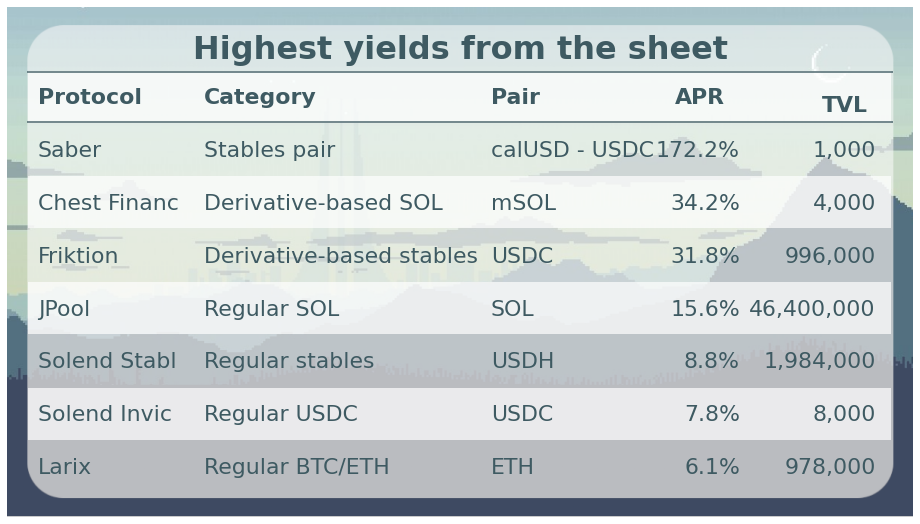

In [299]:
criteria = df_combined['Pair type'].isin(['single sided stables'])
criteria2 = ~df_combined['Protocol'].isin(lijst_derivatives)
criteria3 = df_combined['url'] != 'https://tulip.garden/strategy'
criteria4 = ~(df_combined['Pair part 1'].str.contains('UST') | df_combined['Pair part 2'].str.contains('UST'))
 

highest_plain_single_stables = df_combined.loc[criteria&criteria2&criteria3&criteria4, :].head(1)
highest_plain_single_stables['Category'] = 'Regular stables'
# '--------------------------------------------------------------------'
criteria = df_combined['Pair type'].isin(['single sided stables'])
criteria2 = df_combined['Protocol'].isin(lijst_derivatives)

single_stables_derivative = df_combined.loc[criteria&criteria2, :].head(1)
single_stables_derivative['Category'] = 'Derivative-based stables'
# '--------------------------------------------------------------------'
criteria = df_combined['Pair'] == 'SOL'
criteria2 = ~df_combined['Protocol'].isin(lijst_derivatives)
criteria3 = df_combined['url'] != 'https://tulip.garden/strategy'

highest_plain_single_sol = df_combined.loc[criteria&criteria2&criteria3, :].head(1)
highest_plain_single_sol['Category'] = 'Regular SOL'
# '--------------------------------------------------------------------'
criteria = df_combined['Pair'] == 'USDC'
criteria2 = ~df_combined['Protocol'].isin(lijst_derivatives)
criteria3 = df_combined['url'] != 'https://tulip.garden/strategy'

highest_plain_usdc = df_combined.loc[criteria&criteria2&criteria3, :].head(1)
highest_plain_usdc['Category'] = 'Regular USDC'
# '--------------------------------------------------------------------'
criteria = df_combined['Pair type'].isin(['single sided SOL'])
criteria2 = df_combined['Protocol'].isin(lijst_derivatives)

single_sol_derivative = df_combined.loc[criteria&criteria2, :].head(1)
single_sol_derivative['Category'] = 'Derivative-based SOL'
# '--------------------------------------------------------------------'
criteria = df_combined['Pair type'].isin(['stables - stables'])
criteria4 = ~(df_combined['Pair part 1'].str.contains('UST') | df_combined['Pair part 2'].str.contains('UST'))
highest_stables_pair = df_combined.loc[criteria & criteria4, :].head(1)
highest_stables_pair['Category'] = 'Stables pair'
# '--------------------------------------------------------------------'
criteria = df_combined['Pair type'].isin(['SOL - stables'])
highest_sol_stable_pair = df_combined.loc[criteria, :].head(1)
highest_sol_stable_pair['Category'] = 'Highest SOL - stable pair'
# '--------------------------------------------------------------------'
criteria = df_combined['Pair type'].isin(['SOL - BTC/ETH'])
highest_sol_btceth_pair = df_combined.loc[criteria, :].head(1)
highest_sol_btceth_pair['Category'] = 'Highest SOL - ETH/BTC pair'
# '--------------------------------------------------------------------'
criteria = df_combined['Pair type'].isin(['SOL - SOL'])
highest_sol_sol_pair = df_combined.loc[criteria, :].head(2).tail(1)
highest_sol_sol_pair['Category'] = 'Highest SOL - SOL pair'
# '--------------------------------------------------------------------'
criteria = df_combined['Pair type'].isin(['single sided SOL'])
highest_single_sol_lending = df_combined.loc[criteria, :].head(1)
highest_single_sol_lending['Category'] = 'Highest single sided SOL'
# '--------------------------------------------------------------------'
criteria = df_combined['Pair type'].isin(['SOL - other', 'SOL - SOL', 'SOL - BTC/ETH', 'SOL - stables'])
highest_sol_pair = df_combined.loc[criteria, :].head(2).tail(1)
highest_sol_pair['Category'] = 'Highest SOL pair'
# '--------------------------------------------------------------------'
criteria = df_combined['Pair type'].isin(['single sided stables'])
highest_single_stables = df_combined.loc[criteria, :].head(1)
highest_single_stables['Category'] = 'Highest single sided stables'
# '--------------------------------------------------------------------'
criteria = df_combined['Pair'] == 'SOL'
highest_pure_sol = df_combined.loc[criteria, :].head(1)
highest_pure_sol['Category'] = 'Highest single sided SOL'
# '--------------------------------------------------------------------'
criteria = df_combined['Pair'].isin(['ETH', 'BTC'])
criteria2 = ~df_combined['Protocol'].isin(lijst_derivatives)
criteria3 = df_combined['url'] != 'https://tulip.garden/strategy'

highest_plain_btceth = df_combined.loc[criteria&criteria2&criteria3, :].head(1)
highest_plain_btceth['Category'] = 'Regular BTC/ETH'
# '--------------------------------------------------------------------'
# highest_sol_sol_pair
final_sol = pd.concat([highest_plain_single_stables,
                       single_stables_derivative,
                       highest_stables_pair,
                       highest_plain_single_sol,
                       single_sol_derivative,
                       highest_plain_btceth,
                       highest_plain_usdc])[['Category',
                                               'Pair',
                                               'APR',
                                               'Protocol',
                                               'url',
                                               'TVL']]
final_sol['Protocol'] = final_sol['Protocol'].str.slice(0,12)
final_sol['Pair'] = final_sol['Pair'].str.slice(0,13)

final_sol['APR'] = final_sol['APR'] * 100
final_sol = final_sol.sort_values(by = ['APR'], ascending = False)\
                     .reset_index()\
                     .drop(columns = 'index')
final_sol = final_sol[['Protocol', 'TVL', 'Category', 'Pair', 'APR']]
final_sol.columns = ['Protocol', 'Total value locked', 'Category', 'Pair', 'APR']
final_sol = final_sol[['Protocol', 'Category', 'Pair', 'APR', 'Total value locked']]
final_sol['key'] = final_sol['Protocol'] +\
                   final_sol['Total value locked'].astype(str) +\
                   final_sol['Pair'] +\
                   final_sol['APR'].astype(str)
final_sol = final_sol.drop_duplicates(subset = 'key').drop(columns = 'key')

final_sol['Category'] = final_sol['Category'].str.replace('Highest ','')
final_sol['APR'] = final_sol['APR'].astype(float).round(1).astype('str') + '%'

final_sol['Total value locked'] = final_sol['Total value locked'].astype(float).round(-3).astype(int).astype(str)
final_sol['Total value locked'] = final_sol['Total value locked']
def complex_function(tvl):
    if len(tvl) > 9:
        return tvl[:-9] + ',' + tvl[-9:-6] + tvl[-6:-3] + ',' + tvl[-3:]   
    elif len(tvl) > 6:
        return tvl[:-6] + ',' + tvl[-6:-3] + ',' + tvl[-3:]
    elif len(tvl) > 3:
        return tvl[:-3] + ',' + tvl[-3:]
    

final_sol['TVL'] = final_sol['Total value locked'].apply(complex_function).fillna('Unknown')
final_sol = final_sol.drop(columns = ['Total value locked'])
final_sol
#-------------------------------------------------------------------------------
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.subplots(figsize=(1200*px, 675*px))

# draw background pic
img = mpimg.imread('Ovu background stretched v6.png')
imgplot = plt.imshow(img)


# draw header
font = 'Garuda'
text_kwargs = dict(ha='center', va='center', fontsize=32, color='#3E5A62', fontfamily = font,
                   weight = 'semibold', stretch = 'normal')
plt.text(600, 57, 'Highest yields from the sheet', **text_kwargs)


# draw column headers
text_kwargs = dict(ha='left', va='center', fontsize=22, color='#3E5A62', fontfamily = font,
                   weight = 'semibold', stretch = 'normal')
plt.text(40, 120, 'Protocol', **text_kwargs)
plt.text(260, 120, 'Category', **text_kwargs)
plt.text(640, 120, 'Pair', **text_kwargs)
text_kwargs = dict(ha='right', va='center', fontsize=22, color='#3E5A62', fontfamily = font,
                   weight = 'semibold', stretch = 'normal')
plt.text(950, 120, 'APR', **text_kwargs)
plt.text(1140, 130, 'TVL', **text_kwargs)


# draw thick lines
for count, i in enumerate(final_sol['Protocol'][::2]):
    plt.plot(np.array([62, 1136]),
             np.array([118 + count * 140, 118 + count * 140]),
             c = '#FFFFFF',
             alpha=0.7,
             linewidth = 52)


# draw line at top of table
plt.plot(np.array([27, 1171]),
         np.array([152, 152]),
         c = '#3E5A62', alpha=0.7, linewidth = 2)


# draw line at top of table
plt.plot(np.array([27, 1171]),
         np.array([85, 85]),
         c = '#3E5A62', alpha=0.7, linewidth = 2)


# draw table values
text_kwargs = dict(ha='left', va='center', fontsize=22, color='#3E5A62', fontfamily = font,
                   weight = 'normal', stretch = 'normal')

for count, i in enumerate(final_sol['Protocol']):
    plt.text(40, 190 + count * 70, i, **text_kwargs)
    
for count, i in enumerate(final_sol['Category']):
    plt.text(260, 190 + count * 70, i, **text_kwargs)
    
for count, i in enumerate(final_sol['Pair']):
    plt.text(640, 190 + count * 70, i, **text_kwargs)
    
text_kwargs = dict(ha='right', va='center', fontsize=22, color='#3E5A62', fontfamily = font,
                   weight = 'normal', stretch = 'normal')

for count, i in enumerate(final_sol['APR']):
    plt.text(970, 190 + count * 70, i, **text_kwargs)
    
for count, i in enumerate(final_sol['TVL']):
    plt.text(1150, 190 + count * 70, i, **text_kwargs)


plt.axis('off')
timestamp = datetime.datetime.now().strftime('%b %d ') +\
             str(int(datetime.datetime.now().strftime('%H')))  +\
            datetime.datetime.now().strftime(':%M GMT')

plt.savefig('Twitter picture.png', bbox_inches="tight", pad_inches = -0.00)
plt.show()


### Upload naar Airtable

In [300]:
df_combined['url'].nunique()

83

In [ ]:
Updated the #Solana yield farm spreadsheet:

https://airtable.com/shrLkTp02CdCHsOKo

It currently contains 83 sites, among which:
$RAY $TULIP $ORCA $MDNE $SLND $SUNNY $LDO $SBR $MNGO $LARIX $PRT $APT $PORT $ALM $SOCN $JET $RIN $MER $FAB $REN $SNY $YARD $POLE $CYS $SNTR $ACMN

## Borrow Lending (fix solend hide van 25 april)

In [ ]:
df_combined_nerfed = df_combined.copy()

criteria = df_combined_nerfed['Protocol'].isin(['Apricot',
                                                'Larix',
                                                'Solend',
                                                'Solend Bonfida Pool',
                                                'Solend Coin98 Pool',
                                                'Solend Dog Pool',
                                                'Solend NFT Pool',
                                                'Solend Stable Pool',
                                                'Solend Star Atlas Pool',
                                                'Solend Step Pool',
                                                'Solend STEPN Pool',
                                                'Solend UXD Pool',
                                                'Solend Turbo SOL Pool'])

df_combined_nerfed = pd.concat([df_combined_nerfed.loc[~criteria, :],
                                df_total_larix_nerfed,
                                solend_partially_nerfed,
                                df_solend_concentrated_combined_partially_nerfed])


df_combined_nerfed = df_combined_nerfed.drop_duplicates()

df_combined_nerfed = df_combined_nerfed.rename(columns = {'Return type':'Return displayed on website',
                                                          'Investment type':'How to invest'})
df_combined_nerfed['Pair'] = df_combined_nerfed['Pair'].str.replace('/','-', regex = True)
df_combined_nerfed['Pair'] = df_combined_nerfed['Pair'].str.replace('+','-', regex = True)
df_combined_nerfed['Pair'] = df_combined_nerfed['Pair'].str.replace(' ','', regex = True)
df_combined_nerfed['Pair'] = df_combined_nerfed['Pair'].str.replace('•','-', regex = True)
df_combined_nerfed['Pair'] = df_combined_nerfed['Pair'].str.replace('-',' - ', regex = True)
df_combined_nerfed['TVL'] = df_combined_nerfed['TVL'].replace('',0).replace('-',0).astype(float).round(2)
df_combined_nerfed = df_combined_nerfed[['Protocol',
                                         'Pair',
                                         'APR',
                                         'APY',
                                         'TVL',
                                         'How to invest',
                                         'Return displayed on website',
                                         'url']]
df_combined_nerfed = df_combined_nerfed.sort_values(by = ['APR','TVL'], ascending = False)

df_combined_nerfed = df_combined_nerfed.fillna('')
df_combined_nerfed = df_combined_nerfed.rename(columns = {'APY':'APY (daily compounded)'})

criteria1 = df_combined_nerfed['Pair'].str.len() >0 
criteria2 = df_combined_nerfed['APR'].astype(str).str.len() >0
df_combined_nerfed = df_combined_nerfed.loc[criteria1, :]
criteria1 = df_combined_nerfed['TVL'] > 100
# criteria2 = df_combined_nerfed['APR'].astype(float) > 0
df_combined_nerfed = df_combined_nerfed.loc[criteria1, :]


df_pair_tussenframe = df_combined_nerfed['Pair'].str.split(' - ', expand = True)

column_names = []

for column in df_pair_tussenframe.columns:
    column_names.append('Pair part '+str(column + 1))
df_pair_tussenframe.columns = column_names
df_pair_tussenframe
df_combined_nerfed[column_names] = df_pair_tussenframe

for column in column_names:
    df_combined_nerfed[column] = df_combined_nerfed[column].astype(str)
df_combined_nerfed['Pair type'] = ''
print(len(df_combined_nerfed))

In [ ]:
total_borrow_lending = total_borrow_lending.dropna(subset = ['Token'])

In [ ]:
borrow_lending_tokens = total_borrow_lending['Token'].unique().tolist()
criteria1 = ~total_borrow_lending['Token'].str.contains('-')
criteria2 = total_borrow_lending['Borrow APR'] != 0
single_borrow_lending_tokens = total_borrow_lending.loc[criteria1 & criteria2,'Token'].sort_values().unique().tolist()

In [ ]:
print(total_borrow_lending.sort_values(by = ['Token']).to_string())

### Long short borrow lending

In [ ]:
def filter_pairs_borrow_one_supply_one(supplied_token, borrowed_token, borrow_lending_df, df_combined, apr):
    criteria1 = borrow_lending_df['Token'] == supplied_token
    criteria2 = borrow_lending_df['Token'] == borrowed_token
    criteria_mogelijke_combinatie = len(set(borrow_lending_df.loc[criteria1, 'Protocol']) & set(borrow_lending_df.loc[criteria2, 'Protocol'])) == 0

    # ga nu alleen protocols selecteren die zowel pair one als pair two hebben
    df_protocols = borrow_lending_df.loc[criteria1 | criteria2, 'Protocol'].value_counts().reset_index()

    criteria3 = df_protocols['Protocol'] == df_protocols['Protocol'].max()
    criteria_protocols = borrow_lending_df['Protocol'].isin(df_protocols.loc[criteria3, 'index'].values.tolist())

    tussenframe = borrow_lending_df.loc[criteria_protocols & (criteria1 | criteria2), :]
    tussenframe_pivot = pd.pivot_table(tussenframe, 
                                       index = ['Protocol'],
                                       columns = ['Token'],
                                       sort = True)

    tussenframe_pivot = tussenframe_pivot.drop(columns = [('Borrow APR', supplied_token),
                                                          ('Supply APR', borrowed_token),
                                                          ('LTV', borrowed_token)])
    
    tussenframe_pivot['Total APR'] = 0
    
    for protocol in tussenframe_pivot.index:
        if protocol == 'Mango':
            tussenframe_pivot.loc[protocol,'Total APR'] = tussenframe_pivot[('Supply APR', supplied_token)].loc['Mango'] +\
                0.75 * tussenframe_pivot[('LTV', supplied_token)].loc['Mango'] * tussenframe_pivot[('Borrow LTV', borrowed_token)].loc['Mango'] \
                * (apr - tussenframe_pivot[('Borrow APR', borrowed_token)].loc['Mango'])
            
        else:
            tussenframe_pivot.loc[protocol,'Total APR'] = tussenframe_pivot[('Supply APR', supplied_token)].loc[protocol] +\
                                             0.75 * tussenframe_pivot[('LTV', supplied_token)].loc[protocol] * (apr - tussenframe_pivot[('Borrow APR', borrowed_token)].loc[protocol])
    
    tussenframe_pivot = tussenframe_pivot.sort_values(by = ['Total APR'], ascending = False).head(1)
#     return tussenframe_pivot
    if criteria_mogelijke_combinatie:
        return ('None','None','No combination','None','None','None')
    else:
#             return tussenframe_pivot
        try:
            return tussenframe_pivot.index[0],\
            round(tussenframe_pivot['Total APR'].values[0],2),\
            "Supply 1d of " + supplied_token + ", borrow " + str(round(0.75 * tussenframe_pivot[('LTV', supplied_token)].values[0],2))+ 'd of ' + borrowed_token,\
            tussenframe_pivot[('Supply APR', supplied_token)].values[0],\
            tussenframe_pivot[('Borrow APR', borrowed_token)].values[0],\
            apr

        except:
            return ('None','None','No combination','None','None','None')


filter_pairs_borrow_one_supply_one('UST', 'SOL', total_borrow_lending, df_combined, 0.362668)

In [ ]:
def supply_one_borrow_one_singlesided(df_combined_nerfed, supplied_token, borrowed_token):
    try:
        criteria1 = df_combined_nerfed['Pair'] == borrowed_token

        df_supply_one_borrow_one_singlesided = df_combined_nerfed.loc[criteria1, :].copy()
        df_supply_one_borrow_one_singlesided[['Borrow protocol',
                                              'Final APR',
                                              'Category',
                                              'Supply APR',
                                              'Borrow APR',
                                              'Farm APR']] = df_supply_one_borrow_one_singlesided.apply(lambda x: filter_pairs_borrow_one_supply_one(supplied_token,
                                                                                                                                                              borrowed_token,
                                                                                                                                                              total_borrow_lending,
                                                                                                                                                              df_combined_nerfed,
                                                                                                                                                              x['APR']),
                                                                                                                   axis=1,
                                                                                                                   result_type="expand")

        #filter_pairs_borrow_one_supply_one(supplied_token, borrowed_token, borrow_lending_df, df_combined_nerfed, apr)
        criteria3 = df_supply_one_borrow_one_singlesided['Category'] != 'No combination'
        df_supply_one_borrow_one_singlesided = df_supply_one_borrow_one_singlesided.loc[criteria3, :].sort_values(by = 'Final APR', ascending = False) # let op, je neemt alleen de vijf beste resultaten
        return df_supply_one_borrow_one_singlesided
    except:
        return pd.DataFrame()
    

df_total_supply_one_borrow_one_singlesided = pd.DataFrame([])
for token in ['USDC']:
    for borrowed_token in borrow_lending_tokens:
        df_total_supply_one_borrow_one_singlesided =  pd.concat([df_total_supply_one_borrow_one_singlesided,
                                                                supply_one_borrow_one_singlesided(df_combined_nerfed, token, borrowed_token)])

criteria1 = df_total_supply_one_borrow_one_singlesided['Protocol'].isin(lijst_derivatives)
criteria2 = df_total_supply_one_borrow_one_singlesided['url'] != 'https://tulip.garden/strategy' #verwijder USDC tulip die friktion heeft
criteria3 = df_total_supply_one_borrow_one_singlesided['Protocol'].isin(['Acumen']) |\
            df_total_supply_one_borrow_one_singlesided['Borrow protocol'].isin(['Acumen']) |\
            df_total_supply_one_borrow_one_singlesided['Borrow protocol'].isin(['Oxygen']) |\
            df_total_supply_one_borrow_one_singlesided['Protocol'].isin(['Oxygen'])

criteria4 = df_total_supply_one_borrow_one_singlesided['Pair'].str.contains('UST')


df_total_supply_one_borrow_one_singlesided.loc[~criteria1 & criteria2 & ~criteria3 & ~criteria4, :].sort_values(by = ['Final APR'], ascending = False).head(80)[['Protocol',
                                                                                                                                       'Borrow protocol',
                                                                                                                                       'Pair',
                                                                                                                                       'Category',
                                                                                                                                       'Farm APR',
                                                                                                                                       'Supply APR',
                                                                                                                                       'Borrow APR',
                                                                                                                                       'Final APR']].rename(columns = {'Final APR':'Final longshort APR'}).head(40)

In [ ]:
print(df_total_supply_one_borrow_one_singlesided.loc[~criteria1 & criteria2 & ~criteria3 & ~criteria4, :]\
                                                .sort_values(by = ['Final APR'], ascending = False)[['Protocol',
                                                                                                     'Borrow protocol',
                                                                                                     'Pair',
                                                                                                     'Category',
                                                                                                     'Final APR','Supply APR']]\
                                                .rename(columns = {'Final APR':'Final longshort APR'})\
                                                .to_string())


In [ ]:
criteria1 = df_combined['Pair'].isin(['USDC'])
criteria2 = ~df_combined['Pair'].astype(str).str.contains('-')
criteria3 = ~df_combined['Protocol'].isin(lijst_derivatives)
criteria4 = ~df_combined['How to invest'].str.contains('derivatives')
criteria_combined = criteria1 & criteria2 & criteria3 & criteria4
highest_bluechip_stable_single_lending = df_combined.loc[criteria_combined, :]
highest_bluechip_stable_single_lending['Borrow protocol'] = 'No borrow/lending'
highest_bluechip_stable_single_lending['Final APR'] = highest_bluechip_stable_single_lending['APR']
highest_bluechip_stable_single_lending['Category'] = 'Highest single sided bluechip Stables'
highest_bluechip_stable_single_lending

In [ ]:
criteria1 = df_combined['Pair part 1'].isin(list_stables) & df_combined['Pair part 2'].isin(list_stables)
criteria2 = df_combined['Pair part 1'].str.contains('UST')| df_combined['Pair part 2'].str.contains('UST')
criteria3 = ~df_combined['Protocol'].isin(lijst_derivatives)
criteria4 = ~df_combined['How to invest'].str.contains('derivatives')
criteria_combined = criteria1 & ~criteria2 & criteria3 & criteria4
stable_stable_pair = df_combined.loc[criteria_combined, :].head(30)
stable_stable_pair['Borrow protocol'] = 'No borrow/lending'
stable_stable_pair['Final APR'] = stable_stable_pair['APR']
stable_stable_pair['Category'] = 'Stable-stable pair'
stable_stable_pair

In [ ]:
tokens = []
current_price = []
seven_day_max_deviation = []
thirty_day_max_deviation = []

for token in single_borrow_lending_tokens:
    if token in ['COPE','MER','ORCA','PORT','SBR','SLND','stSOL','lsIN']:
        driver.get('https://coinmarketcap.com/currencies/'+token.lower().replace('btcb','bitcoin')\
                                                                        .replace('avax','avalanche')\
                                                                        .replace('atlas','star-atlas')\
                                                                        .replace('fida','bonfida')\
                                                                        .replace('luna','terra-luna')\
                                                                        .replace('mer','mercurial-finance')\
                                                                        .replace('mngo','mango-markets')\
                                                                        .replace('port','port-finance')\
                                                                        .replace('samo','samoyedcoin')\
                                                                        .replace('ray','raydium')\
                                                                        .replace('sbr','saber')\
                                                                        .replace('msol','marinade')\
                                                                        .replace('psol','sol')\
                                                                        .replace('softt','ftt')\
                                                                        .replace('ftt','ftx-token')\
                                                                        .replace('soeth','eth')\
                                                                        .replace('srm','serum')\
                                                                        .replace('xstep','step')\
                                                                        .replace('step','step-finance')\
                                                                        .replace('btc','bitcoin')\
                                                                        .replace('bifi','beefy-finance')\
                                                                        .replace('wheth','eth')\
                                                                        .replace('eth','ethereum')\
                                                                        .replace('crv','curve-dao-token')\
                                                                        .replace('ftm','fantom')\
                                                                        .replace('spell','spell-token')\
                                                                        .replace('spirit','spiritswap')\
                                                                        .replace('sushi','sushiswap')\
                                                                        .replace('snx','synthetix-network-token')\
                                                                        .replace('yfi','yearn-finance')\
                                                                        .replace('scnsol','sol')\
                                                                        .replace('sol','solana')\
                                                                        .replace('slnd','solend')\
                                                                        .replace('stsol','lido-for-solana')\
                                                                        .replace('solanaana','solana')\
                                                                        .replace('lsin','invictus')\
                                                                        .replace('link','chainlink')+'/historical-data/')
        time.sleep(3)
        soup = BeautifulSoup(driver.page_source, "html.parser")
        table = soup.find_all('tbody')[-1:][0]

        tussentabel = []
        for i in table.find_all('td')[4::6][:30]:
            tussentabel.append(float(str(i).replace('<td>$','').replace('</td>','').replace(',','')))
        seven_day_max_deviation.append(max(tussentabel[:6]) - min(tussentabel[:6]))
        thirty_day_max_deviation.append(max(tussentabel) - min(tussentabel))
        current_price.append(tussentabel[0])    
        
    elif token not in ['USDT',
                     'USDC',
                     'UST',
                     'MER3POOL v1',
                     'wUST',
                     'USTw',
                     'USDH',
                     'SMBD',
                     'UXD',
                     'PAI',
                     'COPE']:
        driver.get('https://coinmarketcap.com/currencies/'+token.lower().replace('btcb','bitcoin')\
                                                                    .replace('avax','avalanche')\
                                                                    .replace('atlas','star-atlas')\
                                                                    .replace('fida','bonfida')\
                                                                    .replace('luna','terra-luna')\
                                                                    .replace('mer','mercurial-finance')\
                                                                    .replace('mngo','mango-markets')\
                                                                    .replace('port','port-finance')\
                                                                    .replace('ray','raydium')\
                                                                    .replace('sbr','saber')\
                                                                    .replace('samo','samoyedcoin')\
                                                                    .replace('msol','marinade')\
                                                                    .replace('psol','sol')\
                                                                    .replace('softt','ftt')\
                                                                    .replace('ftt','ftx-token')\
                                                                    .replace('soeth','eth')\
                                                                    .replace('srm','serum')\
                                                                    .replace('xstep','step')\
                                                                    .replace('wbwbnb','bnb')\
                                                                    .replace('step','step-finance')\
                                                                    .replace('btc','bitcoin')\
                                                                    .replace('bifi','beefy-finance')\
                                                                    .replace('weweth','eth')\
                                                                    .replace('wheth','eth')\
                                                                    .replace('eth','ethereum')\
                                                                    .replace('crv','curve-dao-token')\
                                                                    .replace('ftm','fantom')\
                                                                    .replace('spell','spell-token')\
                                                                    .replace('spirit','spiritswap')\
                                                                    .replace('sushi','sushiswap')\
                                                                    .replace('snx','synthetix-network-token')\
                                                                    .replace('yfi','yearn-finance')\
                                                                    .replace('scnsol','sol')\
                                                                    .replace('sol','solana')\
                                                                    .replace('slnd','solend')\
                                                                    .replace('stsol','lido-for-solana')\
                                                                    .replace('solanaana','solana')\
                                                                    .replace('lsin','invictus')\
                                                                    .replace('link','chainlink')+'/historical-data/')
        time.sleep(3)
        soup = BeautifulSoup(driver.page_source, "html.parser")
        table = soup.find_all('tbody')[-1:][0]

        tussentabel = []
        for i in table.find_all('td')[4::7][:30]:
            tussentabel.append(float(str(i).replace('<td>$','').replace('</td>','').replace(',','')))
        seven_day_max_deviation.append(max(tussentabel[:6]) - min(tussentabel[:6]))
        thirty_day_max_deviation.append(max(tussentabel) - min(tussentabel))
        current_price.append(tussentabel[0])
        
    else:
        current_price.append(1)
        seven_day_max_deviation.append(0)
        thirty_day_max_deviation.append(0)
    tokens.append(token)

In [ ]:
df_drawdown = pd.DataFrame(list(zip(tokens, current_price, seven_day_max_deviation, thirty_day_max_deviation)),
                           columns = ['Pairs', 'Current price', '7-day high to low', '30-day high to low'])

df_drawdown['7-day drawdown'] = 1 - df_drawdown['7-day high to low'].abs()/df_drawdown['Current price']
df_drawdown['30-day drawdown'] = 1 - df_drawdown['30-day high to low'].abs()/df_drawdown['Current price']
df_drawdown

# Ga nu verder met je eigen stukje

## Supply pair, borrow 2 tokens

In [ ]:
print(total_borrow_lending.sort_values(by = ['Token','Supply APR'], ascending = [False, False]).to_string())

In [ ]:
def filter_double_pairs(part_one, part_two, basis, borrow_lending_df, apr):
    try:
        max_ltv_tolerance = 0.75
        criteria1 = borrow_lending_df['Token'] == part_one
        criteria2 = borrow_lending_df['Token'] == part_two
        criteria3 = borrow_lending_df['Token'] == basis
        left = ''
        middle = ''
        right = ''

        if part_one < part_two < basis:
            left = part_one
            middle = part_two
            right = basis
        elif part_one < basis < part_two:
            left = part_one
            middle = basis
            right = part_two
        elif basis < part_one < part_two:
            left = basis
            middle = part_one
            right = part_two
        elif basis < part_two < part_one:
            left = basis
            middle = part_two
            right = part_one
        elif part_two < basis < part_one:
            left = part_two
            middle = basis
            right = part_one
        elif part_two < part_one < basis:
            left = part_two
            middle = part_one
            right = basis

        # ga nu alleen protocols selecteren die zowel pair one als pair two hebben
        df_protocols = borrow_lending_df.loc[criteria1 | criteria2 | criteria3, 'Protocol'].value_counts().reset_index()
        criteria4 = df_protocols['Protocol'] == df_protocols['Protocol'].max()
        criteria_protocols = borrow_lending_df['Protocol'].isin(df_protocols.loc[criteria4, 'index'].values.tolist())
        tussenframe = pd.pivot_table(borrow_lending_df.loc[criteria_protocols & (criteria1 | criteria2 | criteria3), :],
                              values = ['Supply APR', 'Borrow APR', 'LTV', 'Borrow LTV'],
                              index = ['Protocol'],
                              columns = ['Token'],
                              aggfunc= 'sum').droplevel(0, axis = 1)
        tussenframe.columns = ['Borrow APR' + ' ' + left,
                               'Borrow APR' + ' ' + middle,
                               'Borrow APR' + ' ' + right,
                               'Borrow LTV' + ' ' + left,
                               'Borrow LTV' + ' ' + middle,
                               'Borrow LTV' + ' ' + right,
                               'LTV' + ' ' + left,
                               'LTV' + ' ' + middle,
                               'LTV' + ' ' + right,
                               'Supply APR' + ' ' + left,
                               'Supply APR' + ' ' + middle,
                               'Supply APR' + ' ' + right]
        tussenframe = tussenframe.drop(columns = ['Borrow LTV ' + basis,
                                                  'Borrow APR ' + basis,
                                                  'LTV ' + part_one,
                                                  'LTV ' + part_two,
                                                  'Supply APR ' + part_one,
                                                  'Supply APR ' + part_two])
        tussenframe['Borrow LTV ' + part_one + ' ' + basis] = max_ltv_tolerance * tussenframe['LTV ' + basis] / tussenframe['Borrow LTV ' + part_one]
        tussenframe['Borrow LTV ' + part_two + ' ' + basis] = max_ltv_tolerance * tussenframe['LTV ' + basis] / tussenframe['Borrow LTV ' + part_two]
        tussenframe['Borrow Share ' + part_one] = tussenframe['Borrow LTV ' + part_two + ' ' + basis] / (tussenframe['Borrow LTV ' + part_one + ' ' + basis] + tussenframe['Borrow LTV ' + part_two + ' ' + basis])
        tussenframe['Borrow Share ' + part_two] = tussenframe['Borrow LTV ' + part_one + ' ' + basis] / (tussenframe['Borrow LTV ' + part_two + ' ' + basis] + tussenframe['Borrow LTV ' + part_one + ' ' + basis])
        tussenframe['Final Borrow Share ' + part_one] = (tussenframe['Borrow LTV ' + part_one + ' ' + basis] + tussenframe['Borrow LTV ' + part_two + ' ' + basis]) * 0.5 * tussenframe['Borrow Share ' + part_one]
        tussenframe['Final Borrow Share ' + part_two] = (tussenframe['Borrow LTV ' + part_one + ' ' + basis] + tussenframe['Borrow LTV ' + part_two + ' ' + basis]) * 0.5 * tussenframe['Borrow Share ' + part_two]
        tussenframe['Total APR'] = 0.5 * (tussenframe['Borrow LTV ' + part_one + ' ' + basis] + tussenframe['Borrow LTV ' + part_two + ' ' + basis]) * apr \
                                   + tussenframe['Supply APR ' + basis] \
                                   - tussenframe['Borrow APR ' + part_one] * tussenframe['Final Borrow Share ' + part_one] \
                                   - tussenframe['Borrow APR ' + part_two] * tussenframe['Final Borrow Share ' + part_two]
        criteria4 = tussenframe['Total APR'] == tussenframe['Total APR'].max()
        return tussenframe.loc[criteria4, :].index[0],\
               tussenframe.loc[criteria4, 'Total APR'].values[0],\
               "Supply "  + "1\$ of " + str(basis) + " and borrow " +\
                            str(round(tussenframe.loc[criteria4, 'Final Borrow Share ' + part_one].values[0],3)) + '\$ ' + part_one + ' and '+\
                            str(round(tussenframe.loc[criteria4, 'Final Borrow Share ' + part_two].values[0],3)) + '\$ ' + part_two +\
                            ' on '+ tussenframe.index[0]
    except:
        return ('None','None','No combination')

# filter_double_pairs('SOL', 'USDC', 'SOL-USDC', total_borrow_lending, 0.77518)


def apply_lend_double_borrow(hoofd_df, borrow_lending_tokens, supplied_token):
    criteria1 = hoofd_df['Pair'].isin(borrow_lending_tokens)
    criteria2 = hoofd_df['Pair part 1'].isin(borrow_lending_tokens)
    criteria3 = hoofd_df['Pair part 2'].isin(borrow_lending_tokens)    
    
    supply_btc_borrowlend_borrowlend = hoofd_df.loc[criteria1 | (criteria2 & criteria3), :].copy() # let op, je neemt alleen de vijf beste resultaten
    supply_btc_borrowlend_borrowlend[['Borrow protocol','Final APR', 'Category']] = \
    supply_btc_borrowlend_borrowlend.apply(lambda x: filter_double_pairs(x['Pair part 1'],
                                                                         x['Pair part 2'],
                                                                         supplied_token,
                                                                         total_borrow_lending,
                                                                         x['APR']),
                                           axis = 1,
                                           result_type = "expand")
    return supply_btc_borrowlend_borrowlend

apply_lend_double_borrow(df_combined, borrow_lending_tokens, 'SOL-USDC')

pairlist = []
for tokena in ['SOL', 'USDC', 'USDT']:
    for tokenb in ['SOL', 'USDC', 'USDT']:
        if tokena != tokenb:
            pairlist.append(tokena +'-'+tokenb)

lend_lp_double_borrow = pd.DataFrame([])
for token in pairlist:
    lend_lp_double_borrow =  lend_lp_double_borrow.append(apply_lend_double_borrow(df_combined, borrow_lending_tokens, token))

criteria = lend_lp_double_borrow['Final APR'].astype(str) != 'None'
lend_lp_double_borrow = lend_lp_double_borrow.loc[criteria, :].sort_values(by = 'Final APR', ascending = False)
lend_lp_double_borrow

### Supply 1 token, borrow 1 token, invest in pair (incl impermanent loss in 2e cell)

In [ ]:
def calc_il(x,y):
    k = x/y
    return 2 * k ** 0.5 / (1 + k) - 1

In [ ]:
def filter_pairs(part_one, part_two, basis, borrow_lending_df, apr):
    try:
        criteria1 = borrow_lending_df['Token'] == part_one
        criteria2 = borrow_lending_df['Token'] == part_two
        criteria_mogelijke_combinatie = len(set(borrow_lending_df.loc[criteria1, 'Protocol']) & set(borrow_lending_df.loc[criteria2, 'Protocol'])) == 0

        if part_one == basis:
            other_token = part_two
        else:
            other_token = part_one

        if part_one > part_two:
            alphabet_one = part_two
        else:
            alphabet_one = part_one

        if part_one < part_two:
            alphabet_two = part_two
        else:
            alphabet_two = part_one

        # ga nu alleen protocols selecteren die zowel pair one als pair two hebben
        df_protocols = borrow_lending_df.loc[criteria1 | criteria2, 'Protocol'].value_counts().reset_index()
        criteria3 = df_protocols['Protocol'] == df_protocols['Protocol'].max()
        criteria_protocols = borrow_lending_df['Protocol'].isin(df_protocols.loc[criteria3, 'index'].values.tolist())

        tussenframe = pd.pivot_table(borrow_lending_df.loc[criteria_protocols & (criteria1 | criteria2), :],
                              values = ['Supply APR', 'Borrow APR', 'LTV'],
                              index = ['Protocol'],
                              columns = ['Token'],
                              aggfunc= 'sum')
        tussenframe.columns = ['Borrow APR' + ' ' + alphabet_one,
                               'Borrow APR' + ' ' + alphabet_two,
                               'LTV' + ' ' + alphabet_one,
                               'LTV' + ' ' + alphabet_two,
                               'Supply APR' + ' ' + alphabet_one,
                               'Supply APR' + ' ' + alphabet_two]

        tussenframe['Supply share'] = (1 / (1 + 0.75 * tussenframe['LTV' + ' ' + basis]))
        tussenframe['Supply APR final'] = tussenframe['Supply share'] * tussenframe['Supply APR' + ' ' + basis]
        tussenframe['Borrow share'] = tussenframe['Supply share'] * tussenframe['LTV' + ' ' + basis] * 0.75
        tussenframe['Borrow APR final'] = tussenframe['Borrow share'] * tussenframe['Borrow APR' + ' ' + basis]
        tussenframe['Total APR'] = tussenframe['Borrow share'] * 2 * apr + tussenframe['Supply APR final'] - tussenframe['Borrow APR final']
        criteria4 = tussenframe['Total APR'] == tussenframe['Total APR'].max()
        # return tussenframe
        if criteria_mogelijke_combinatie:
            return ('None','None','No combination','No borrow share')
        try:
            if 2*tussenframe.loc[criteria4, 'Supply share'].values[0] > 1:
                a =2* tussenframe.loc[criteria4, 'Borrow share'].values[0]
            else:
                a = 2*tussenframe.loc[criteria4, 'Supply share'].values[0]
            return tussenframe.loc[criteria4, :].index[0],\
               tussenframe.loc[criteria4, 'Total APR'].values[0],\
               "For each 1\$ of "+ basis +", supply "  + str(round(tussenframe.loc[criteria4, 'Supply share'].values[0],3)) + "\$ of " + basis + " and borrow " +\
                            str(round(tussenframe.loc[criteria4, 'Borrow share'].values[0],3)) + '\$ ' + other_token + ' on '+ tussenframe.loc[criteria4, :].index[0],\
               a
        except:
            return ('None','None','No combination','No borrow share')
    except:
        return ('None','None','No combination','No borrow share')

filter_pairs('SOL', 'SAMO', 'SOL', total_borrow_lending, 0.77518)

def supply_one_borrow_one(hoofd_df, borrow_lending_tokens, supplied_token):
    criteria1 = (df_combined['Pair part 1'].isin(borrow_lending_tokens)) & (df_combined['Pair part 2'] == supplied_token)
    criteria2 = (df_combined['Pair part 2'].isin(borrow_lending_tokens)) & (df_combined['Pair part 1'] == supplied_token)
    criteria3 = df_combined['Pair'].str.count('-') == 1

    supply_sol_borrowlend = df_combined.loc[(criteria1 | criteria2) & criteria3, :].copy()
    supply_sol_borrowlend[['Borrow protocol','Final APR', 'Category','Borrow share']] = supply_sol_borrowlend.apply(lambda x: filter_pairs(x['Pair part 1'],
                                                                                                            x['Pair part 2'],
                                                                                                            supplied_token,
                                                                                                            total_borrow_lending,
                                                                                                            x['APR']),
                                                                                                     axis=1,
                                                                                                     result_type="expand")
    criteria3 = supply_sol_borrowlend['Category'] != 'No combination'
    supply_sol_borrowlend = supply_sol_borrowlend.loc[criteria3, :].sort_values(by = 'Final APR', ascending = False) # let op, je neemt alleen de vijf beste resultaten
    return supply_sol_borrowlend

total_supply_one_borrow_one = pd.DataFrame([])
for token in ['UST']:
    total_supply_one_borrow_one =  pd.concat([total_supply_one_borrow_one,
                                              supply_one_borrow_one(df_combined, borrow_lending_tokens, token)])

pd.set_option('max_colwidth', None)    
total_supply_one_borrow_one.drop(columns = ['Pair part 1',
                                            'Pair part 2',
                                            'Pair part 3',
                                            'Pair part 4',
                                            'url',
                                            'Collaterable token(pair)',
                                            'Borrowable token(pair)'])

In [ ]:
total_supply_one_borrow_one2 = total_supply_one_borrow_one.merge(df_drawdown[['Pairs', '7-day drawdown','30-day drawdown']],
                                                           left_on = 'Pair part 1',
                                                           right_on = 'Pairs')\
                                                   .rename(columns = {'7-day drawdown':'7-day drawdown left',
                                                                      '30-day drawdown':'30-day drawdown left'})\
                                                   .drop(columns = ['Pairs'])\
                                                   .merge(df_drawdown[['Pairs', '7-day drawdown','30-day drawdown']],
                                                                                   left_on = 'Pair part 2',
                                                                                   right_on = 'Pairs')\
                                                                            .rename(columns = {'7-day drawdown':'7-day drawdown right',
                                                                                               '30-day drawdown':'30-day drawdown right'})\
                                                   .drop(columns = ['Pairs'])

total_supply_one_borrow_one2['7-day IL'] = calc_il(total_supply_one_borrow_one2['7-day drawdown left'], total_supply_one_borrow_one2['7-day drawdown right'])
total_supply_one_borrow_one2['7-day Final APR'] = (7/365) * total_supply_one_borrow_one2['Final APR'] 
total_supply_one_borrow_one2['7-day Final APR - IL'] = total_supply_one_borrow_one2['7-day Final APR'] + total_supply_one_borrow_one2['7-day IL']
# total_supply_one_borrow_one2['Net APR after IL (7d annualized)'] = (total_supply_one_borrow_one2['7-day Final APR'] + \
#                                                 total_supply_one_borrow_one2['Borrow share'] * total_supply_one_borrow_one2['7-day IL']) * (365/7)

total_supply_one_borrow_one2['30-day IL'] = calc_il(total_supply_one_borrow_one2['30-day drawdown left'], total_supply_one_borrow_one2['30-day drawdown right'])
total_supply_one_borrow_one2['30-day Final APR'] = (30/365) * total_supply_one_borrow_one2['Final APR'] 
total_supply_one_borrow_one2['30-day Final APR - IL'] = total_supply_one_borrow_one2['30-day Final APR'] + total_supply_one_borrow_one2['30-day IL']
# total_supply_one_borrow_one2['Net APR after IL (30d annualized)'] = (total_supply_one_borrow_one2['30-day Final APR'] + \
#                                                 total_supply_one_borrow_one2['Borrow share'] * total_supply_one_borrow_one2['30-day IL']) * (356/30)

total_supply_one_borrow_one2.sort_values(by = ['30-day Final APR - IL'], ascending = False).drop(columns = ['Pair part 3',
                                                                                                            'Unnamed: 0',
                                                                                                                        'Pair part 4',
                                                                                                                        'Pair part 1',
                                                                                                                        'Pair part 2',
                                                                                                                        'How to invest',
                                                                                                                        'Collaterable token(pair)',
                                                                                                                        'Borrowable token(pair)',
                                                                                                                        'APY (daily compounded)',
                                                                                                                        'Return displayed on website',
                                                                                                                        'url']).head(20)

In [ ]:
total_supply_one_borrow_one2.sort_values(by = ['30-day Final APR - IL'], ascending = False).drop(columns = ['Pair part 3',
                                                                                                                        'Pair part 4',
                                                                                                                        'Pair part 1',
                                                                                                                        'Pair part 2',
                                                                                                                        'How to invest',
                                                                                                                        'Collaterable token(pair)',
                                                                                                                        'Borrowable token(pair)',
                                                                                                                        'APY (daily compounded)',
                                                                                                                        'Return displayed on website',
                                                                                                                        'url']).to_clipboard()

### Supply 1 token, borrow 2 tokens

In [ ]:
def filter_double_pairs(part_one, part_two, basis, borrow_lending_df, apr):
    try:
        max_ltv_tolerance = 0.75
        criteria1 = borrow_lending_df['Token'] == part_one
        criteria2 = borrow_lending_df['Token'] == part_two
        criteria3 = borrow_lending_df['Token'] == basis
        left = ''
        middle = ''
        right = ''

        if part_one < part_two < basis:
            left = part_one
            middle = part_two
            right = basis
        elif part_one < basis < part_two:
            left = part_one
            middle = basis
            right = part_two
        elif basis < part_one < part_two:
            left = basis
            middle = part_one
            right = part_two
        elif basis < part_two < part_one:
            left = basis
            middle = part_two
            right = part_one
        elif part_two < basis < part_one:
            left = part_two
            middle = basis
            right = part_one
        elif part_two < part_one < basis:
            left = part_two
            middle = part_one
            right = basis

        # ga nu alleen protocols selecteren die zowel pair one als pair two hebben
        df_protocols = borrow_lending_df.loc[criteria1 | criteria2 | criteria3, 'Protocol'].value_counts().reset_index()
        criteria4 = df_protocols['Protocol'] == df_protocols['Protocol'].max()
        criteria_protocols = borrow_lending_df['Protocol'].isin(df_protocols.loc[criteria4, 'index'].values.tolist())
        tussenframe = pd.pivot_table(borrow_lending_df.loc[criteria_protocols & (criteria1 | criteria2 | criteria3), :],
                              values = ['Supply APR', 'Borrow APR', 'LTV'],
                              index = ['Protocol'],
                              columns = ['Token'],
                              aggfunc= 'sum').droplevel(0, axis = 1)
        tussenframe.columns = ['Borrow APR' + ' ' + left,
                               'Borrow APR' + ' ' + middle,
                               'Borrow APR' + ' ' + right,
                               'LTV' + ' ' + left,
                               'LTV' + ' ' + middle,
                               'LTV' + ' ' + right,
                               'Supply APR' + ' ' + left,
                               'Supply APR' + ' ' + middle,
                               'Supply APR' + ' ' + right]
        tussenframe = tussenframe.drop(columns = ['LTV ' + part_one,
                                                  'LTV ' + part_two,
                                                  'Supply APR ' + part_one,
                                                  'Supply APR ' + part_two])
        tussenframe['LTV ' + part_one + ' ' + basis] = max_ltv_tolerance * tussenframe['LTV ' + basis]
        tussenframe['LTV ' + part_two + ' ' + basis] = max_ltv_tolerance * tussenframe['LTV ' + basis]
        tussenframe['Borrow Share ' + part_one] = tussenframe['LTV ' + part_two + ' ' + basis] / (tussenframe['LTV ' + part_one + ' ' + basis] + tussenframe['LTV ' + part_two + ' ' + basis])
        tussenframe['Borrow Share ' + part_two] = tussenframe['LTV ' + part_one + ' ' + basis] / (tussenframe['LTV ' + part_two + ' ' + basis] + tussenframe['LTV ' + part_one + ' ' + basis])
        tussenframe['Final Borrow Share ' + part_one] = (tussenframe['LTV ' + part_one + ' ' + basis] + tussenframe['LTV ' + part_two + ' ' + basis]) * 0.5 * tussenframe['Borrow Share ' + part_one]
        tussenframe['Final Borrow Share ' + part_two] = (tussenframe['LTV ' + part_one + ' ' + basis] + tussenframe['LTV ' + part_two + ' ' + basis]) * 0.5 * tussenframe['Borrow Share ' + part_two]
        tussenframe['Total APR'] = 0.5 * (tussenframe['LTV ' + part_one + ' ' + basis] + tussenframe['LTV ' + part_two + ' ' + basis]) * apr \
                                   + tussenframe['Supply APR ' + basis] \
                                   - tussenframe['Borrow APR ' + part_one] * tussenframe['Final Borrow Share ' + part_one] \
                                   - tussenframe['Borrow APR ' + part_two] * tussenframe['Final Borrow Share ' + part_two]
        criteria4 = tussenframe['Total APR'] == tussenframe['Total APR'].max()

        return tussenframe.loc[criteria4, :].index[0],\
               tussenframe.loc[criteria4, 'Total APR'].values[0],\
               "Supply "  + "1\$ of " + str(basis) + " and borrow " +\
                            str(round(tussenframe.loc[criteria4, 'Final Borrow Share ' + part_one].values[0],3)) + '\$ ' + part_one + ' and '+\
                            str(round(tussenframe.loc[criteria4, 'Final Borrow Share ' + part_two].values[0],3)) + '\$ ' + part_two +\
                            ' on '+ tussenframe.loc[criteria4, :].index[0],\
                tussenframe.loc[criteria4, 'Final Borrow Share ' + part_one].values[0] + tussenframe.loc[criteria4, 'Final Borrow Share ' + part_two].values[0]
    except:
        return ('None','None','No combination','No borrow share')

filter_double_pairs('SOL', 'SAMO', 'USDC', total_borrow_lending, 0.77518)


def apply_lend_double_borrow(hoofd_df, borrow_lending_tokens, supplied_token):
    criteria1 = hoofd_df['Pair part 1'].isin(borrow_lending_tokens)
    criteria2 = hoofd_df['Pair part 2'].isin(borrow_lending_tokens)
    criteria3 = (hoofd_df['Pair part 1'] != supplied_token) & (hoofd_df['Pair part 2'] != supplied_token)
    criteria4 = df_combined['Pair'].str.count('-') == 1
    supply_btc_borrowlend_borrowlend = hoofd_df.loc[criteria1 & criteria2 & criteria3 & criteria4, :].copy()
    supply_btc_borrowlend_borrowlend[['Borrow protocol','Final APR', 'Category','Borrow share']] = \
    supply_btc_borrowlend_borrowlend.apply(lambda x: filter_double_pairs(x['Pair part 1'],
                                                                         x['Pair part 2'],
                                                                         supplied_token,
                                                                         total_borrow_lending,
                                                                         x['APR']),
                                           axis = 1,
                                           result_type = "expand")
    return supply_btc_borrowlend_borrowlend

total_lend_double_borrow = pd.DataFrame([])

# for token in ['SOL', 'mSOL', 'USDC', 'USDT', 'BTC', 'ETH', 'weWETH']:
for token in ['SOL']:
    total_lend_double_borrow =  pd.concat([total_lend_double_borrow,
                                           apply_lend_double_borrow(df_combined, borrow_lending_tokens, token)])

criteria = total_lend_double_borrow['Final APR'].astype(str) != 'None'
total_lend_double_borrow = total_lend_double_borrow.loc[criteria, :].sort_values(by = 'Final APR', ascending = False).drop(columns = ['Unnamed: 0'])
total_lend_double_borrow

In [ ]:
# note: IL formule annualized verbeteren, is nog niet logisch. Beter (1-(APR + IL)) ^ (365/7)

total_lend_double_borrow2 = total_lend_double_borrow.merge(df_drawdown[['Pairs', '7-day drawdown','30-day drawdown']],
                                                           left_on = 'Pair part 1',
                                                           right_on = 'Pairs')\
                                                   .rename(columns = {'7-day drawdown':'7-day drawdown left',
                                                                      '30-day drawdown':'30-day drawdown left'})\
                                                   .drop(columns = ['Pairs'])\
                                                   .merge(df_drawdown[['Pairs', '7-day drawdown','30-day drawdown']],
                                                                                   left_on = 'Pair part 2',
                                                                                   right_on = 'Pairs')\
                                                                            .rename(columns = {'7-day drawdown':'7-day drawdown right',
                                                                                               '30-day drawdown':'30-day drawdown right'})\
                                                   .drop(columns = ['Pairs'])

total_lend_double_borrow2['7-day IL'] = calc_il(total_lend_double_borrow2['7-day drawdown left'], total_lend_double_borrow2['7-day drawdown right'])
total_lend_double_borrow2['7-day Final APR'] = (7/365) * total_lend_double_borrow2['Final APR'] 
total_lend_double_borrow2['7-day Final APR - IL'] = total_lend_double_borrow2['7-day Final APR'] - total_lend_double_borrow2['7-day IL']
# total_lend_double_borrow2['Net APR after IL (7d annualized)'] = (total_lend_double_borrow2['7-day Final APR'] + \
#                                                 total_lend_double_borrow2['Borrow share'] * total_lend_double_borrow2['7-day IL']) * (365/7)

total_lend_double_borrow2['30-day IL'] = calc_il(total_lend_double_borrow2['30-day drawdown left'], total_lend_double_borrow2['30-day drawdown right'])
total_lend_double_borrow2['30-day Final APR'] = (30/365) * total_supply_one_borrow_one2['Final APR'] 
total_lend_double_borrow2['30-day Final APR - IL'] = total_lend_double_borrow2['30-day Final APR'] + total_lend_double_borrow2['30-day IL']
# total_lend_double_borrow2['Net APR after IL (30d annualized)'] = (total_lend_double_borrow2['30-day Final APR'] + \
#                                                 total_lend_double_borrow2['Borrow share'] * total_lend_double_borrow2['30-day IL']) * (356/30)

total_lend_double_borrow2.sort_values(by = ['30-day Final APR - IL'], ascending = False).drop(columns = ['Pair part 3',
                                                                                                                        'Pair part 4',
                                                                                                                        'Pair part 1',
                                                                                                                        'Pair part 2',
                                                                                                                        'How to invest',
                                                                                                                        'Collaterable token(pair)',
                                                                                                                        'Borrowable token(pair)',
                                                                                                                        'APY (daily compounded)',
                                                                                                                        'Return displayed on website',
                                                                                                                        'url'])

In [ ]:
total_lend_double_borrow2.sort_values(by = ['30-day Final APR - IL'], ascending = False).drop(columns = ['Pair part 3',
                                                                                                                        'Pair part 4',
                                                                                                                        'Pair part 1',
                                                                                                                        'Pair part 2',
                                                                                                                        'How to invest',
                                                                                                                        'Collaterable token(pair)',
                                                                                                                        'Borrowable token(pair)',
                                                                                                                        'APY (daily compounded)',
                                                                                                                        'Return displayed on website',
                                                                                                                        'url']).to_clipboard()

In [ ]:
# criteria1 = (df_combined['Pair part 1'].str.contains('ETH') |\
#              df_combined['Pair part 1'].str.contains('BTC'))
# criteria2 = (df_combined['Pair part 2'].str.contains('ETH') |\
#              df_combined['Pair part 2'].str.contains('BTC'))

# highest_ethbtc_ethbtc_pair = df_combined.loc[criteria1 & criteria2, :].head(5)
# highest_ethbtc_ethbtc_pair['Borrow protocol'] = 'No borrow/lending'
# highest_ethbtc_ethbtc_pair['Final APR'] = highest_ethbtc_ethbtc_pair['APR']
# highest_ethbtc_ethbtc_pair['Category'] = 'ETH/BTC - ETH/BTC pair'
# highest_ethbtc_ethbtc_pair

In [ ]:
criteria1 = df_combined['Pair'] == 'BTC'
highest_btc = df_combined.loc[criteria1,:].head(5)
highest_btc['Borrow protocol'] = 'No borrow/lending'
highest_btc['Final APR'] = highest_btc['APR']
highest_btc['Category'] = 'single sided BTC'
highest_btc

In [ ]:
criteria1 = df_combined['Pair'] == 'USDC'
criteria2 = ~df_combined['Pair'].astype(str).str.contains('-')
criteria_combined = criteria1 & criteria2
highest_single_usdc_lending = df_combined.loc[criteria_combined, :].head(5)
highest_single_usdc_lending['Borrow protocol'] = 'No borrow/lending'
highest_single_usdc_lending['Final APR'] = highest_single_usdc_lending['APR']
highest_single_usdc_lending['Category'] = 'Highest single sided USDC'
highest_single_usdc_lending['Net APR after IL (7d annualized)'] = highest_single_usdc_lending['Final APR']
highest_single_usdc_lending['Net APR after IL (30d annualized)'] = highest_single_usdc_lending['Final APR']
highest_single_usdc_lending

In [ ]:
criteria1 = df_combined['Pair'] == 'SOL'
criteria2 = ~df_combined['Pair'].astype(str).str.contains('-')
criteria_combined = criteria1 & criteria2 & criteria_excludes_fakesol
highest_single_sol_lending = df_combined.loc[criteria_combined, :].head(5)
highest_single_sol_lending['Borrow protocol'] = 'No borrow/lending'
highest_single_sol_lending['Final APR'] = highest_single_sol_lending['APR']
highest_single_sol_lending['Category'] = 'Highest single sided SOL'
highest_single_sol_lending['Net APR after IL (7d annualized)'] = highest_single_sol_lending['Final APR']
highest_single_sol_lending['Net APR after IL (30d annualized)'] = highest_single_sol_lending['Final APR']
highest_single_sol_lending
highest_single_sol_lending

In [ ]:
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# df_incl_swapfees_high = df_combined.copy()

# swap_fee = 0.10
# saber_fee = 0.04
# serum_fee = 0.22
# price_impact = 0.50
# total_swap_fee = 2 * (swap_fee + saber_fee + serum_fee + price_impact) / 100
# swap_every_x_days = 3
# total_swap_fee_apr = -total_swap_fee * (365 / swap_every_x_days)
# total_swap_fee_apr

# df_incl_swapfees_high['APR'] = df_incl_swapfees_high['APR'].fillna(0) + total_swap_fee_apr

# df_incl_swapfees_high['Category'] = 'swap all every ' + str(swap_every_x_days) + ' days - high swap fees'

# criteria1 = df_incl_swapfees_high['Pair part 1'].isin(list_stables)
# criteria2 = df_incl_swapfees_high['Pair part 2'].isin(list_stables)

# criteria3 = df_incl_swapfees_high['Pair part 1'].str.contains('SOL')
# criteria4 = df_incl_swapfees_high['Pair part 2'].str.contains('SOL')

# criteria5 = df_incl_swapfees_high['Pair part 1'].str.contains('BTC')
# criteria6 = df_incl_swapfees_high['Pair part 2'].str.contains('BTC')

# criteria7 = df_incl_swapfees_high['Pair part 1'].str.contains('ETH')
# criteria8 = df_incl_swapfees_high['Pair part 2'].str.contains('ETH')

# criteria10 = df_incl_swapfees_high['APR'] > 0

# criteria_combined = (criteria1 | criteria3 | criteria5 | criteria7) &\
#                     (criteria2 | criteria4 | criteria6 | criteria8) &\
#                      criteria_excludes_fakesol & criteria10

# df_incl_swapfees_high['Final APR'] = df_incl_swapfees_high['APR']
# df_incl_swapfees_high = df_incl_swapfees_high.loc[criteria_combined, :].sort_values(by = ['APR'], ascending = False).head(5)
# # `'''''''''''''''''''''''''''

# df_incl_swapfees_high

In [ ]:
# df_incl_swapfees_low = df_combined.copy()

# swap_fee = 0.10
# saber_fee = 0.00
# serum_fee = 0.22
# price_impact = 0.01
# total_swap_fee = 2 * (swap_fee + saber_fee + serum_fee + price_impact) / 100
# swap_every_x_days = 3
# total_swap_fee_apr = -total_swap_fee * (365 / swap_every_x_days)
# total_swap_fee_apr

# df_incl_swapfees_low['APR'] = df_incl_swapfees_low['APR'] + total_swap_fee_apr

# df_incl_swapfees_low['Category'] = 'swap all every ' + str(swap_every_x_days) + ' days - low swap fees'

# criteria1 = df_incl_swapfees_low['Pair part 1'].isin(list_stables)
# criteria2 = df_incl_swapfees_low['Pair part 2'].isin(list_stables)

# criteria3 = df_incl_swapfees_low['Pair part 1'].str.contains('SOL')
# criteria4 = df_incl_swapfees_low['Pair part 2'].str.contains('SOL')

# criteria5 = df_incl_swapfees_low['Pair part 1'].str.contains('BTC')
# criteria6 = df_incl_swapfees_low['Pair part 2'].str.contains('BTC')

# criteria7 = df_incl_swapfees_low['Pair part 1'].str.contains('ETH')
# criteria8 = df_incl_swapfees_low['Pair part 2'].str.contains('ETH')

# criteria10 = df_incl_swapfees_low['APR'] > 0
# criteria_combined = (criteria1 | criteria3 | criteria5 | criteria7) &\
#                     (criteria2 | criteria4 | criteria6 | criteria8) &\
#                      criteria_excludes_fakesol & criteria10

# df_incl_swapfees_low['Final APR'] = df_incl_swapfees_low['APR']
# df_incl_swapfees_low = df_incl_swapfees_low.loc[criteria_combined, :].sort_values(by = ['APR'], ascending = False).head(10)
# df_incl_swapfees_low

In [ ]:
pd.options.display.max_rows
pd.set_option("display.max_rows", 99999)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

# temp_df = highest_single_sol_lending\
#           .append(df_incl_swapfees_high)\
#           .append(df_incl_swapfees_low)\
#           .append(highest_btc)\
#           .append(total_lend_double_borrow2)\
#           .append(total_supply_one_borrow_one2)\
#           .append(highest_single_usdc_lending)\
#           .append(lend_lp_double_borrow)
# #           .append(highest_ethbtc_ethbtc_pair)\

temp_df = total_lend_double_borrow2\
          .append(total_supply_one_borrow_one2)

temp_df = temp_df[['Category',
                   'Pair',
                   'Final APR',
                   'Net APR after IL (7d annualized)',
                   'Net APR after IL (30d annualized)',
                   'Protocol',
                   'url',
                   'TVL',
                   'Pair type']]

temp_df['Category']  = temp_df['Category'] + ' on ' + temp_df['Protocol']

temp_df.sort_values(by = 'Net APR after IL (30d annualized)', ascending = False)